# Credit Card Fraud detection

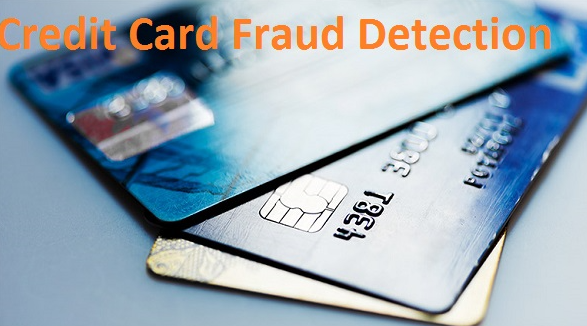

# General Packages

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm, sklearn, imblearn, math
import statsmodels, random, re, nltk, warnings, pylab
warnings.filterwarnings('ignore')

pd.set_option('float_format', "{:f}".format)

%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek


from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_roc_curve, \
confusion_matrix, plot_precision_recall_curve, classification_report, plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import tree

import colorama
from colorama import Fore, Back


In [2]:
# set some formats 
pd.set_option.display_max_columns=300
pd.set_option.display_max_rows=500
pd.set_option('float_format', "{:f}".format)

from pylab import rcParams
rcParams['figure.figsize']=10,5
rcParams["font.size"]=15
rcParams["font.weight"]=10

### I have done it jupyter note book as my system is faster than google colab, it has 64 gb ram and 1000 gb ssd, google colab was taking longer time

# Reading And Understanding The Data



In [3]:

#importing data
train_df=pd.read_csv("fraudTrain.csv")
test_df=pd.read_csv("fraudTest.csv")

In [4]:
#check the datas
train_df.head(3)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   

                          merchant       category        amt      first  \
0       fraud_Rippin, Kub and Mann       misc_net   4.970000   Jennifer   
1  fraud_Heller, Gutmann and Zieme    grocery_pos 107.230000  Stephanie   
2             fraud_Lind-Buckridge  entertainment 220.110000     Edward   

      last gender                        street  ...       lat        long  \
0    Banks      F                561 Perry Cove  ... 36.078800  -81.178100   
1     Gill      F  43039 Riley Greens Suite 393  ... 48.887800 -118.210500   
2  Sanchez      M      594 White Dale Suite 530  ... 42.180800 -112.262000   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   

                          trans_num   unix_time merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018 36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044 49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051 43.150704 -112.154481   

   is_fraud  
0         0  
1         0  
2         0  

[3 rows x 23 columns]

In [5]:
test_df.head(3)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   

                               merchant        category       amt   first  \
0                 fraud_Kirlin and Sons   personal_care  2.860000    Jeff   
1                  fraud_Sporer-Keebler   personal_care 29.840000  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness 41.280000  Ashley   

       last gender                street  ...       lat        long  city_pop  \
0   Elliott      M     351 Darlene Green  ... 33.965900  -80.935500    333497   
1  Williams      F      3638 Marsh Union  ... 40.320700 -110.436000       302   
2     Lopez      F  9333 Valentine Point  ... 40.672900  -73.536500     34496   

                      job         dob                         trans_num  \
0     Mechanical engineer  1968-03-19  2da90c7d74bd46a0caf3777415b3ebd3   
1  Sales professional, IT  1990-01-17  324cc204407e99f51b0d6ca0055005e7   
2       Librarian, public  1970-10-21  c81755dbbbea9d5c77f094348a7579be   

    unix_time merch_lat  merch_long  is_fraud  
0  1371816865 33.986391  -81.200714         0  
1  1371816873 39.450498 -109.960431         0  
2  1371816893 40.495810  -74.196111         0  

[3 rows x 23 columns]

# As Both the df are having same columns we can append them as of now and will do the visualization no that new created data set

In [6]:
df_TrainTest=train_df.append(test_df)
inp0=df_TrainTest.copy()
df_TrainTest.shape

(1852394, 23)

In [7]:
#inp0 is the copy of newly created merged dataset
inp0.tail()

Unnamed: 0 trans_date_trans_time            cc_num  \
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                     merchant        category        amt    first     last  \
555714  fraud_Reilly and Sons  health_fitness  43.770000  Michael    Olson   
555715   fraud_Hoppe-Parisian       kids_pets 111.840000     Jose  Vasquez   
555716        fraud_Rau-Robel       kids_pets  86.880000      Ann   Lawson   
555717  fraud_Breitenberg LLC          travel   7.990000     Eric  Preston   
555718      fraud_Dare-Marvin   entertainment  38.130000   Samuel     Frey   

       gender                      street  ...       lat        long  \
555714      M         558 Michael Estates  ... 40.493100  -91.891200   
555715      M         572 Davis Mountains  ... 29.039300  -95.440100   
555716      F  144 Evans Islands Apt. 683  ... 46.196600 -118.901700   
555717      M  7020 Doyle Stream Apt. 951  ... 44.625500 -116.449300   
555718      M    830 Myers Plaza Apt. 384  ... 35.666500  -97.479800   

        city_pop             job         dob  \
555714       519    Town planner  1966-02-13   
555715     28739  Futures trader  1999-12-27   
555716      3684        Musician  1981-11-29   
555717       129    Cartographer  1965-12-15   
555718    116001     Media buyer  1993-05-10   

                               trans_num   unix_time merch_lat  merch_long  \
555714  9b1f753c79894c9f4b71f04581835ada  1388534347 39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349 29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355 46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364 44.470525 -117.080888   
555718  1765bb45b3aa3224b4cdcb6e7a96cee3  1388534374 36.210097  -97.036372   

        is_fraud  
555714         0  
555715         0  
555716         0  
555717         0  
555718         0  

[5 rows x 23 columns]

In [8]:
#drop the first col
inp0.drop(inp0.columns[0],1, inplace=True)
inp0.shape

(1852394, 22)

In [9]:
#check info
df_TrainTest.info(verbose=1, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

# Reduce the Memory Usage by converting the features dtypes and droping  irrelavent columns 

In [10]:
#amt int64 to int32
inp0.amt=inp0["amt"].astype('float32')

In [11]:
#all lat long, zip, city pop, : int64 to int32
inp0["merch_lat"]=inp0["merch_lat"].astype("float32")

In [12]:
inp0["merch_long"]=inp0["merch_long"].astype("float32")

In [13]:
inp0["lat"]=inp0["lat"].astype("float32")

In [14]:
inp0["long"]=inp0["long"].astype("float32")

In [15]:
inp0["zip"]=inp0["zip"].astype('int32')

In [16]:
inp0.city_pop=inp0.city_pop.astype('int32')

In [17]:
#change gender as category
inp0.gender=inp0.gender.astype('category')

In [18]:
# drop trans num and unixtime
inp0.drop(["unix_time"],1,inplace=True)

In [19]:
#is_fraud int64 to int8
inp0.is_fraud=inp0.is_fraud.astype("int8")

In [20]:
# drop first and last
inp0.drop(["first","last"],1,inplace=True)

In [21]:
#change trans_date_trans_time to timesatmp
inp0.trans_date_trans_time=pd.to_datetime(inp0.trans_date_trans_time)

In [22]:
#check info
inp0.info(verbose=1, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float32       
 5   gender                 category      
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int32         
 10  lat                    float32       
 11  long                   float32       
 12  city_pop               int32         
 13  job                    object        
 14  dob                    object        
 15  trans_num              object        
 16  merch_lat              float32       
 17  merch_long             float32       
 18  is_fraud               

# Memory reduce 1.6gb to 1.1gb

In [23]:
#check the description
inp0.describe(include='all') # with all columns

trans_date_trans_time                     cc_num           merchant  \
count                1852394             1852394.000000            1852394   
unique               1819551                        NaN                693   
top      2019-04-22 16:02:01                        NaN  fraud_Kilback LLC   
freq                       4                        NaN               6262   
first    2019-01-01 00:00:18                        NaN                NaN   
last     2020-12-31 23:59:34                        NaN                NaN   
mean                     NaN  417386038393710400.000000                NaN   
std                      NaN 1309115265318020352.000000                NaN   
min                      NaN         60416207185.000000                NaN   
25%                      NaN     180042946491150.000000                NaN   
50%                      NaN    3521417320836166.000000                NaN   
75%                      NaN    4642255475285942.000000                NaN   
max                      NaN 4992346398065154048.000000                NaN   

             category            amt   gender           street        city  \
count         1852394 1852394.000000  1852394          1852394     1852394   
unique             14            NaN        2              999         906   
top     gas_transport            NaN        F  444 Robert Mews  Birmingham   
freq           188029            NaN  1014749             4392        8040   
first             NaN            NaN      NaN              NaN         NaN   
last              NaN            NaN      NaN              NaN         NaN   
mean              NaN      70.063560      NaN              NaN         NaN   
std               NaN     158.994904      NaN              NaN         NaN   
min               NaN       1.000000      NaN              NaN         NaN   
25%               NaN       9.640000      NaN              NaN         NaN   
50%               NaN      47.450001      NaN              NaN         NaN   
75%               NaN      83.099998      NaN              NaN         NaN   
max               NaN   28948.900391      NaN              NaN         NaN   

          state            zip            lat           long       city_pop  \
count   1852394 1852394.000000 1852394.000000 1852394.000000 1852394.000000   
unique       51            NaN            NaN            NaN            NaN   
top          TX            NaN            NaN            NaN            NaN   
freq     135269            NaN            NaN            NaN            NaN   
first       NaN            NaN            NaN            NaN            NaN   
last        NaN            NaN            NaN            NaN            NaN   
mean        NaN   48813.258191      38.539314     -90.227852   88643.674509   
std         NaN   26881.845966       5.068993      13.736313  301487.618344   
min         NaN    1257.000000      20.027100    -165.672302      23.000000   
25%         NaN   26237.000000      34.668900     -96.797997     741.000000   
50%         NaN   48174.000000      39.354301     -87.476898    2443.000000   
75%         NaN   72042.000000      41.940399     -80.157997   20328.000000   
max         NaN   99921.000000      66.693298     -67.950302 2906700.000000   

                      job         dob                         trans_num  \
count             1852394     1852394                           1852394   
unique                497         984                           1852394   
top     Film/video editor  1977-03-23  0b242abb623afc578575680df30655b9   
freq                13898        8044                                 1   
first                 NaN         NaN                               NaN   
last                  NaN         NaN                               NaN   
mean                  NaN         NaN                               NaN   
std                   NaN         NaN                               NaN   
min                   NaN         NaN  

In [24]:
#check only for numbers description
np.round(inp0.describe(),2)

cc_num            amt            zip            lat  \
count             1852394.000000 1852394.000000 1852394.000000 1852394.000000   
mean   417386038393710400.000000      70.060000   48813.260000      38.540000   
std   1309115265318020352.000000     158.990000   26881.850000       5.070000   
min           60416207185.000000       1.000000    1257.000000      20.030000   
25%       180042946491150.000000       9.640000   26237.000000      34.670000   
50%      3521417320836166.000000      47.450000   48174.000000      39.350000   
75%      4642255475285942.000000      83.100000   72042.000000      41.940000   
max   4992346398065154048.000000   28948.900000   99921.000000      66.690000   

                long       city_pop      merch_lat     merch_long  \
count 1852394.000000 1852394.000000 1852394.000000 1852394.000000   
mean      -90.230000   88643.670000      38.540000     -90.230000   
std        13.740000  301487.620000       5.100000      13.750000   
min      -165.670000      23.000000      19.030000    -166.670000   
25%       -96.800000     741.000000      34.740000     -96.900000   
50%       -87.480000    2443.000000      39.370000     -87.440000   
75%       -80.160000   20328.000000      41.960000     -80.250000   
max       -67.950000 2906700.000000      67.510000     -66.950000   

            is_fraud  
count 1852394.000000  
mean        0.010000  
std         0.070000  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [25]:
#check the columns 
inp0.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [26]:
# creating buskets of diffrent types of columns
id_col=["cc_num", "trans_num"]
demographic_col=['street', 'city', 'state',"zip","lat","long", "merch_lat", "merch_long",  ]
date_col=["trans_date_trans_time", "dob"]
category_col=['gender',"is_fraud"]
inp_col=['merchant', 'category', 'amt', "city_pop", "job"]


# Null value Handelling

In [27]:
#checking nan values

inp0.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [28]:
#lets deep dive to get some elements if there are some nan value in diffrent format
#in id col
for i in id_col:
    print(inp0[i].unique())
    print(Fore.BLUE+'>>>>>>>>>>>>>>>>>>>>>>>')


[   2703186189652095        630423337322      38859492057661
    3534093764340240     375534208663984    4767265376804500
      30074693890476    6011360759745864    4922710831011201
    2720830304681674       4642894980163     377234009633447
     180042946491150    5559857416065248    3514865930894695
    6011999606625827    6011860238257910    3565423334076143
    2348245054386329 4956828990005111019 4469777115158234880
    2305336922781618     180048185037117        630441765090
 4428780983793657331     343464013864032     374930071163758
    4334230547694630 4225990116481262579    4260059589824237
     180094608895855 4599735407877245080        630412733309
    2712209726293386     374125201044065     349612764943496
    3598215285024754     213141712584544      30561214688470
    4789911625179723        676372984911      30011465039817
    4642255475285942     180067784565096     213126662687660
    2266735643685262    3553629419254918    3511058278399773
 4110266553600176127    

['0b242abb623afc578575680df30655b9' '1f76529f8574734946361c461b024d99'
 'a1a22d70485983eac12b5b88dad1cf95' ... '6c5b7c8add471975aa0fec023b2e8408'
 '14392d723bb7737606b2700ac791b7aa' '1765bb45b3aa3224b4cdcb6e7a96cee3']
>>>>>>>>>>>>>>>>>>>>>>>


In [29]:
#in address col
for i in demographic_col:
    print(inp0[i].unique())
    print(Fore.BLUE+'>>>>>>>>>>>>>>>>>>>>>>>')

['561 Perry Cove' '43039 Riley Greens Suite 393'
 '594 White Dale Suite 530' '9443 Cynthia Court Apt. 038'
 '408 Bradley Rest' '4655 David Island' '889 Sarah Station Suite 624'
 '231 Flores Pass Suite 720' '6888 Hicks Stream Suite 954'
 '21326 Taylor Squares Suite 708' '1831 Faith View Suite 653'
 '43576 Kristina Islands' '3337 Lisa Divide' '5916 Susan Bridge Apt. 939'
 '1632 Cohen Drive Suite 639' '870 Rocha Drive'
 '44259 Beth Station Suite 215' '4923 Campbell Pines Suite 717'
 '268 Hayes Rue Suite 811' '269 Sanchez Rapids' '4005 Dana Glens'
 '21447 Powell Circle' '2481 Mills Lock' '759 Erin Mount Suite 956'
 '7683 Natasha Way Apt. 945' '551 Zachary Freeway' '61390 Hayes Port'
 '7483 Navarro Flats' '2711 Duran Pines' '969 Huerta Path Apt. 270'
 '57887 Gutierrez Harbor' '39787 Pamela Fall Suite 639'
 '445 Jerry Lights Apt. 081' '50872 Alex Plain Suite 088'
 '20937 Reed Lakes Apt. 271' '61107 Edwards Dam Apt. 463'
 '9333 Valentine Point' '742 Oneill Shore' '41851 Victor Drives Suite 21

['Moravian Falls' 'Orient' 'Malad City' 'Boulder' 'Doe Hill' 'Dublin'
 'Holcomb' 'Edinburg' 'Manor' 'Clarksville' 'Clarinda'
 'Shenandoah Junction' 'Saint Petersburg' 'Grenada'
 'High Rolls Mountain Park' 'Harrington Park' 'Lahoma' 'Carlisle'
 'Harborcreek' 'Elizabeth' 'Methuen' 'Moulton' 'Plainfield' 'May'
 'Waukesha' 'Bailey' 'Romulus' 'Freedom' 'Honokaa' 'Valentine' 'Westfir'
 'Tiptonville' 'Republic' 'Baton Rouge' 'Washington' 'Big Creek'
 'Bellmore' 'Florence' 'Allentown' 'Moriches' 'Esbon' 'Chatham' 'Thompson'
 'North Prairie' 'Laredo' 'Grant' 'Conway' 'New Goshen' 'Sunflower'
 'Enola' 'Roosevelt' 'Pointe Aux Pins' 'Dallas' 'Jay' 'North Tonawanda'
 'Athena' 'Chester' 'Elkhart' 'Surrency' 'Arcadia' 'Gaithersburg'
 'Bowdoin' 'Heart Butte' 'San Jose' 'Rumely' 'Cranks' 'Ravenna' 'Utica'
 'Uledi' 'Naples' 'Thida' 'Parks' 'Central' 'Fort Washakie' 'Etlan'
 'Brinson' 'Shrewsbury' 'Bigelow' 'North Washington' 'Holloway'
 'Littleton' 'Hinesburg' 'Meadville' 'Elberta' 'Moab' 'Diamond' 'Bra

[ -81.1781 -118.2105 -112.262  -112.1138  -79.4629  -75.2045 -100.9893
  -78.6003  -79.6607  -87.349   -95.038   -77.8229  -82.7243 -122.5258
 -105.8189  -73.98    -98.0727  -87.3667  -79.9416  -74.2239  -71.181
  -92.6833  -74.415   -98.9656  -88.2196  -78.0892  -83.3583 -111.0292
 -155.488  -100.6215 -122.481   -89.4649  -87.9938  -91.1468  -77.0282
  -83.5706  -73.5365  -90.1217  -75.4645  -72.8229  -98.4462  -73.5873
 -109.615   -88.395   -99.4986  -86.259  -122.3456  -87.4616  -90.5451
  -92.2123  -98.9836  -84.447   -96.743   -87.1332  -78.851  -118.4971
  -76.2842  -93.4855  -82.1982  -86.2061  -77.1458  -69.9656 -112.8456
 -121.7913  -87.0436  -83.1838  -98.9041 -100.138   -79.7856  -81.7361
  -91.4539 -111.95    -86.1723 -108.8964  -78.2638  -84.7373  -71.7205
  -95.6515  -79.8089  -80.9701 -105.0044  -73.098   -93.3014  -86.2141
 -109.5271  -81.0425  -82.2027  -77.295  -118.3493  -77.0793 -114.8859
  -95.3509  -90.3706  -96.6184  -80.276   -92.7442  -80.0652  -80.2099
 -104.7

[36.01129  49.159046 43.150703 ... 29.661049 46.65834  36.2101  ]
>>>>>>>>>>>>>>>>>>>>>>>
[ -82.04832 -118.18646 -112.15448 ... -119.71506 -117.08089  -97.03637]
>>>>>>>>>>>>>>>>>>>>>>>


In [30]:
#date col
for i in date_col:
    print(inp0[i].unique())
    print(Fore.BLUE+'>>>>>>>>>>>>>>>>>>>>>>> \n')

['2019-01-01T00:00:18.000000000' '2019-01-01T00:00:44.000000000'
 '2019-01-01T00:00:51.000000000' ... '2020-12-31T23:59:15.000000000'
 '2020-12-31T23:59:24.000000000' '2020-12-31T23:59:34.000000000']
>>>>>>>>>>>>>>>>>>>>>>> 

['1988-03-09' '1978-06-21' '1962-01-19' '1967-01-12' '1986-03-28'
 '1961-06-19' '1993-08-16' '1947-08-21' '1941-03-07' '1974-03-28'
 '1990-07-13' '1966-02-14' '1989-02-28' '1945-12-21' '1967-08-30'
 '1965-06-30' '1952-07-06' '1938-03-15' '1946-02-02' '1980-12-21'
 '1980-11-22' '1961-02-14' '1974-07-19' '1965-07-26' '1946-01-02'
 '1962-08-13' '1971-11-05' '1967-08-02' '1966-12-03' '1945-03-15'
 '1961-05-19' '1964-12-30' '1964-04-22' '1977-02-22' '1970-07-20'
 '1984-06-04' '1970-10-21' '1984-12-24' '1998-10-01' '1988-04-27'
 '1987-07-18' '1971-10-14' '1987-04-23' '1942-01-06' '1971-01-28'
 '1972-07-25' '1984-09-01' '1960-01-06' '1986-11-06' '1954-01-05'
 '1970-09-27' '1994-02-09' '1942-11-24' '1994-11-05' '1993-10-25'
 '1976-10-18' '1981-02-15' '1974-03-13' '1926-07

In [31]:
#imp_cols
for i in inp_col:
    print(inp0[i].unique())
    print(Fore.BLUE+'>>>>>>>>>>>>>>>>>>>>>>> \n')

['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Bruen-Yost' 'fraud_Kunze Inc' 'fraud_Nitzsche, Kessler and Wolff'
 'fraud_Kihn, Abernathy and Douglas' 'fraud_Torphy-Goyette'
 'fraud_Balistreri-Nader' 'fraud_Bahringer, Schoen and Corkery'
 'fraud_Hudson-Ratke' 'fraud_Heidenreich PLC' 'fraud_Halvorson Group'
 'fraud_Harber Inc' 'fraud_Mosciski,

['Psychologist, counselling' 'Special educational needs teacher'
 'Nature conservation officer' 'Patent attorney'
 'Dance movement psychotherapist' 'Transport planner' 'Arboriculturist'
 'Designer, multimedia' 'Public affairs consultant' 'Pathologist'
 'IT trainer' 'Systems developer' 'Engineer, land' 'Systems analyst'
 'Naval architect' 'Radiographer, diagnostic'
 'Programme researcher, broadcasting/film/video' 'Energy engineer'
 'Event organiser' 'Operational researcher' 'Market researcher'
 'Probation officer' 'Leisure centre manager'
 'Corporate investment banker' 'Therapist, occupational'
 'Call centre manager' 'Police officer' 'Education officer, museum'
 'Physiotherapist' 'Network engineer' 'Forensic psychologist' 'Geochemist'
 'Armed forces training and education officer' 'Designer, furniture'
 'Optician, dispensing' 'Psychologist, forensic' 'Librarian, public'
 'Fine artist' 'Scientist, research (maths)'
 'Research officer, trade union' 'Tourism officer'
 'Human resources offi

In [32]:
for i in category_col:
    print(i)
    print("...................................")
    print(inp0[i].unique())
    print(Fore.BLUE+'>>>>>>>>>>>>>>>>>>>>>>> \n')

gender
...................................
['F', 'M']
Categories (2, object): ['F', 'M']
>>>>>>>>>>>>>>>>>>>>>>> 

is_fraud
...................................
[0 1]
>>>>>>>>>>>>>>>>>>>>>>> 



# It seems there no null vale or nan mask values are present in this data
### -------------------------------------------------------------------------------------------

# Derive New variables

#### Change date cols from objects to TimeStamp format

In [33]:
inp0.trans_date_trans_time=pd.to_datetime(inp0.trans_date_trans_time)
inp0.dob=pd.to_datetime(inp0.dob)

#### Derive Age col from date of transaction and DOB of the customer


In [34]:
inp0['age']=inp0.trans_date_trans_time.dt.year-inp0.dob.dt.year

# append age in to inp_col
inp_col.append("age")

In [35]:
#drop dob
inp0.drop("dob",1, inplace=True)

# Get the Distance from merchant to customer's address

In [36]:
#make a function to get the distance from lat and long

def get_distance(lat1, lon1, lat2, lon2, if_radians=True, earth_radius=6371): 
    
    # np.radian will convert value of dgree to radian
    
    
    if if_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))
    

In [37]:
#checking lat long short df for easy 
inp0[["lat","long", "merch_lat", "merch_long"]].head()

lat        long  merch_lat  merch_long
0 36.078800  -81.178101  36.011292  -82.048317
1 48.887798 -118.210503  49.159046 -118.186462
2 42.180801 -112.262001  43.150703 -112.154480
3 46.230598 -112.113800  47.034332 -112.561073
4 38.420700  -79.462898  38.674999  -78.632462

In [38]:
# derive the new col cust_merchant_distance for distacne after applying the get_distance function

# get the dis
dist=get_distance(inp0['lat'], inp0['long'],
                 inp0['merch_lat'], inp0['merch_long'])

#cust_merchant_distance
inp0["cust_merchant_distance"]=dist

#drop lat long related cols
inp0.drop(["lat","long", "merch_lat", "merch_long"], 1, inplace=True)

print(f"New shape of the data ={inp0.shape}")
inp0.iloc[-5:].head(3)

New shape of the data =(1852394, 16)


trans_date_trans_time            cc_num               merchant  \
555714   2020-12-31 23:59:07    30560609640617  fraud_Reilly and Sons   
555715   2020-12-31 23:59:09  3556613125071656   fraud_Hoppe-Parisian   
555716   2020-12-31 23:59:15  6011724471098086        fraud_Rau-Robel   

              category        amt gender                      street  \
555714  health_fitness  43.770000      M         558 Michael Estates   
555715       kids_pets 111.839996      M         572 Davis Mountains   
555716       kids_pets  86.879997      F  144 Evans Islands Apt. 683   

                city state    zip  city_pop             job  \
555714         Luray    MO  63453       519    Town planner   
555715  Lake Jackson    TX  77566     28739  Futures trader   
555716       Burbank    WA  99323      3684        Musician   

                               trans_num  is_fraud  age  \
555714  9b1f753c79894c9f4b71f04581835ada         0   54   
555715  2090647dac2c89a1d86c514c427f5b91         0   21   
555716  6c5b7c8add471975aa0fec023b2e8408         0   39   

        cust_merchant_distance  
555714               77.025375  
555715              100.074394  
555716               80.759872

#### Get year, mont_year, hr, month variable form time stamp 

In [39]:
inp0['hour']=inp0.trans_date_trans_time.dt.hour
inp0['Year']=inp0.trans_date_trans_time.dt.year
inp0['Month']=inp0.trans_date_trans_time.dt.month
inp0['Month_year']=inp0.trans_date_trans_time.dt.to_period('M')
inp0["day_name"]=inp0.trans_date_trans_time.dt.day_name()
inp0["day_name_num"]=inp0.trans_date_trans_time.dt.day
inp0["minutes"]=inp0.trans_date_trans_time.dt.minute

In [40]:
#check unique number of elements in each cols

for i, x in enumerate(inp0.columns):
    print(Fore.BLUE+f"{x} feature is having { (inp0[x].nunique()) } numbers of lelements\n")
    
# this will help for feature eng:

trans_date_trans_time feature is having 1819551 numbers of lelements

cc_num feature is having 999 numbers of lelements

merchant feature is having 693 numbers of lelements

category feature is having 14 numbers of lelements

amt feature is having 60616 numbers of lelements

gender feature is having 2 numbers of lelements

street feature is having 999 numbers of lelements

city feature is having 906 numbers of lelements

state feature is having 51 numbers of lelements

zip feature is having 985 numbers of lelements

city_pop feature is having 891 numbers of lelements

job feature is having 497 numbers of lelements

trans_num feature is having 1852394 numbers of lelements

is_fraud feature is having 2 numbers of lelements

age feature is having 83 numbers of lelements

cust_merchant_distance feature is having 1721874 numbers of lelements

hour feature is having 24 numbers of lelements

Year feature is having 2 numbers of lelements

Month feature is having 12 numbers of lelements

Month_

In [41]:
inp0.info(memory_usage="deep", verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   trans_date_trans_time   datetime64[ns]
 1   cc_num                  int64         
 2   merchant                object        
 3   category                object        
 4   amt                     float32       
 5   gender                  category      
 6   street                  object        
 7   city                    object        
 8   state                   object        
 9   zip                     int32         
 10  city_pop                int32         
 11  job                     object        
 12  trans_num               object        
 13  is_fraud                int8          
 14  age                     int64         
 15  cust_merchant_distance  float32       
 16  hour                    int64         
 17  Year                    int64         
 18  Mon

# EDA

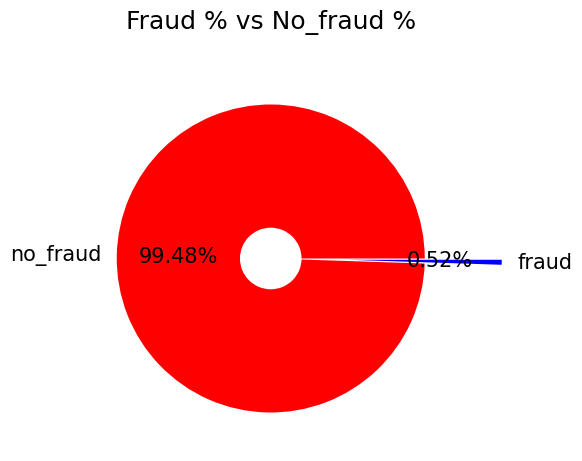

In [42]:
#check the fraud vs non fraud

plt.pie((inp0.is_fraud.value_counts(normalize=True)), autopct="%.2f%%", labels=["no_fraud", "fraud"],colors=["r","blue"], explode=[0.0,.5] )
plt.pie([1], radius=0.2, colors='w')
#plt.savefig("ratio.png")
plt.title("Fraud % vs No_fraud %\n")

plt.show()

# the data is heighly imblanced 

In [43]:
# check month wise fraud transaction count and fraud happend 

inp0.groupby('Month_year')['is_fraud'].agg(["count" , "sum"])

count  sum
Month_year             
2019-01      52525  506
2019-02      49866  517
2019-03      70939  494
2019-04      68078  376
2019-05      72532  408
2019-06      86064  354
2019-07      86596  331
2019-08      87359  382
2019-09      70652  418
2019-10      68758  454
2019-11      70421  388
2019-12     141060  592
2020-01      52202  343
2020-02      47791  336
2020-03      72850  444
2020-04      66892  302
2020-05      74343  527
2020-06      87805  467
2020-07      85848  321
2020-08      88759  415
2020-09      69533  340
2020-10      69348  384
2020-11      72635  294
2020-12     139538  258

In [44]:
#get the decription
inp0.groupby('Month_year')['is_fraud'].agg(["count" , "sum"]).describe()

count        sum
count     24.000000  24.000000
mean   77183.083333 402.125000
std    22822.330801  84.175444
min    47791.000000 258.000000
25%    68588.000000 339.000000
50%    71735.500000 386.000000
75%    86197.000000 457.250000
max   141060.000000 592.000000

In [45]:
# See the month wise fraud amount month wise

inp0[inp0.is_fraud==1].groupby('Month_year')['amt'].agg(["count" , "sum"])


count           sum
Month_year                     
2019-01       506 261780.375000
2019-02       517 274051.093750
2019-03       494 237637.593750
2019-04       376 202067.296875
2019-05       408 210549.109375
2019-06       354 178204.593750
2019-07       331 188701.593750
2019-08       382 203951.125000
2019-09       418 217675.375000
2019-10       454 257739.718750
2019-11       388 200307.468750
2019-12       592 335157.531250
2020-01       343 182595.359375
2020-02       336 183950.109375
2020-03       444 234090.093750
2020-04       302 152173.984375
2020-05       527 287226.375000
2020-06       467 253504.734375
2020-07       321 158669.484375
2020-08       415 208785.437500
2020-09       340 202700.984375
2020-10       384 195572.968750
2020-11       294 153182.187500
2020-12       258 141138.687500

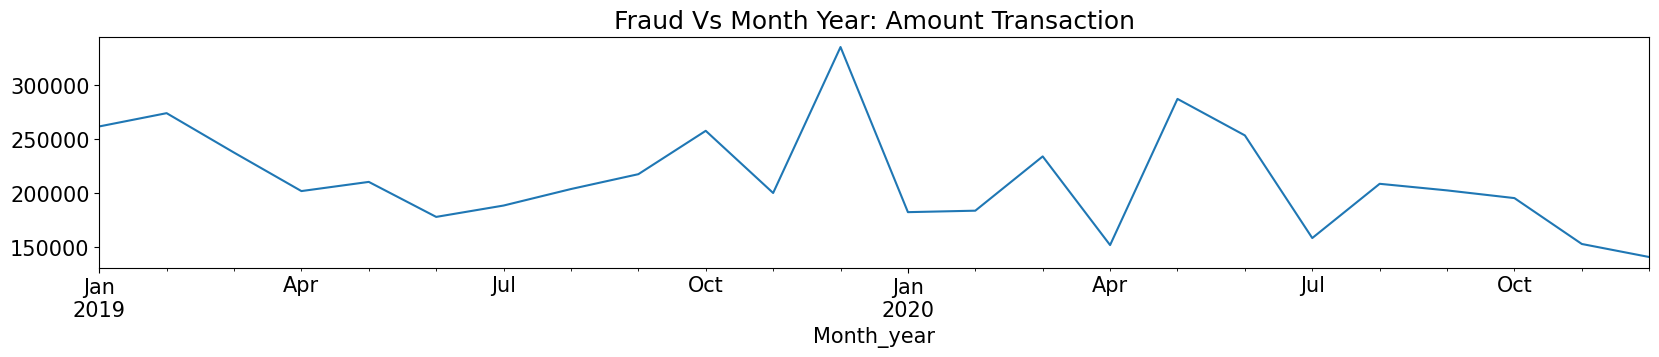

In [46]:
fig, ax=plt.subplots(1,1, figsize=[20,3])
inp0[inp0.is_fraud==1].groupby('Month_year')['amt'].sum().plot()
ax.set_title("Fraud Vs Month Year: Amount Transaction")

plt.show()


# There are no such seasonality in fraud transaction

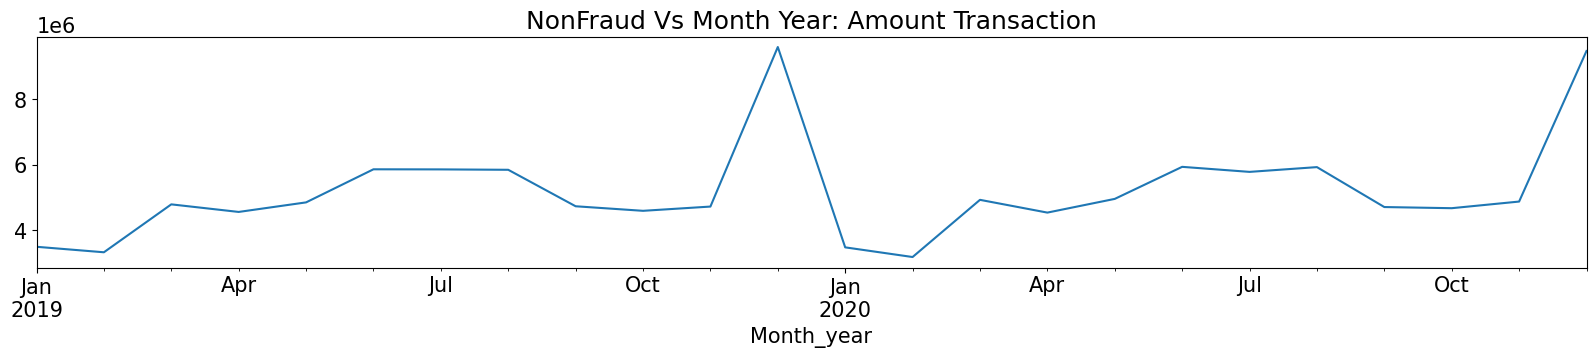

In [47]:
# see the customer behaviour- normal 
fig, ax=plt.subplots(1,1, figsize=[20,3])
inp0[inp0.is_fraud==0].groupby('Month_year')['amt'].sum().plot()
ax.set_title("NonFraud Vs Month Year: Amount Transaction")
plt.show()


### In normal distribution of trasaction data there is a seasonality 
### There are peak transaction in december probably due to the festival month

In [48]:
#extracting amnt with description from inp0
all_trans=pd.DataFrame(np.round(inp0['amt'].describe([.1,.7,.8,.9,.95,.999],3)))

In [49]:
#extracting amt with description from inp0 where is fraud is 1
fraud_trans=pd.DataFrame(inp0[inp0.is_fraud==1]['amt'].describe([.1,.7,.8,.9,.95,.999],3)).round(2)
fraud_trans.columns=["amt_fraud"]

In [50]:
#extracting amt with description from inp0 where is fraud is 0
normal_trans=pd.DataFrame(inp0[inp0.is_fraud==0]['amt'].describe([.1,.7,.8,.9,.95,.999],3)).round(2)
normal_trans.columns=['amt_normal']

In [51]:
#conating all extracted amt df
all_fraud_normal_compare=pd.concat([all_trans, fraud_trans, normal_trans], axis=1)
all_fraud_normal_compare.reset_index(inplace=True)
all_fraud_normal_compare.columns.values[0]="particular"

In [52]:
all_fraud_normal_compare

particular            amt   amt_fraud     amt_normal
0       count 1852394.000000 9651.000000 1842743.000000
1        mean      70.000000  530.660000      67.650000
2         std     159.000000  391.030000     153.430000
3         min       1.000000    1.060000       1.000000
4         10%       4.000000   12.100000       4.080000
5         50%      47.000000  390.000000      47.240000
6         70%      75.000000  859.910000      74.690000
7         80%      95.000000  941.100000      93.800000
8         90%     136.000000 1024.610000     134.170000
9         95%     195.000000 1084.090000     189.590000
10      99.9%    1517.000000 1293.130000    1519.620000
11        max   28949.000000 1376.040000   28948.900000

# Average fraud transaction is 390

In [53]:
z=all_fraud_normal_compare[(all_fraud_normal_compare.particular=='mean') | (all_fraud_normal_compare.particular=='50%')]

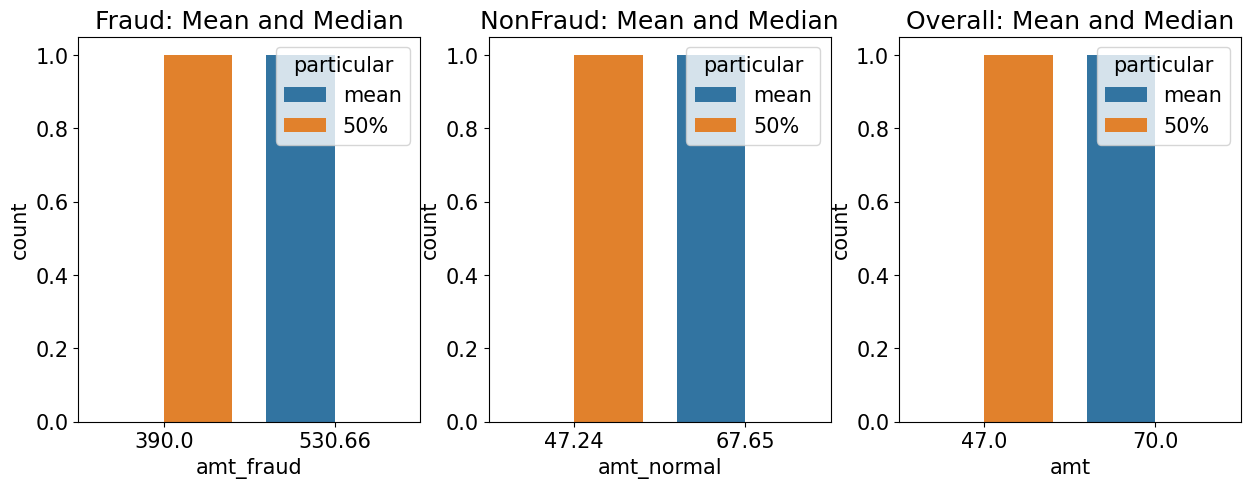

In [54]:
# plot amount mean and median in diffrent case
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.title("Fraud: Mean and Median")
sns.countplot(data=z, x="amt_fraud" ,hue="particular")

plt.subplot(1,3,2)
sns.countplot(data=z, x="amt_normal" ,hue="particular")
plt.title("NonFraud: Mean and Median")
plt.subplot(1,3,3)
sns.countplot(data=z, x="amt" ,hue="particular")
plt.subplots_adjust(hspace=.5)
plt.title("Overall: Mean and Median")
plt.show()

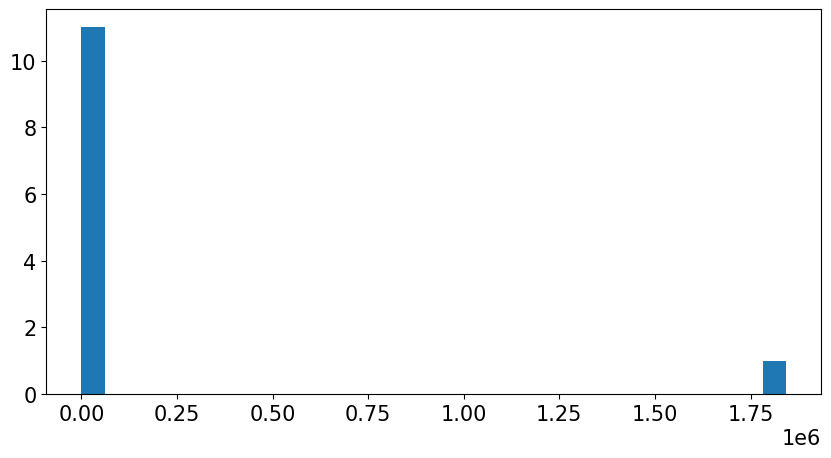

In [55]:
# non fraud transaction distribution
plt.hist(all_fraud_normal_compare.amt_normal, bins=30)
plt.show()

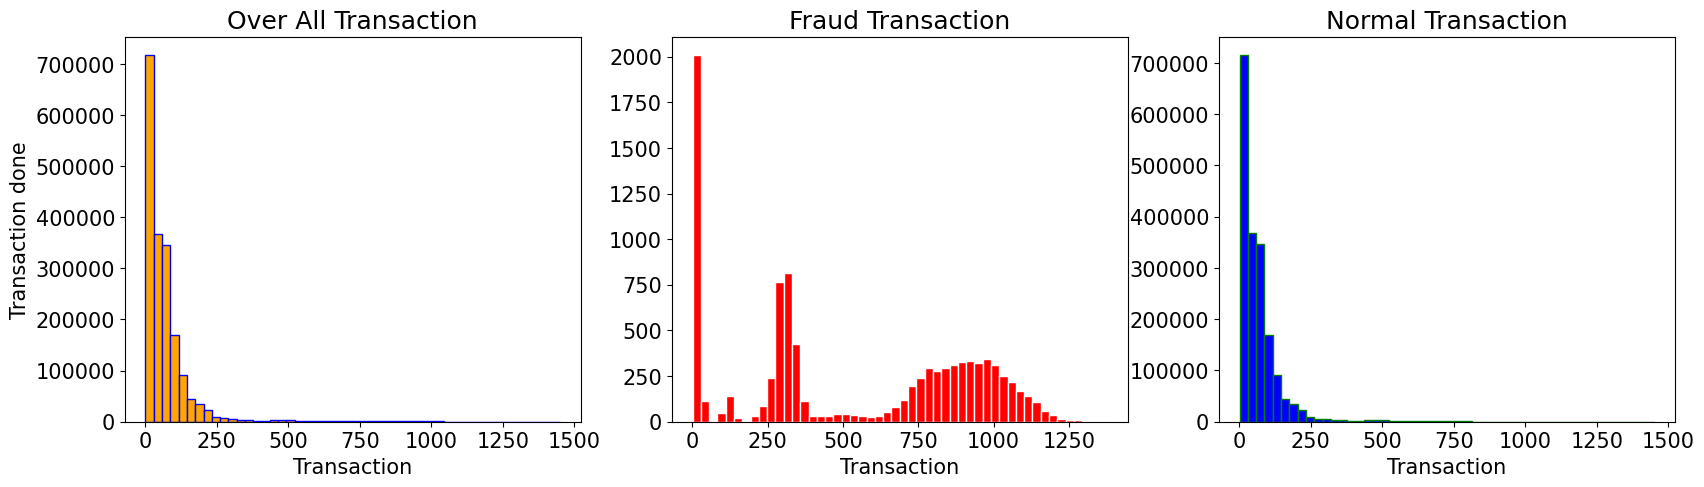

In [56]:
fig,ax=plt.subplots(1,3, figsize=[20,5])

# as in fraud the max spend is <1500 that is why it is better to see amount spend <1450 to understand graph better

ax[0].hist(inp0[inp0.amt<=1450]['amt'], bins=50, color='orange', edgecolor='blue')
ax[1].hist(inp0[(inp0.amt<=1450) & (inp0.is_fraud==1) ]['amt'], bins=50, color="red", edgecolor='w')
ax[2].hist(inp0[(inp0.amt<=1450) & (inp0.is_fraud==0) ]['amt'], bins=50, color="b", edgecolor='g')

ax[0].set_title("Over All Transaction")
ax[1].set_title("Fraud Transaction")
ax[2].set_title("Normal Transaction")
ax[0].set_xlabel("Transaction")
ax[1].set_xlabel("Transaction")
ax[2].set_xlabel("Transaction")
ax[0].set_ylabel("Transaction done")
#plt.savefig("dif.png")
plt.show()


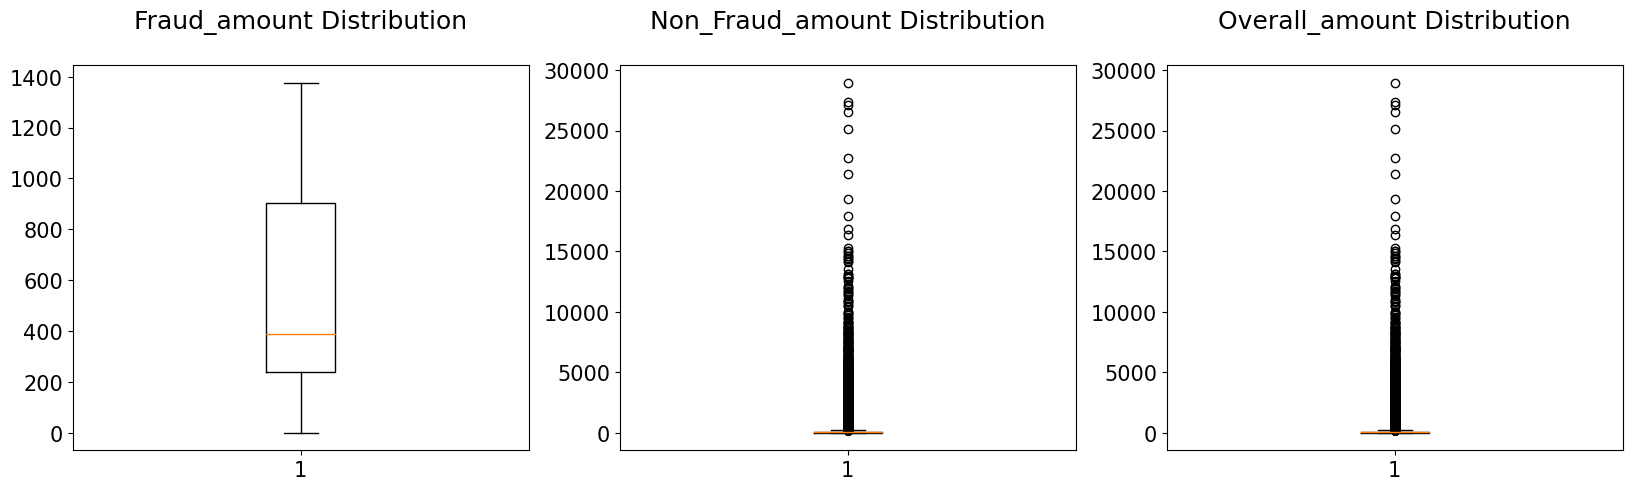

In [57]:
#checking outliers in amnt 

fig, ax=plt.subplots(1,3, figsize=[20,5])
ax[0].boxplot(inp0[inp0.is_fraud==1]['amt'])
ax[0].set_title("Fraud_amount Distribution\n")
ax[1].boxplot(inp0[inp0.is_fraud==0]['amt'])
ax[1].set_title("Non_Fraud_amount Distribution\n")
ax[2].boxplot(inp0['amt'])
ax[2].set_title("Overall_amount Distribution\n")


plt.show()


#there are outliers in non fraud trasaction so that will lead to overall transaction too and fraud transaction has no outlier

# The median value of Normal Transaction is 47.24 for fraud trascation 390
# Mean values  of Normal Transaction is 70 for fraud trascation 531

# Max are 28948 and 1376 respectively
#### That means in fraud transaction heighst amnt is less but median is more. Probably fraud happend with those people who had less credit limits

#### Or people who does fraud dont steal all the money in one shot, before stealing all the money may be the customer blocked the card

# TimeStamp Analysis
### i) Over all

In [58]:
#get count of customer using cc_num as cc_num will be unique for one customer name can be same so dont use name 
df_time1=inp0.groupby('Month_year')["cc_num","trans_num"].nunique().reset_index()
df_time1.columns.values[1]="cust_count"
df_time1.columns.values[-1]="transaction_count"

In [59]:
df_time1.head()

Month_year  cust_count  transaction_count
0    2019-01         913              52525
1    2019-02         918              49866
2    2019-03         916              70939
3    2019-04         913              68078
4    2019-05         910              72532

In [60]:
len(df_time1)

24

In [61]:
inp0.head(1)

trans_date_trans_time            cc_num                    merchant  \
0   2019-01-01 00:00:18  2703186189652095  fraud_Rippin, Kub and Mann   

   category      amt gender          street            city state    zip  ...  \
0  misc_net 4.970000      F  561 Perry Cove  Moravian Falls    NC  28654  ...   

   is_fraud age cust_merchant_distance  hour  Year  Month  Month_year  \
0         0  31              78.597496     0  2019      1     2019-01   

   day_name  day_name_num minutes  
0   Tuesday             1       0  

[1 rows x 23 columns]

In [62]:
# monthly on an average fraud amount 
inp0[inp0.is_fraud==1].groupby('Month')['amt'].mean()

Month
1    523.410767
2    536.929871
3    502.907990
4    522.479736
5    532.380188
6    525.833557
7    532.777771
8    517.862671
9    554.586243
10   540.945923
11   518.313293
12   560.348511
Name: amt, dtype: float32

In [63]:
#average montly fraud transaction count
inp0[inp0.is_fraud==1].groupby(["trans_num"])["amt"].count().sum()/24

402.125

# Average monthly fraud transaction is 402

In [64]:
inp0.groupby(["trans_num"])["amt"].count().sum()/24

77183.08333333333

# Average transaction number per month 77183.08

In [65]:
#Average amount per fraud transaction
inp0[inp0.is_fraud==1].groupby("trans_num")['amt'].mean().mean()

530.66144

# Average amount per fraud transaction 531

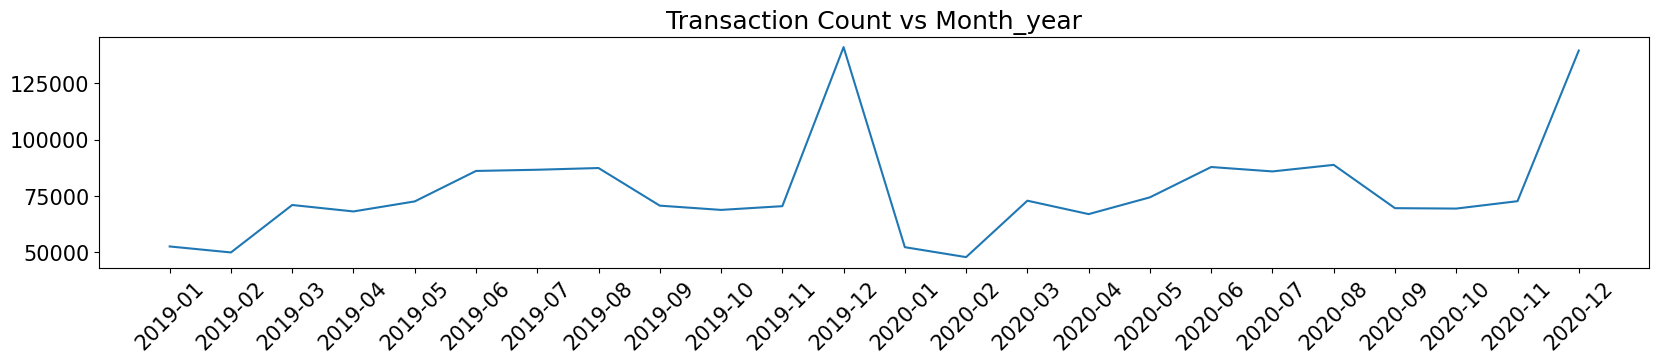

In [66]:
fig, ax=plt.subplots(1,1, figsize=[20,3])
ax.plot(df_time1.transaction_count)
ax.set_xticks(range(0, 24,1))
ax.set_xticklabels(df_time1["Month_year"])
plt.xticks(rotation=45)
plt.title("Transaction Count vs Month_year")
plt.show()

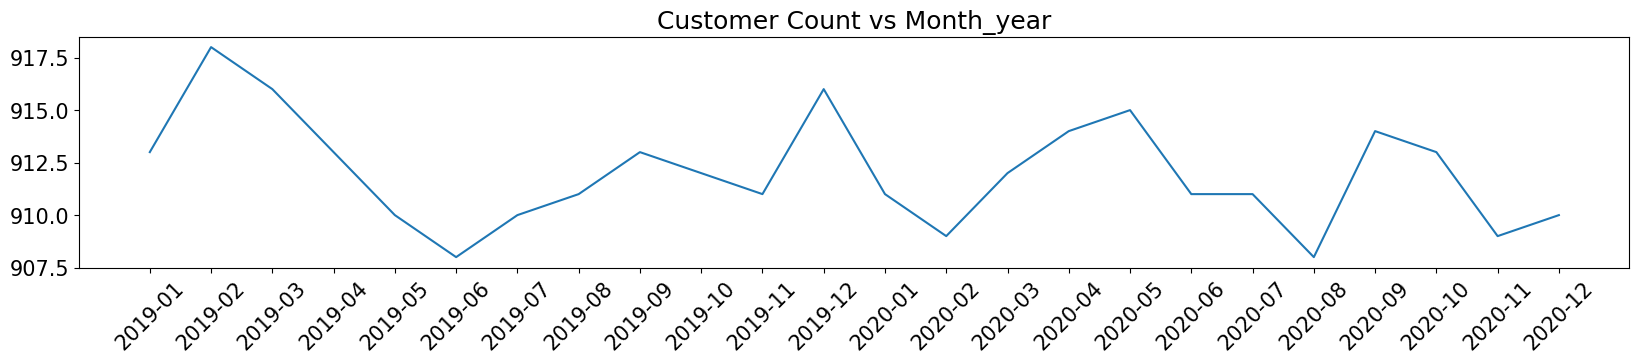

In [67]:
fig, ax=plt.subplots(1,1, figsize=[20,3])
ax.plot(df_time1.cust_count)
ax.set_xticks(range(0, 24,1))
ax.set_xticklabels(df_time1["Month_year"])
plt.xticks(rotation=45)
plt.title("Customer Count vs Month_year")
plt.show()

# Same customer has done multiple Transaction

# TimeStamp Analysis
### ii) fraud

In [68]:
df_time2=inp0[inp0.is_fraud==1].groupby('Month_year')["cc_num","trans_num"].nunique().reset_index()
df_time2.columns.values[1]="cust_count"
df_time2.columns.values[-1]="transaction_count"

In [69]:
df_time2

Month_year  cust_count  transaction_count
0     2019-01          50                506
1     2019-02          53                517
2     2019-03          49                494
3     2019-04          41                376
4     2019-05          42                408
5     2019-06          35                354
6     2019-07          36                331
7     2019-08          39                382
8     2019-09          44                418
9     2019-10          50                454
10    2019-11          41                388
11    2019-12          62                592
12    2020-01          40                343
13    2020-02          35                336
14    2020-03          45                444
15    2020-04          36                302
16    2020-05          54                527
17    2020-06          47                467
18    2020-07          35                321
19    2020-08          41                415
20    2020-09          35                340
21    2020-10          39                384
22    2020-11          31                294
23    2020-12          26                258

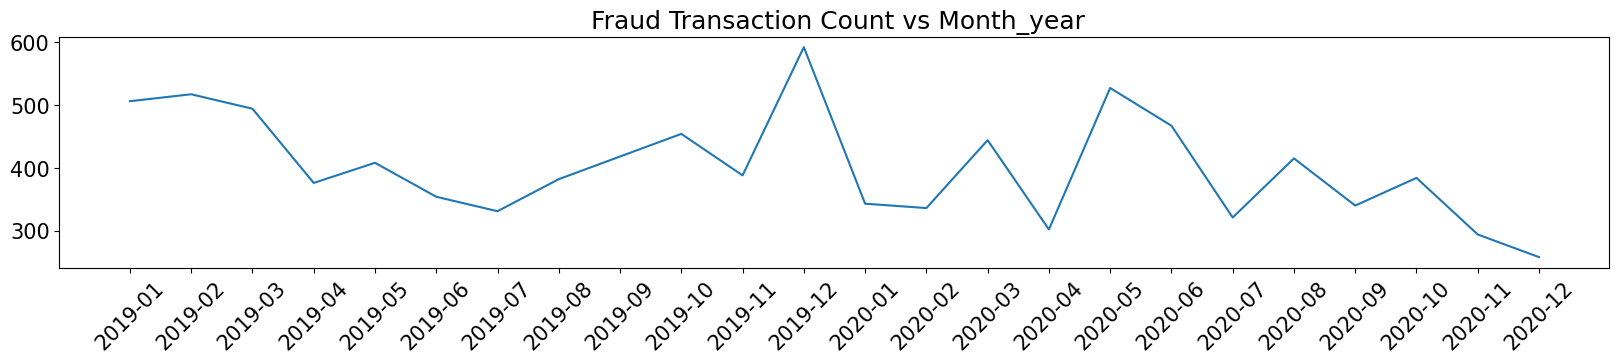

In [70]:
fig, ax=plt.subplots(1,1, figsize=[20,3])
ax.plot(df_time2.transaction_count)
ax.set_xticks(range(0, len(df_time2),1))
ax.set_xticklabels(df_time2["Month_year"])
plt.xticks(rotation=45)
plt.title(" Fraud Transaction Count vs Month_year")
plt.show()

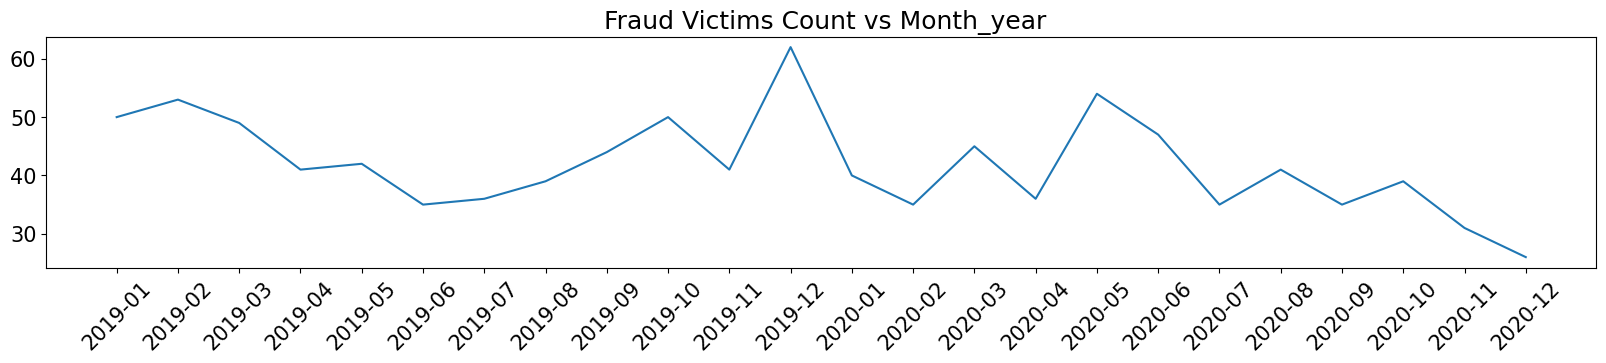

In [71]:
fig, ax=plt.subplots(1,1, figsize=[20,3])
ax.plot(df_time2.cust_count)
ax.set_xticks(range(0, len(df_time2),1))
ax.set_xticklabels(df_time2["Month_year"])
plt.xticks(rotation=45)
plt.title(" Fraud Victims Count vs Month_year")
plt.show()

# TimeStamp Analysis
# iii) non fraud

In [72]:
df_time3=inp0[inp0.is_fraud==1].groupby('Month_year')["cc_num","trans_num"].nunique().reset_index()
df_time3.columns.values[1]="cust_count"
df_time3.columns.values[-1]="transaction_count"

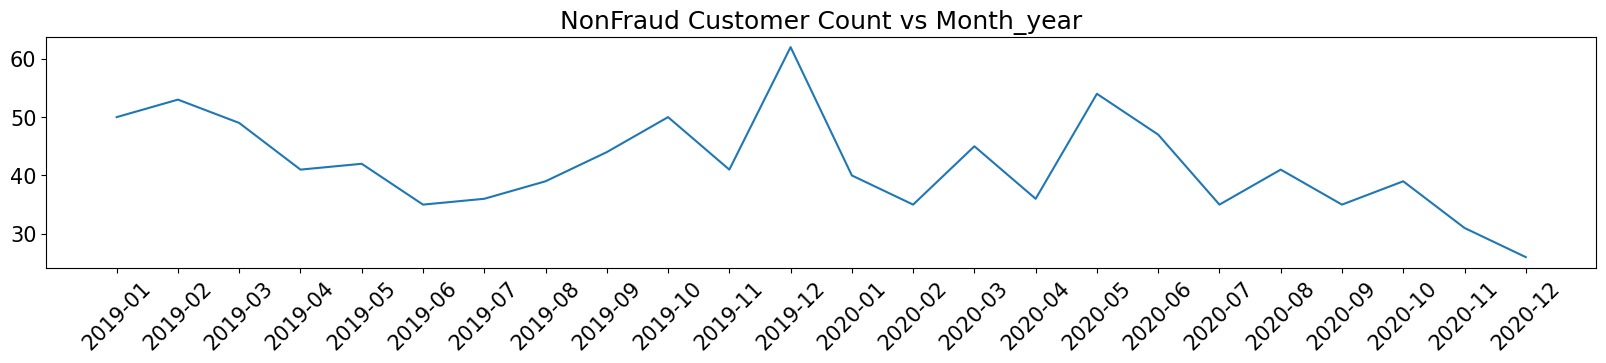

In [73]:
fig, ax=plt.subplots(1,1, figsize=[20,3])
ax.plot(df_time3.cust_count)
ax.set_xticks(range(0, len(df_time2),1))
ax.set_xticklabels(df_time3["Month_year"])
plt.xticks(rotation=45)
plt.title("NonFraud Customer Count vs Month_year")
plt.show()

# Day wise Analysis

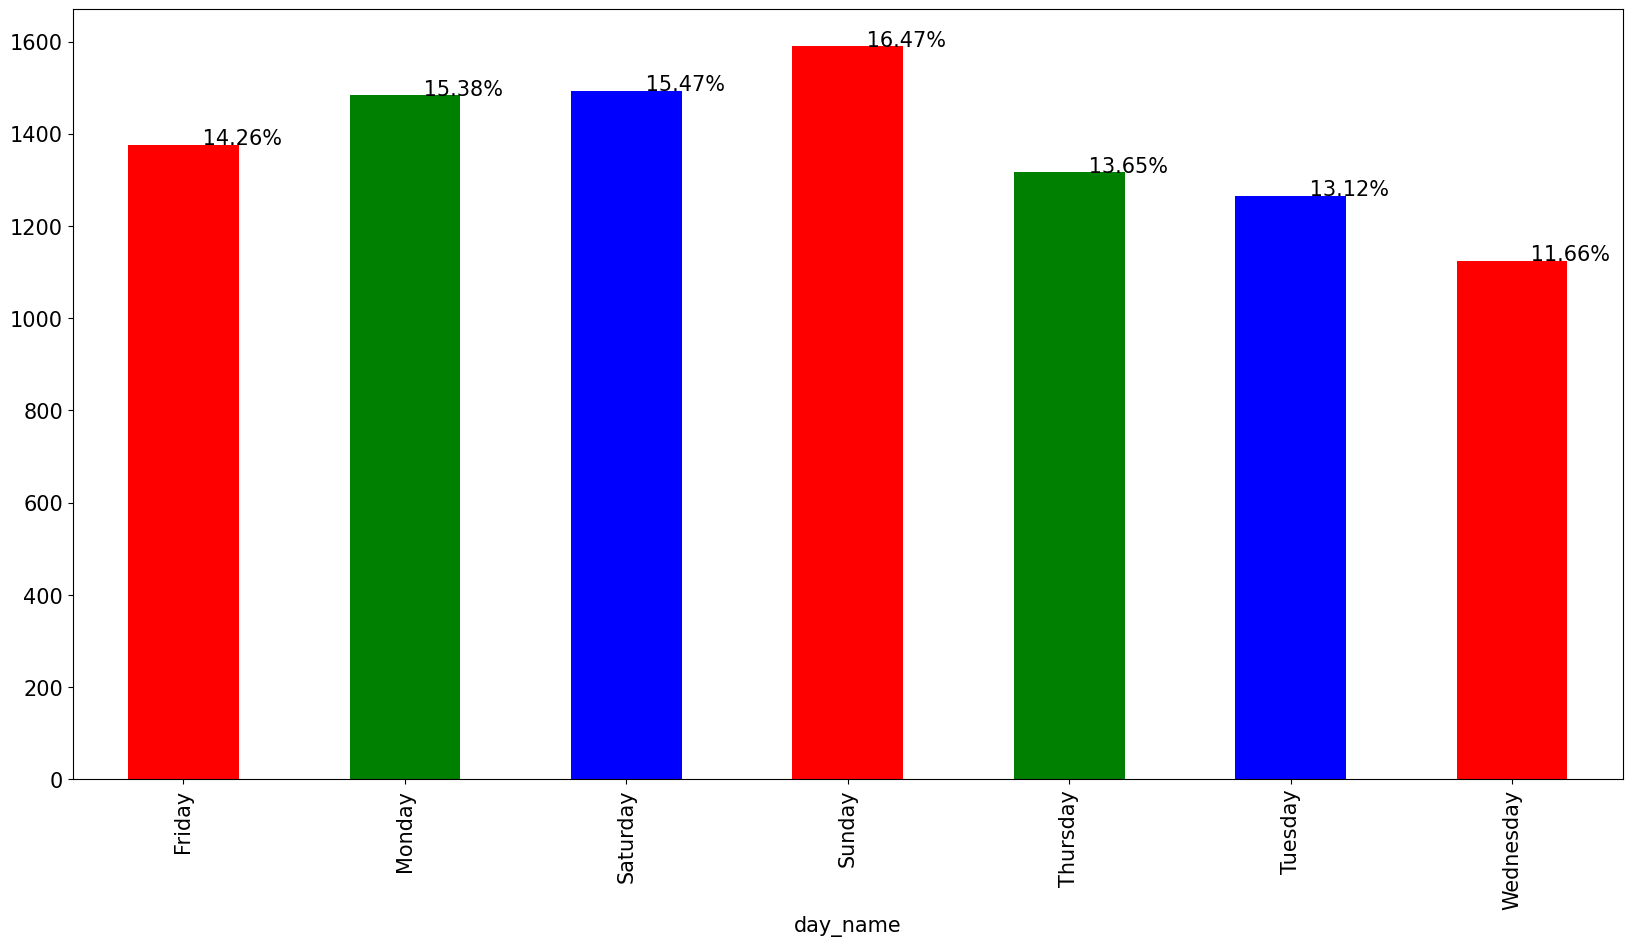

In [74]:
total=float(len(inp0[inp0.is_fraud==1]))
fig, ax=plt.subplots(1,1, figsize=[20,10])
(inp0[inp0.is_fraud==1].groupby("day_name")['is_fraud'].count()).plot.bar(color=["red", "green", "blue"])
for i in ax.patches:
    perc="{: .2f}%".format(100*i.get_height()/total)
    x=i.get_x()+i.get_width()
    y=i.get_height()
    ax.annotate(perc, (x,y), ha="center")
#plt.savefig("day.png")
plt.show()

# Saturday and Sunday fraud count is more

In [75]:
inp0.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'city_pop', 'job',
       'trans_num', 'is_fraud', 'age', 'cust_merchant_distance', 'hour',
       'Year', 'Month', 'Month_year', 'day_name', 'day_name_num', 'minutes'],
      dtype='object')

# Category vs Fraud

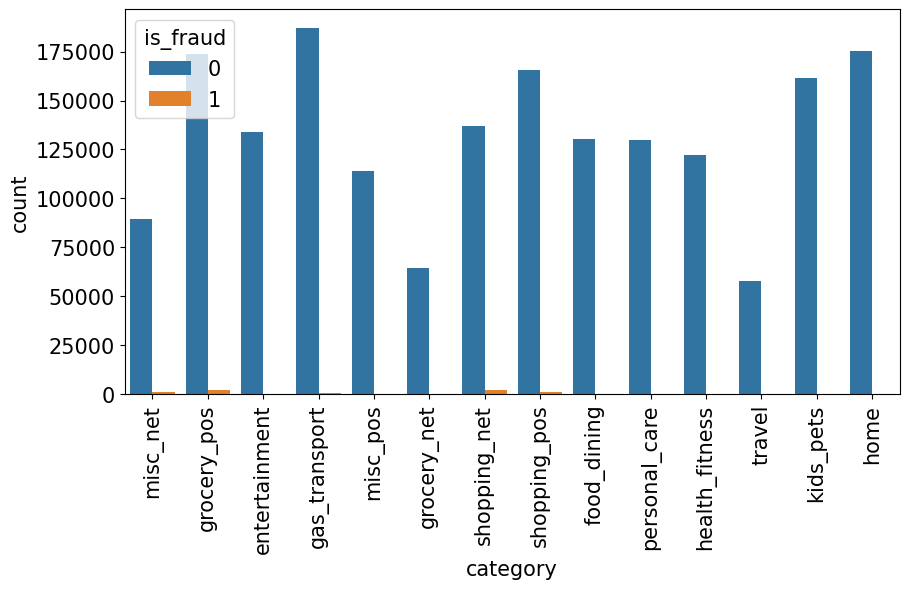

In [76]:
# Category vs Fraud

sns.countplot(x="category", hue="is_fraud", data=inp0)
plt.xticks(rotation=90)
plt.show()

# it does not give a good visualization lets try diffrent method

In [77]:
#get over all behaviour of customer purchase category wise

df_category=inp0.groupby('category')["is_fraud"].count().reset_index()
df_category.columns=["category", "category_count"]
df_category.sort_values("category_count", ascending=False)
percent=df_category.category_count/sum(df_category.category_count)

In [78]:
df_category["percentage"]=percent*100
df_category=df_category.sort_values(by=["percentage"], ascending=False)
df_category

category  category_count  percentage
2    gas_transport          188029   10.150594
4      grocery_pos          176191    9.511529
6             home          175460    9.472067
12    shopping_pos          166463    8.986371
7        kids_pets          161727    8.730702
11    shopping_net          139322    7.521186
0    entertainment          134118    7.240252
1      food_dining          130729    7.057300
10   personal_care          130085    7.022534
5   health_fitness          122553    6.615925
9         misc_pos          114229    6.166561
8         misc_net           90654    4.893883
3      grocery_net           64878    3.502387
13          travel           57956    3.128708

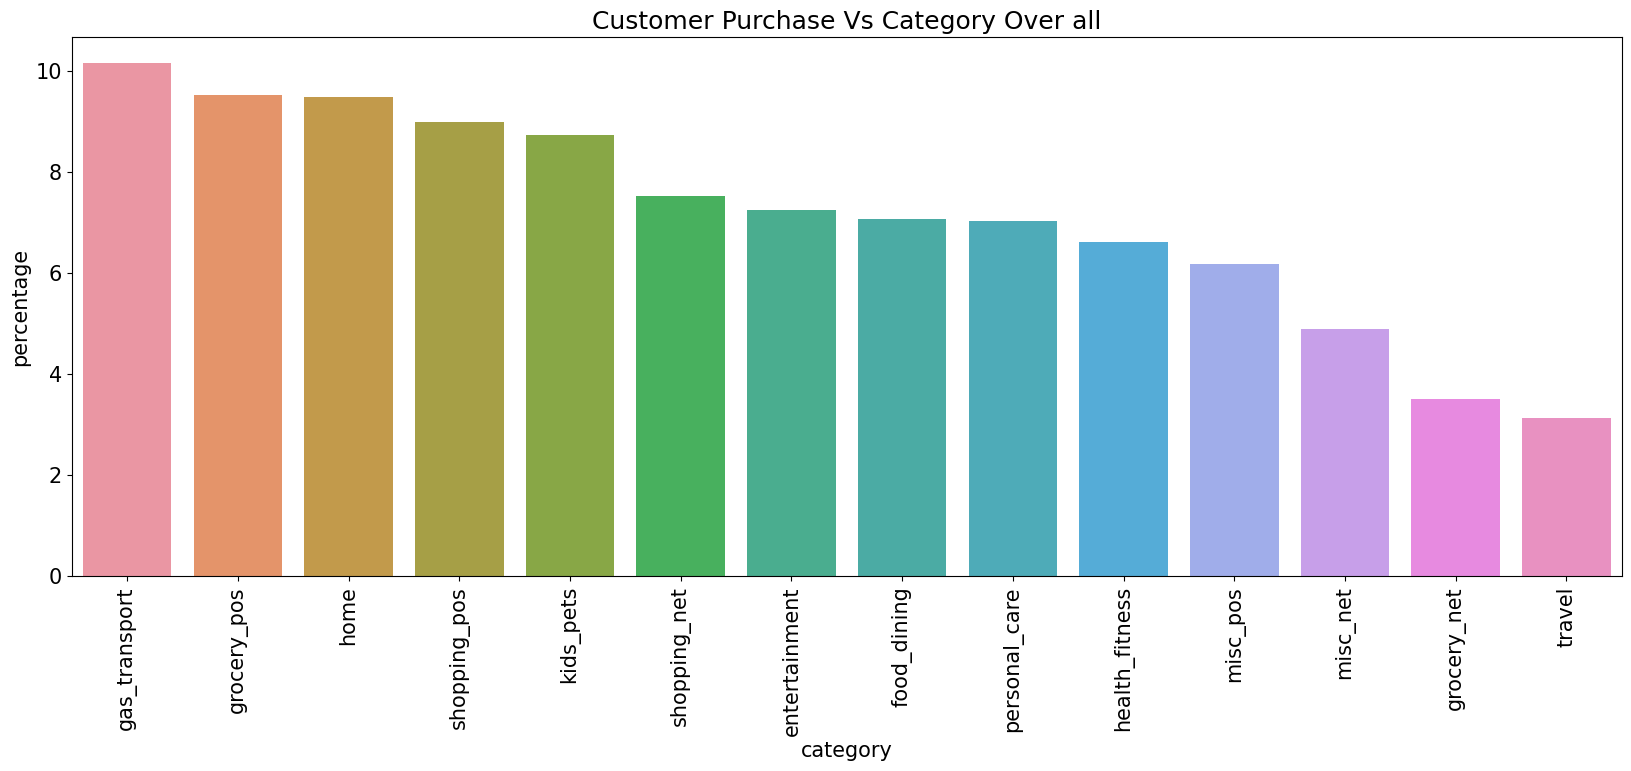

In [79]:
plt.figure(figsize=[20,7])
sns.barplot(x='category', y="percentage", data=df_category)
plt.xticks(rotation=90)
plt.title('Customer Purchase Vs Category Over all')
#plt.savefig("cate.png")
plt.show()

In [80]:
#get fraud behaviour of customer purchase category wise
fraud_category=inp0[inp0.is_fraud==1].groupby('category')["is_fraud"].count().reset_index()
fraud_category.columns=["category", "category_count"]
fraud_category.sort_values("category_count", ascending=False)
percent=(fraud_category.category_count/sum(fraud_category.category_count))*100
fraud_category["percentage"]=percent
fraud_category=fraud_category.sort_values(by=["percentage"], ascending=False)
# fraud_category.to_csv("fraud_cat.csv")

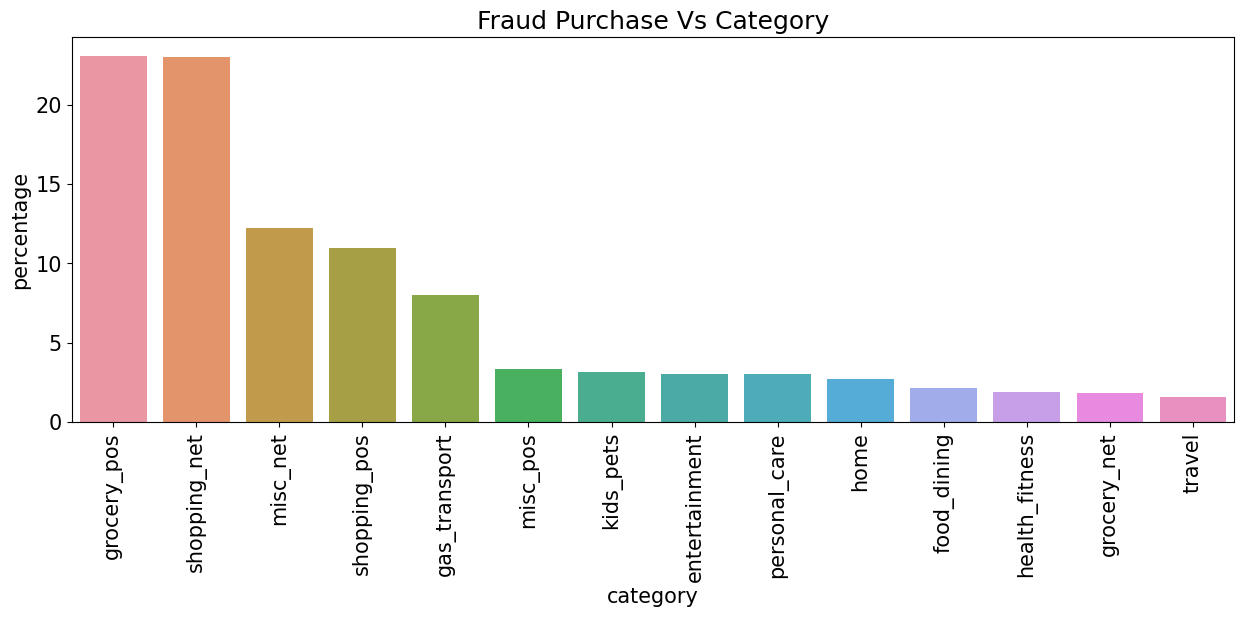

In [81]:

plt.figure(figsize=[15,5])
ax=sns.barplot(x='category', y="percentage", data=fraud_category)
plt.xticks(rotation=90)
plt.title('Fraud Purchase Vs Category')
#plt.savefig('fraudcate.png')
plt.show()

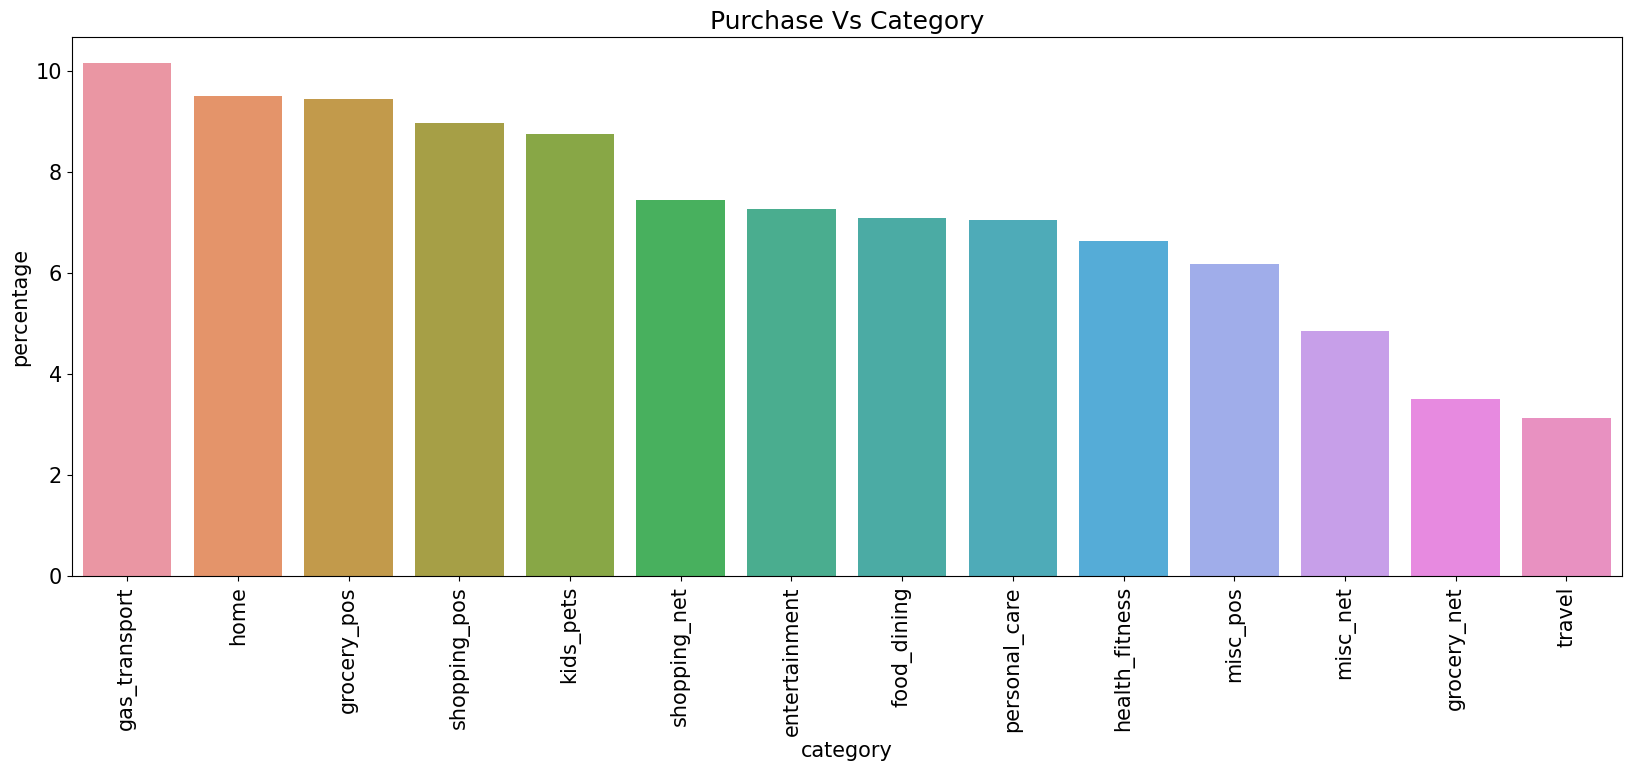

In [82]:
norm_category=inp0[inp0.is_fraud==0].groupby('category')["is_fraud"].count().reset_index()
norm_category.columns=["category", "category_count"]
norm_category.sort_values("category_count", ascending=False)
percent=(norm_category.category_count/sum(norm_category.category_count))*100
norm_category["percentage"]=percent
norm_category=norm_category.sort_values(by=["percentage"], ascending=False)
norm_category.head()

plt.figure(figsize=[20,7])
sns.barplot(x='category', y="percentage", data=norm_category)
plt.xticks(rotation=90)
plt.title('Purchase Vs Category')

plt.show()

# insight
Fraud people tend to spent in grocery, shopping, misc more category is going to be a good feature for modeling

# Category would be a good indicator to detect fraud

#  Age analysis with fraud

In [83]:
# make a age group box get the min and max of age

round(inp0[['age']].describe())

age
count 1852394.000000
mean       46.000000
std        17.000000
min        14.000000
25%        33.000000
50%        44.000000
75%        57.000000
max        96.000000

In [84]:
bin=[13,23,33,43,53,63,75,85,100]
lbl=["14-23", "24-33","34-43","44-53", "54-64","65-75",'76-85',"85+"]
inp0["age_group"]=pd.cut(inp0.age, bins=bin, labels=lbl)

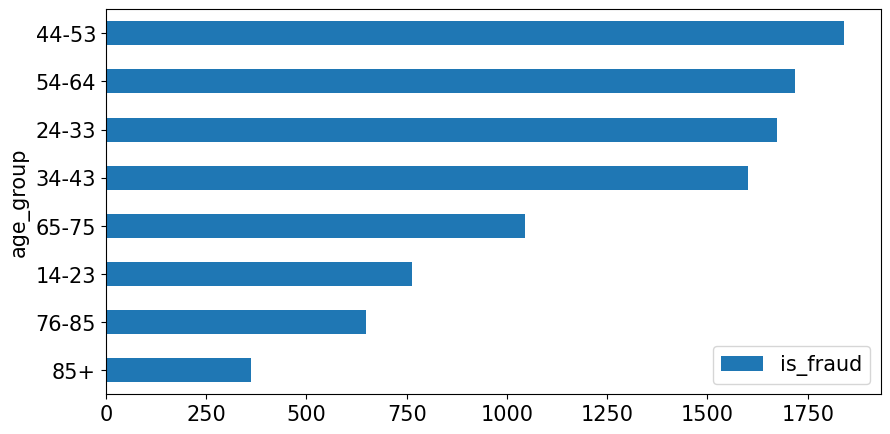

In [85]:
(inp0[inp0.is_fraud==1].groupby('age_group')[["is_fraud"]].sum()).sort_values('is_fraud').plot.barh()
#plt.savefig("age.png")
plt.show()

# People with very old age has less fraud trasaction probably the old people are less in count

In [86]:
#lets check the old people percentage

100*inp0[inp0.age>=80].age.count()/inp0.shape[0]

5.264160864265378

In [87]:
#lets check the very young people percentage
100*inp0[inp0.age<=23].age.count()/inp0.shape[0]

7.299149101109159

In [88]:
#lets check the 25-50 people percentage
100*inp0[(inp0.age>=25) & (inp0.age<=50)].age.count()/inp0.shape[0]

56.79466679334958

# Age does not matter where the person is going to victimized or not

# Gender vas Fraud

In [89]:
#check the male and feamle distribution in dataset
100*(inp0.groupby('gender')['is_fraud'].count()/inp0.shape[0])

gender
F   54.780408
M   45.219592
Name: is_fraud, dtype: float64

In [90]:
100*(inp0[inp0.is_fraud==1].groupby('gender')['is_fraud'].count()/inp0[inp0.is_fraud==1].shape[0]).round(3)

gender
F   50.800000
M   49.200000
Name: is_fraud, dtype: float64

In [91]:
# Male and Feamle distribution are almost same in fraud and over all data set

Text(0.5, 1.0, 'Male Vs Feamle Got Fraud')

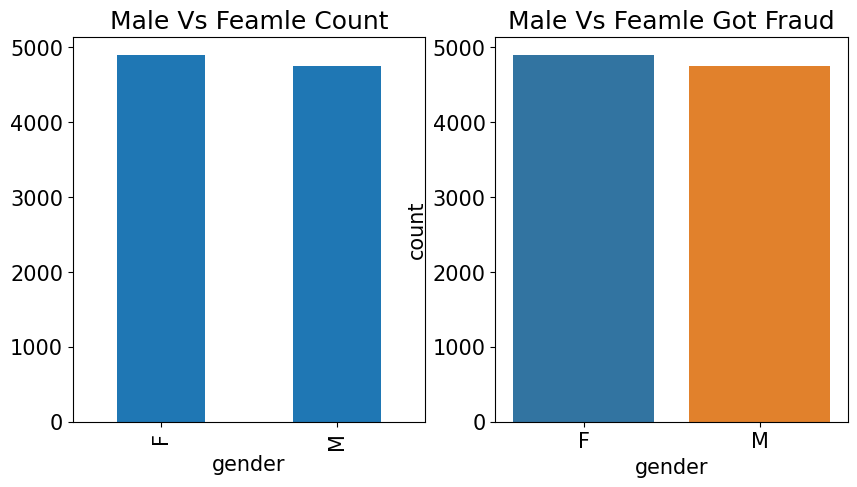

In [92]:
plt.subplot(1,2,1)
inp0.groupby('gender')['is_fraud'].sum().plot.bar()
plt.title("Male Vs Feamle Count")

plt.subplot(1,2,2)
sns.countplot(x="gender",  data = inp0[inp0.is_fraud==1])
plt.title("Male Vs Feamle Got Fraud")

# plt.savefig("male_feamle.png")

# Gender does not matter where the person is going to vitimized or not

# Distance Analysis

In [93]:
#check the distribution of the distance
np.round(pd.DataFrame( {"max_dist": [inp0.cust_merchant_distance.max()],
               "min_dis": [inp0.cust_merchant_distance.min()],
               "mean_dis": [inp0.cust_merchant_distance.mean()]}),2)

max_dist  min_dis  mean_dis
0 152.120000 0.020000 76.110001

In [94]:
np.round(pd.DataFrame( {"max_dist": [inp0[inp0.is_fraud==1].cust_merchant_distance.max()],
               "min_dis": [inp0[inp0.is_fraud==1].cust_merchant_distance.min()],
               "mean_dis": [inp0[inp0.is_fraud==1].cust_merchant_distance.mean()]}),2)

max_dist  min_dis  mean_dis
0 144.520000 0.740000 76.260002

In [95]:
 

inp0[ (inp0.is_fraud==1 ) & (inp0.cust_merchant_distance<=44)]["cust_merchant_distance"].count()

1490

In [96]:
#make a bucket of cust distance

bin=5
label=["very_close", "close", "medium_far", "far", "very_far"]
inp0["distance_flag"]=pd.cut(inp0['cust_merchant_distance'], bins=5, labels=label)

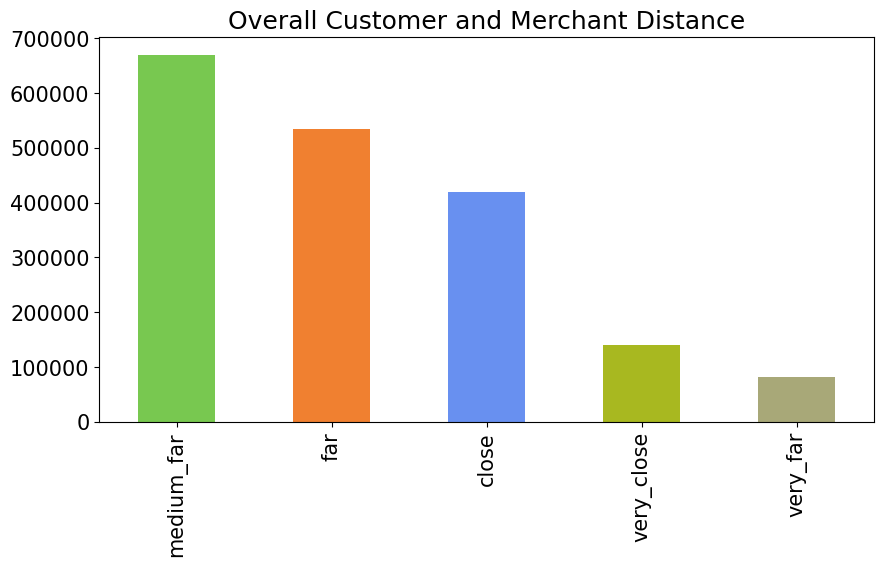

In [97]:
#over all customer behaviour
inp0[inp0.is_fraud==0].distance_flag.value_counts().plot.bar(color=['#78C850', "#F08030", "#6890F0", "#A8B820", "#A8A878"])
plt.title("Overall Customer and Merchant Distance")
#plt.savefig("dis.png")
plt.show()

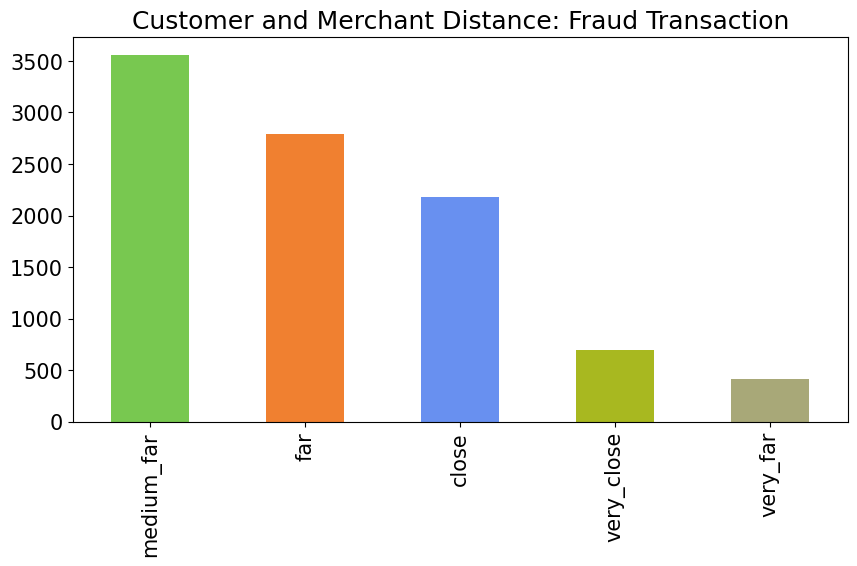

In [98]:
 #fraud  behaviour
inp0[inp0.is_fraud==1].distance_flag.value_counts().plot.bar(color=['#78C850', "#F08030", "#6890F0", "#A8B820", "#A8A878"])
plt.title("Customer and Merchant Distance: Fraud Transaction")
#plt.savefig("dis1.png")
plt.show()

# Distance does not matter for weather the customer is going to be victimized or not

# Lets check the merchant

In [99]:
print(Fore.BLUE+f"{inp0.merchant.value_counts()}")

fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hahn, Douglas and Schowalter       1091
fraud_Ritchie, Bradtke and Stiedemann    1090
Name: merchant, Length: 693, dtype: int64


In [100]:
inp0.merchant.nunique()

693

Text(0.5, 1.0, 'Customer visit In Merchant Shop')

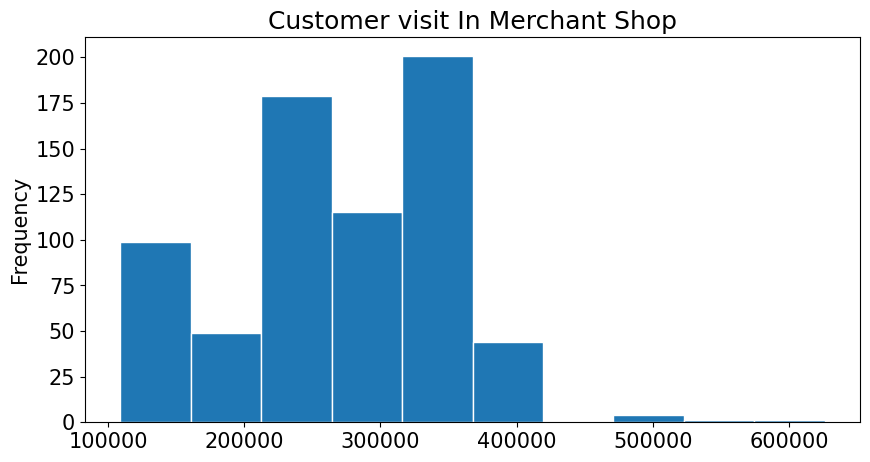

In [101]:
#lets check the customer vist per merchant

(inp0.groupby("merchant")['cc_num'].count()*100).plot.hist(edgecolor='white')
plt.title("Customer visit In Merchant Shop")

In [102]:
merch_df=inp0.groupby("merchant")[['cc_num']].count()
merch_df=merch_df.reset_index()
merch_df.columns.values[1]='visit_cnt'

per=100*merch_df["visit_cnt"]/sum(merch_df["visit_cnt"])
merch_df["percentage"]=per
merch_df.sort_values('visit_cnt', ascending=False)

merchant  visit_cnt  percentage
316                      fraud_Kilback LLC       6262    0.338049
105                      fraud_Cormier LLC       5246    0.283201
571                       fraud_Schumm PLC       5195    0.280448
349                         fraud_Kuhn LLC       5031    0.271594
70                         fraud_Boyer PLC       4999    0.269867
..                                     ...        ...         ...
143    fraud_Douglas, DuBuque and McKenzie       1101    0.059437
633                     fraud_Treutel-King       1098    0.059275
544                 fraud_Satterfield-Lowe       1095    0.059113
221     fraud_Hahn, Douglas and Schowalter       1091    0.058897
516  fraud_Ritchie, Bradtke and Stiedemann       1090    0.058843

[693 rows x 3 columns]

In [103]:
merch_df=inp0[inp0.is_fraud==1].groupby("merchant")[['cc_num']].count()
merch_df=merch_df.reset_index()
merch_df.columns.values[1]='visit_cnt'

per=100*merch_df["visit_cnt"]/sum(merch_df["visit_cnt"])
merch_df["percentage"]=per
merch_df.sort_values('visit_cnt', ascending=False)

merchant  visit_cnt  percentage
314     fraud_Kilback LLC         62    0.642420
335     fraud_Kozey-Boehm         60    0.621697
490    fraud_Rau and Sons         60    0.621697
146       fraud_Doyle Ltd         57    0.590612
609      fraud_Terry-Huel         56    0.580251
..                    ...        ...         ...
297  fraud_Kemmer-Reinger          1    0.010362
215   fraud_Hackett Group          1    0.010362
632      fraud_Turner LLC          1    0.010362
138  fraud_Dietrich-Fadel          1    0.010362
342      fraud_Kub-Heaney          1    0.010362

[685 rows x 3 columns]

# Merchant does not give much information as percentage of vist is very less (>1%) in each Merchant and there are high number of values

In [104]:
inp0.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt gender                        street  \
0       misc_net   4.970000      F                561 Perry Cove   
1    grocery_pos 107.230003      F  43039 Riley Greens Suite 393   
2  entertainment 220.110001      M      594 White Dale Suite 530   
3  gas_transport  45.000000      M   9443 Cynthia Court Apt. 038   
4       misc_pos  41.959999      M              408 Bradley Rest   

             city state    zip  ...  cust_merchant_distance hour  Year  Month  \
0  Moravian Falls    NC  28654  ...               78.597496    0  2019      1   
1          Orient    WA  99160  ...               30.212231    0  2019      1   
2      Malad City    ID  83252  ...              108.206093    0  2019      1   
3         Boulder    MT  59632  ...               95.673828    0  2019      1   
4        Doe Hill    VA  24433  ...               77.556351    0  2019      1   

   Month_year  day_name  day_name_num  minutes  age_group distance_flag  
0     2019-01   Tuesday             1        0      24-33    medium_far  
1     2019-01   Tuesday             1        0      34-43    very_close  
2     2019-01   Tuesday             1        0      54-64           far  
3     2019-01   Tuesday             1        1      44-53           far  
4     2019-01   Tuesday             1        3      24-33    medium_far  

[5 rows x 25 columns]

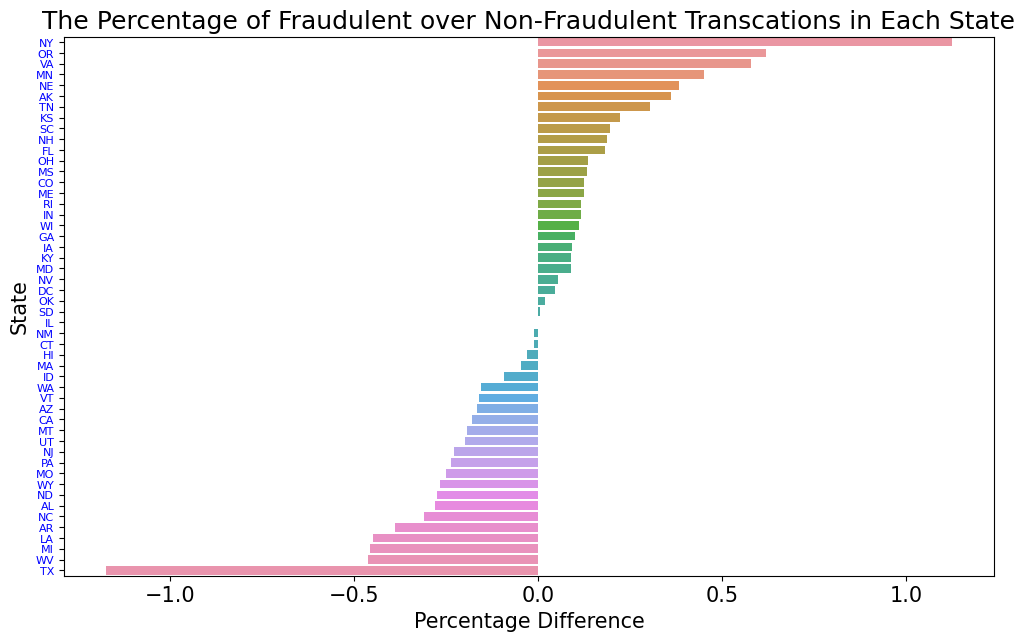

In [105]:
plt.figure(figsize=[12,7])
a=inp0['state'][inp0.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=inp0['state'][inp0.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.yticks(fontsize=8, color="blue")
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')
#plt.savefig("state.png")
plt.show()

#### NY and OH among others have a higher percentage of fraudulent transactions than normal ones, while TX and MT are the opposite. However, it should be pointed out that the percentage differences in those states are not very significant but a correlation does exist.

In [106]:
# Feature Engineering 
#one hot encoding 
gen_dum=pd.get_dummies(inp0.gender, drop_first=True, prefix="gender")
day_dum=pd.get_dummies(inp0.day_name, drop_first=True,prefix="day_name")
cat_dum=pd.get_dummies(inp0.category, prefix="category")
cat_dum.drop("category_travel",1, inplace=True) # as travel was the less important droped travel

#concat all new dummy df over axis and save in dum dataset
dum=pd.concat([gen_dum, day_dum, cat_dum], axis=1)
inp0.drop(["gender", "category", "day_name"],1, inplace=True)

In [107]:
#concat dum to inp0 and save in the name of inp1
inp1=pd.concat([inp0, dum], axis=1)

# check the shape
inp1.shape

(1852394, 42)

In [108]:
#check head
inp1.head(3)

trans_date_trans_time            cc_num                         merchant  \
0   2019-01-01 00:00:18  2703186189652095       fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322  fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661             fraud_Lind-Buckridge   

         amt                        street            city state    zip  \
0   4.970000                561 Perry Cove  Moravian Falls    NC  28654   
1 107.230003  43039 Riley Greens Suite 393          Orient    WA  99160   
2 220.110001      594 White Dale Suite 530      Malad City    ID  83252   

   city_pop                                job  ... category_grocery_net  \
0      3495          Psychologist, counselling  ...                    0   
1       149  Special educational needs teacher  ...                    0   
2      4154        Nature conservation officer  ...                    0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   

  category_personal_care  category_shopping_net  category_shopping_pos  
0                      0                      0                      0  
1                      0                      0                      0  
2                      0                      0                      0  

[3 rows x 42 columns]

In [109]:
#check nan
inp0.isna().sum().sum()

0

In [110]:
inp1.columns.tolist()

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'amt',
 'street',
 'city',
 'state',
 'zip',
 'city_pop',
 'job',
 'trans_num',
 'is_fraud',
 'age',
 'cust_merchant_distance',
 'hour',
 'Year',
 'Month',
 'Month_year',
 'day_name_num',
 'minutes',
 'age_group',
 'distance_flag',
 'gender_M',
 'day_name_Monday',
 'day_name_Saturday',
 'day_name_Sunday',
 'day_name_Thursday',
 'day_name_Tuesday',
 'day_name_Wednesday',
 'category_entertainment',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos']

In [111]:
inp1.drop(["street","city","state","zip","Month_year","day_name_num" ], axis=1, inplace=True)

In [112]:
inp0.drop("trans_num",1, inplace=True)
inp0.drop(["age_group"],1, inplace=True)

In [113]:
print(Fore.BLUE+f"{inp1.columns}")

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'city_pop', 'job',
       'trans_num', 'is_fraud', 'age', 'cust_merchant_distance', 'hour',
       'Year', 'Month', 'minutes', 'age_group', 'distance_flag', 'gender_M',
       'day_name_Monday', 'day_name_Saturday', 'day_name_Sunday',
       'day_name_Thursday', 'day_name_Tuesday', 'day_name_Wednesday',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos'],
      dtype='object')


In [114]:
#extracting some important columns mannually
col_0=['amt', "city_pop","category_entertainment",'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos',"hour","age", "cust_merchant_distance","is_fraud"]

In [115]:
df1=inp1[col_0]

In [116]:
df1.head()

amt  city_pop  category_entertainment  category_food_dining  \
0   4.970000      3495                       0                     0   
1 107.230003       149                       0                     0   
2 220.110001      4154                       1                     0   
3  45.000000      1939                       0                     0   
4  41.959999        99                       0                     0   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                       0                     0                     0   
1                       0                     0                     1   
2                       0                     0                     0   
3                       1                     0                     0   
4                       0                     0                     0   

   category_health_fitness  category_home  category_kids_pets  \
0                        0              0                   0   
1                        0              0                   0   
2                        0              0                   0   
3                        0              0                   0   
4                        0              0                   0   

   category_misc_net  category_misc_pos  category_personal_care  \
0                  1                  0                       0   
1                  0                  0                       0   
2                  0                  0                       0   
3                  0                  0                       0   
4                  0                  1                       0   

   category_shopping_net  category_shopping_pos  hour  age  \
0                      0                      0     0   31   
1                      0                      0     0   41   
2                      0                      0     0   57   
3                      0                      0     0   52   
4                      0                      0     0   33   

   cust_merchant_distance  is_fraud  
0               78.597496         0  
1               30.212231         0  
2              108.206093         0  
3               95.673828         0  
4               77.556351         0

Text(0.5, 1.0, 'Amount Distribution BoxPlot')

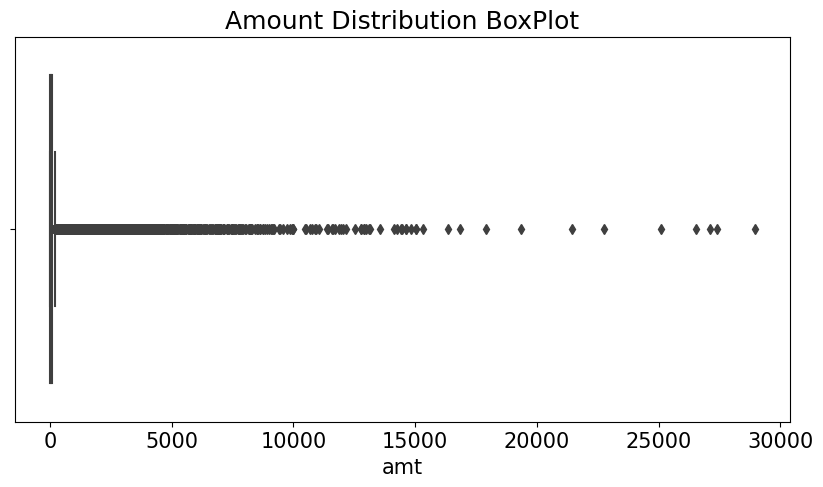

In [117]:
#check outlier in amnt
sns.boxplot(df1.amt)
plt.title("Amount Distribution BoxPlot")

<AxesSubplot:title={'center':'cust_merchant_distance :Distribution BoxPlot'}, xlabel='cust_merchant_distance'>

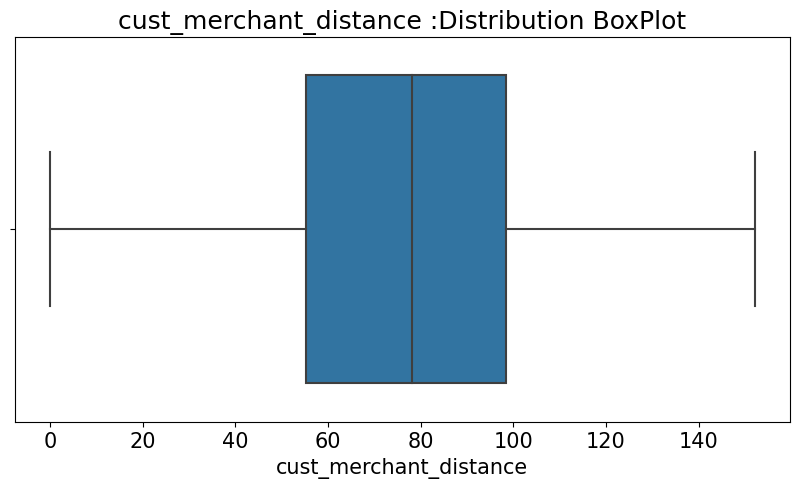

In [118]:
plt.title("cust_merchant_distance :Distribution BoxPlot")
sns.boxplot(df1.cust_merchant_distance)

In [119]:
def cap_outliers_func(df, thr=3): #keeping 3*std as outliers
    upper_limt=df.mean()+df.std()*thr
    lower_limit=df.mean()-df.std()*thr
    df[df>upper_limt]=upper_limt
    df[df<lower_limit]=lower_limit
    return df

In [120]:
df1.amt=df1[["amt"]].apply(cap_outliers_func)

In [121]:
df1.city_pop=df1[["city_pop"]].apply(cap_outliers_func)


In [122]:
df1.head()

amt    city_pop  category_entertainment  category_food_dining  \
0   4.970000 3495.000000                       0                     0   
1 107.230003  149.000000                       0                     0   
2 220.110001 4154.000000                       1                     0   
3  45.000000 1939.000000                       0                     0   
4  41.959999   99.000000                       0                     0   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                       0                     0                     0   
1                       0                     0                     1   
2                       0                     0                     0   
3                       1                     0                     0   
4                       0                     0                     0   

   category_health_fitness  category_home  category_kids_pets  \
0                        0              0                   0   
1                        0              0                   0   
2                        0              0                   0   
3                        0              0                   0   
4                        0              0                   0   

   category_misc_net  category_misc_pos  category_personal_care  \
0                  1                  0                       0   
1                  0                  0                       0   
2                  0                  0                       0   
3                  0                  0                       0   
4                  0                  1                       0   

   category_shopping_net  category_shopping_pos  hour  age  \
0                      0                      0     0   31   
1                      0                      0     0   41   
2                      0                      0     0   57   
3                      0                      0     0   52   
4                      0                      0     0   33   

   cust_merchant_distance  is_fraud  
0               78.597496         0  
1               30.212231         0  
2              108.206093         0  
3               95.673828         0  
4               77.556351         0

<AxesSubplot:>

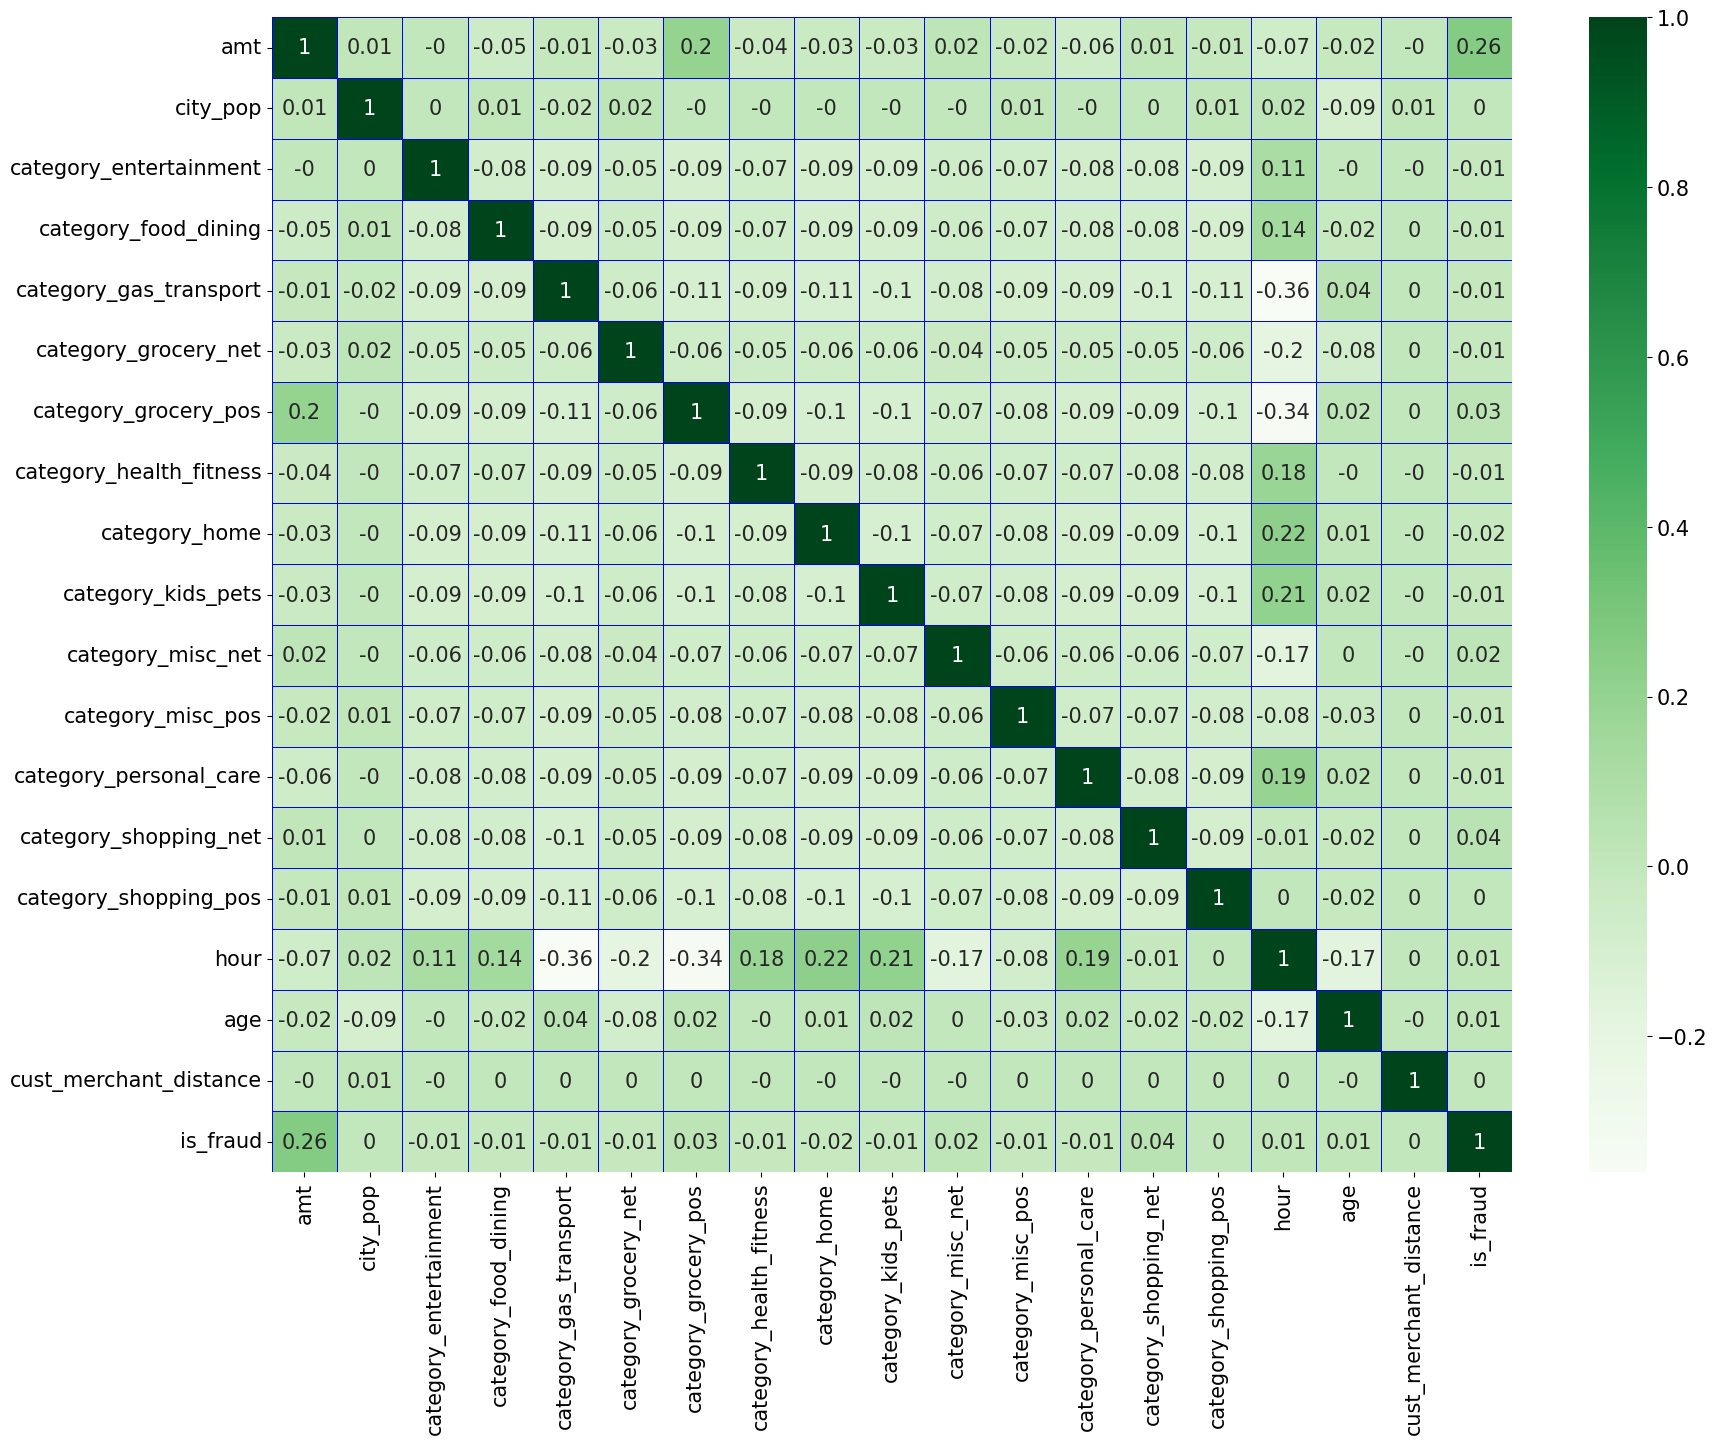

In [123]:
#check the corelation

plt.figure(figsize=[20,15])
sns.heatmap(np.round(df1.corr(),2), annot=True, cmap="Greens", fmt=".2g", linecolor="blue", linewidths=.5,)

# It seems the features have no correlation with each other

# Train Test Split

In [124]:
#checking how many cols are present now for model buling
df1.shape[1]

19

In [125]:
#define X, Y
X=df1.drop('is_fraud',1)
print(X.shape)

Y=df1.is_fraud
Y.shape

(1852394, 18)


(1852394,)

In [126]:
#split the data with stratify Y
x_train, X_test, y_train, Y_test= train_test_split(X,Y, train_size=.7, test_size=.3, random_state=1, stratify=Y)

In [127]:
#checking if data distribution of 1 and 0 are same kind in Y_test and y_train
y_train.value_counts(normalize=True)

0   0.994790
1   0.005210
Name: is_fraud, dtype: float64

In [128]:
Y_test.value_counts(normalize=True)


0   0.994791
1   0.005209
Name: is_fraud, dtype: float64

### Data Imbalnce Handelling


#  Under Sampling

In [129]:
#RandomUnderSampling method
random_under_samp=RandomUnderSampler(random_state=45)

In [130]:
#resample the x and y train sets only

x_re_samp_rus, y_re_sam_rus=random_under_samp.fit_resample(x_train, y_train)
y_re_sam_rus.shape, x_re_samp_rus.shape

((13512,), (13512, 18))

In [131]:
def check_metrics(model,name, x_train, x_test, y_train, y_test):
   
    
   #predict for train and test
    model.fit(x_train,y_train) # fit twith x and y train
    y_pred_train=model.predict(x_train) # Predict for train
    y_pred=model.predict(x_test) #predict for test
    
    acc_train=accuracy_score(y_train, y_pred_train) #accuracy
    
    prec_train=precision_score(y_train, y_pred_train) #precision
    
    rec_train=recall_score(y_train, y_pred_train) #recall
    
    auc_train=roc_auc_score(y_train, y_pred_train) #auc
    f1_sco= f1_score(y_train, y_pred_train) #f1 score
    
    cm_train=confusion_matrix(y_train, y_pred_train) #confusion metric
    
    #creating the metric df for train set
    df_train=pd.DataFrame({"model_train":[name],   
                     "Accuracy":[acc_train],
                     "Precision":[prec_train],
                     "Recall":[rec_train],
                          "AUC":[auc_train],
                          "f1_score":[f1_sco]})
    
    acc=accuracy_score(y_test, y_pred) #accuracy for test data
    prec=precision_score(y_test, y_pred) #precision for test
    rec=recall_score(y_test, y_pred) #recall for test data
    auc=roc_auc_score(y_test, y_pred) #auc for test data
    cm=confusion_matrix(y_test, y_pred) #confusion metrics for test data
    f1=f1_score(y_test, y_pred) #f1 score
    
    #creating df for test metrics
    df_test=pd.DataFrame({"model_test":[name],
                     "Accuracy":[acc],
                     "Precision":[prec],
                     "Recall":[rec],
                         "AUC":[auc],
                         "f1_score":[f1]})
    
    print(Fore.RED+"                             [[[ DETAIL REPORT ]]]    ")
    print()
   
    print(Fore.RED+"Train Result")
    print(Fore.BLACK+"<<<<<<<<<>>>>>>>>>>>>")
    print(Fore.RED+f'{cm_train}')
   # plot_confusion_matrix(model, x_train, y_train)
    print(Fore.BLUE+f'{df_train}')
    
    print()
    print()
    print(Fore.RED+"Test Result")
    print(Fore.BLACK+"<<<<<<<<<>>>>>>>>>>>>")
#     print(Fore.RED+f"{cm}")
    plot_confusion_matrix(model, x_test, y_test)
    
    print(Fore.BLUE+f'{df_test}')
    print(Fore.RED+"...............................")
    print()
    print("<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>")
    print(Fore.BLUE+classification_report(y_test, y_pred))
    
    plot_roc_curve(model, x_test, y_test , drop_intermediate=True)
    plt.plot([1,0],[1,0], 'o--')

    return (df_test) # the function will return only the test metric df 
                           

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6132  624]
 [1568 5188]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          lr  0.837774   0.892636 0.767910 0.837774  0.825589


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         lr  0.906764   0.040642 0.747496 0.827547  0.077092
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    552824
           1       0.04      0.75      0.08      2895

    accuracy                           0.91    555719
   macro avg       0.52      0.83      0.51    555719
weighted avg       0.99      0.91      0.95    555719



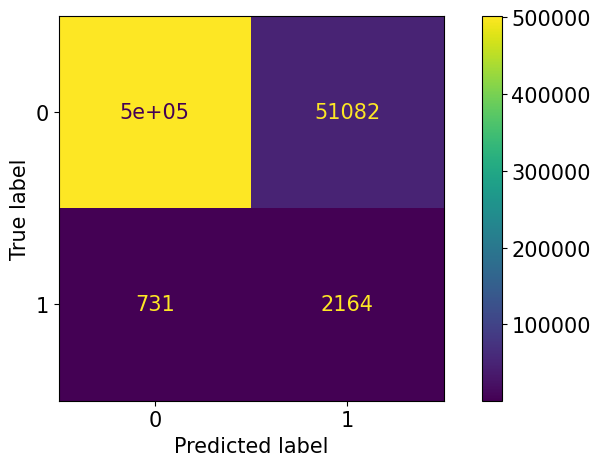

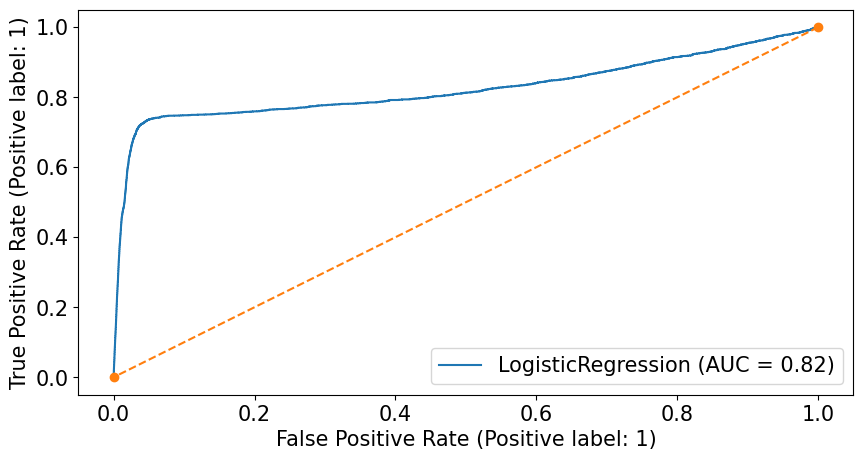

In [132]:
lr=LogisticRegression(random_state=9)
lr_df=check_metrics(lr,"lr",x_re_samp_rus, X_test,y_re_sam_rus, Y_test )

In [133]:
dt=DecisionTreeClassifier(max_depth=20, random_state=45, min_samples_split=50)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6623  133]
 [ 175 6581]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          dt  0.977205   0.980191 0.974097 0.977205  0.977134


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         dt  0.971590   0.150956 0.963040 0.967337  0.261000
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    552824
           1       0.15      0.96      0.26      2895

    accuracy                           0.97    555719
   macro avg       0.58      0.97      0.62    555719
weighted avg       1.00      0.97      0.98    555719



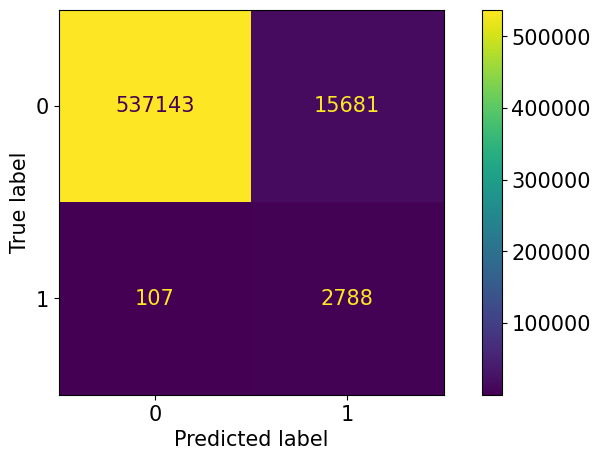

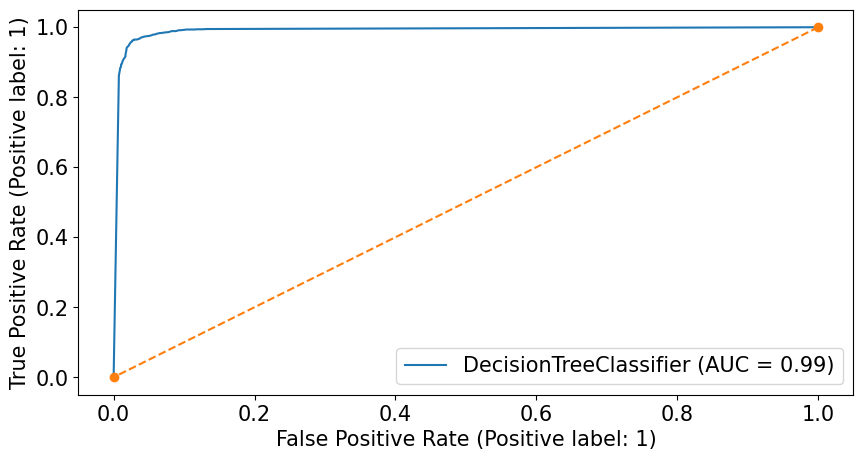

In [134]:
dt_df=check_metrics(dt,"dt",x_re_samp_rus, X_test,y_re_sam_rus, Y_test )

In [135]:
rf=RandomForestClassifier(n_estimators=100,max_depth=20 ,random_state=45)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6752    4]
 [  26 6730]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          rf  0.997780   0.999406 0.996152 0.997780  0.997776


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         rf  0.975601   0.173164 0.975820 0.975710  0.294133
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552824
           1       0.17      0.98      0.29      2895

    accuracy                           0.98    555719
   macro avg       0.59      0.98      0.64    555719
weighted avg       1.00      0.98      0.98    555719



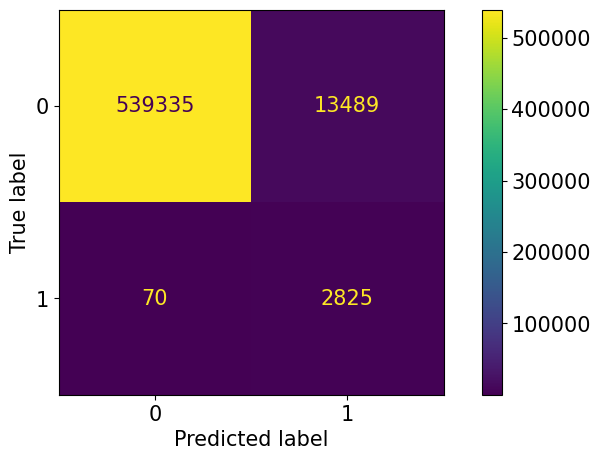

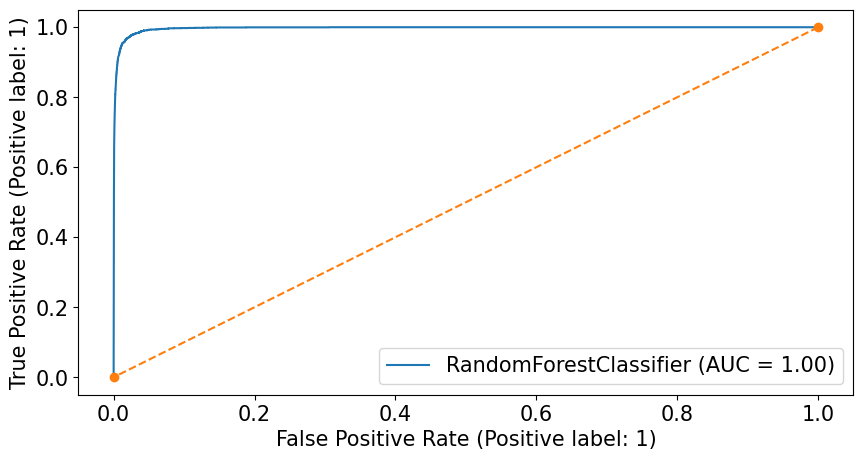

In [136]:
rf_df=check_metrics(rf,"rf",x_re_samp_rus, X_test,y_re_sam_rus, Y_test )

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6687   69]
 [  39 6717]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0         xgb  0.992007   0.989832 0.994227 0.992007  0.992025


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0        xgb  0.974779   0.168880 0.979620 0.977187  0.288094
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    552824
           1       0.17      0.98      0.29      2895

    accuracy                           0.97    555719
   macro avg       0.58      0.98      0.64    555719
weighted avg       1.00      0.97      0.98    555719



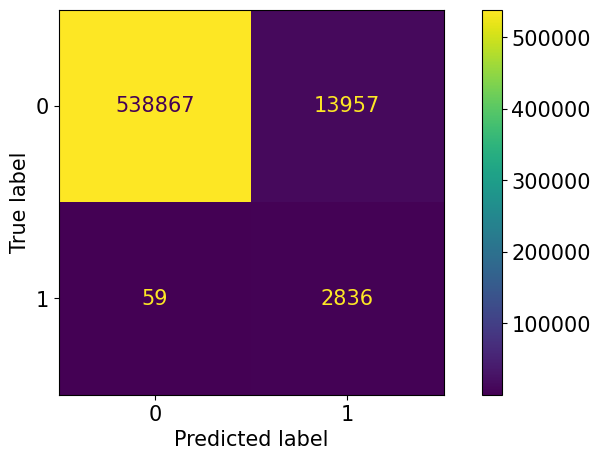

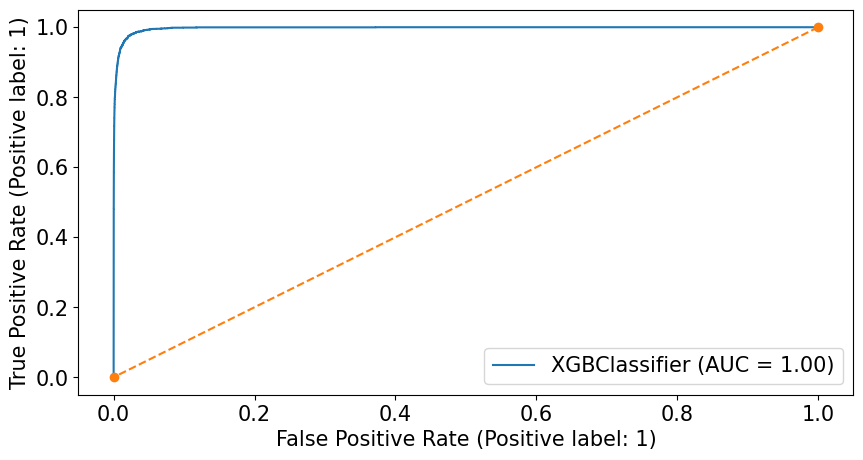

In [137]:
#lets check with XGBClassifier
xg=XGBClassifier(n_estimators=50, random_state=45)
xg_df=check_metrics(xg,"xgb",x_re_samp_rus, X_test,y_re_sam_rus, Y_test)

In [138]:
# concat all metric df
metric_df_rus=pd.concat([lr_df, dt_df, rf_df, xg_df],axis=0)
metric_df_rus

## With Undersampling the Data we are getting 

model_test  Accuracy  Precision   Recall      AUC  f1_score
0         lr  0.906764   0.040642 0.747496 0.827547  0.077092
0         dt  0.971590   0.150956 0.963040 0.967337  0.261000
0         rf  0.975601   0.173164 0.975820 0.975710  0.294133
0        xgb  0.974779   0.168880 0.979620 0.977187  0.288094

### With undersampling we are getting good Recall But Not getting Good precision

# Lets Check Over sampling the data

In [139]:
random_over_samp=RandomOverSampler(random_state=45,sampling_strategy="minority")

In [140]:
x_re_samp_ros, y_re_sam_ros=random_under_samp.fit_resample(x_train, y_train)
y_re_sam_ros.shape, x_re_samp_ros.shape

((13512,), (13512, 18))

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6132  624]
 [1568 5188]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          lr  0.837774   0.892636 0.767910 0.837774  0.825589


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         lr  0.906764   0.040642 0.747496 0.827547  0.077092
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    552824
           1       0.04      0.75      0.08      2895

    accuracy                           0.91    555719
   macro avg       0.52      0.83      0.51    555719
weighted avg       0.99      0.91      0.95    555719



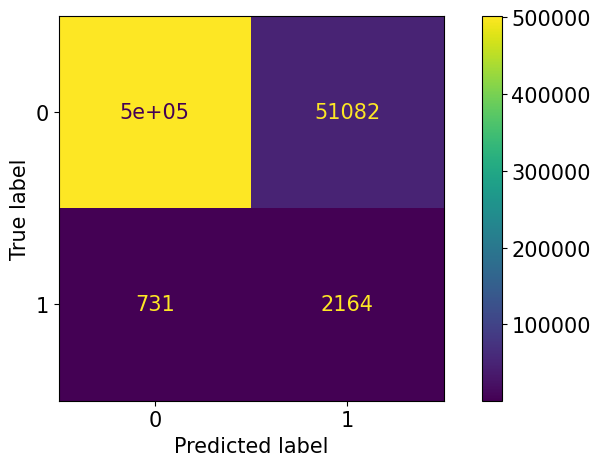

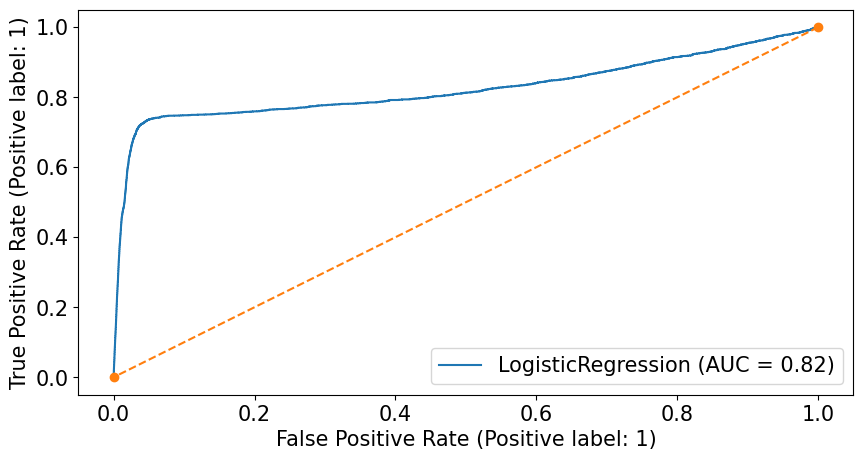

In [141]:
lr_df=check_metrics(lr,"lr", x_re_samp_ros, X_test, y_re_sam_ros, Y_test)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6623  133]
 [ 175 6581]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          dt  0.977205   0.980191 0.974097 0.977205  0.977134


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         dt  0.971590   0.150956 0.963040 0.967337  0.261000
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    552824
           1       0.15      0.96      0.26      2895

    accuracy                           0.97    555719
   macro avg       0.58      0.97      0.62    555719
weighted avg       1.00      0.97      0.98    555719



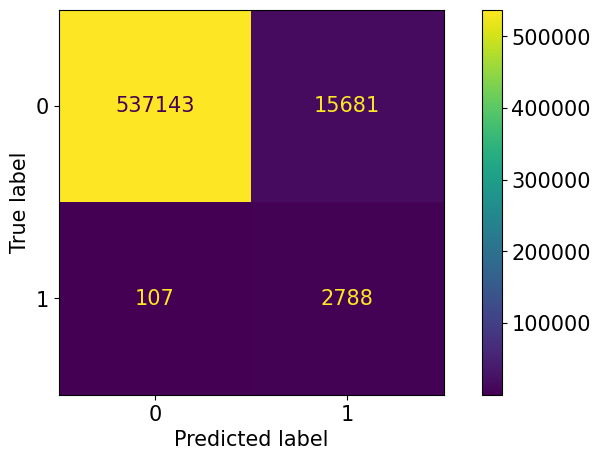

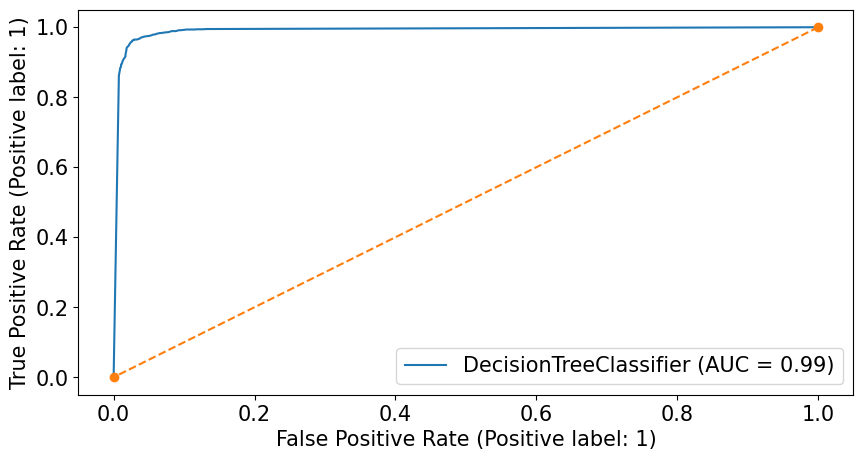

In [142]:
dt_df=check_metrics(dt,"dt", x_re_samp_ros, X_test, y_re_sam_ros, Y_test)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6752    4]
 [  26 6730]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          rf  0.997780   0.999406 0.996152 0.997780  0.997776


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         rf  0.975601   0.173164 0.975820 0.975710  0.294133
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552824
           1       0.17      0.98      0.29      2895

    accuracy                           0.98    555719
   macro avg       0.59      0.98      0.64    555719
weighted avg       1.00      0.98      0.98    555719



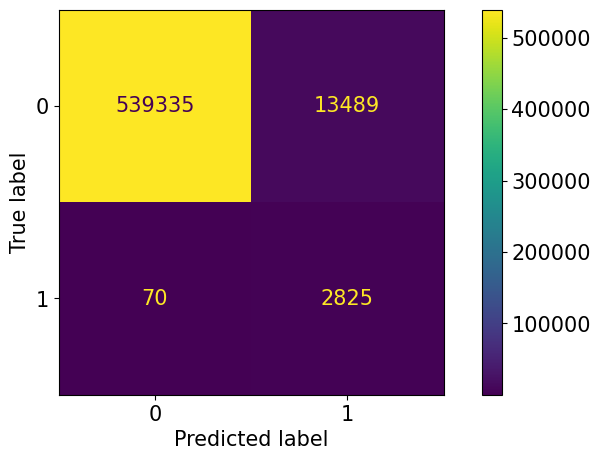

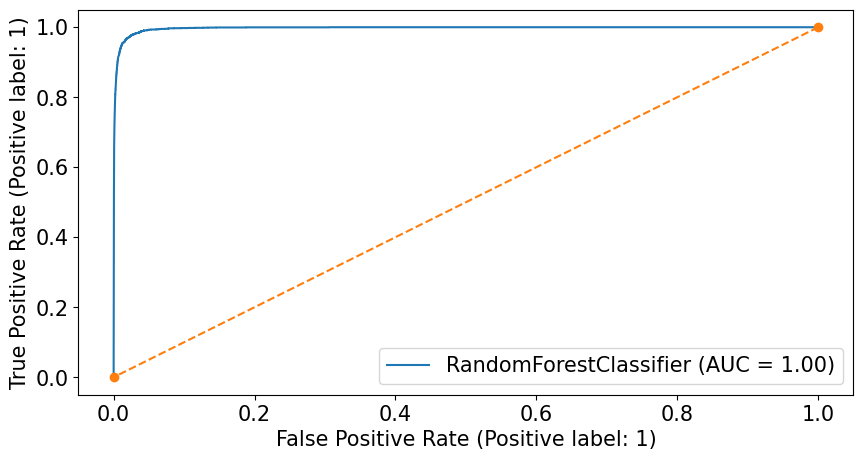

In [143]:
rf_df=lr_df=check_metrics(rf,"rf", x_re_samp_ros, X_test, y_re_sam_ros, Y_test)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6687   69]
 [  39 6717]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          xg  0.992007   0.989832 0.994227 0.992007  0.992025


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         xg  0.974779   0.168880 0.979620 0.977187  0.288094
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    552824
           1       0.17      0.98      0.29      2895

    accuracy                           0.97    555719
   macro avg       0.58      0.98      0.64    555719
weighted avg       1.00      0.97      0.98    555719



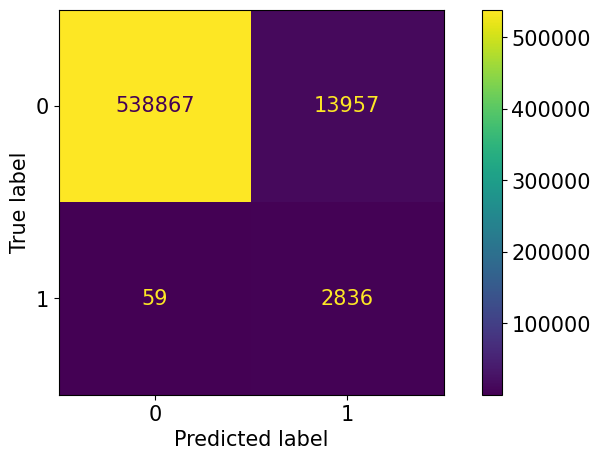

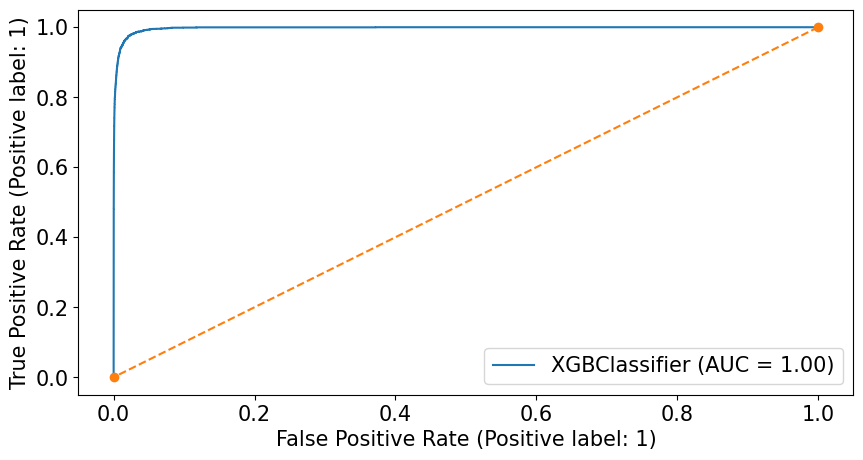

In [144]:
#xgb test
xgb_df=lr_df=check_metrics(xg,"xg", x_re_samp_ros, X_test, y_re_sam_ros, Y_test)

In [145]:
metric_df_ros=pd.concat([lr_df, dt_df, rf_df, xg_df])
metric_df_ros

model_test  Accuracy  Precision   Recall      AUC  f1_score
0         xg  0.974779   0.168880 0.979620 0.977187  0.288094
0         dt  0.971590   0.150956 0.963040 0.967337  0.261000
0         rf  0.975601   0.173164 0.975820 0.975710  0.294133
0        xgb  0.974779   0.168880 0.979620 0.977187  0.288094

# Random over Sample: gave the same result with a very litle incrment of Precision

#### Through Adasyn method result came was not satisfactory. As This Takes too much time I am commenting out the code.


In [146]:
# ady=ADASYN(random_state=45, n_neighbors=5, sampling_strategy="minority")
# x_re_samp_ady, y_re_sam_ady=ady.fit_resample(x_train, y_train)
# y_re_sam_ady.shape, x_re_samp_ady.shape

In [147]:
# lr_df=check_metrics(lr,"lr", x_re_samp_ady, X_test, y_re_sam_ady, Y_test)

In [148]:
# dt_df=check_metrics(dt, "dt",x_re_samp_ady, X_test, y_re_sam_ady, Y_test)

In [149]:
# rf_df=check_metrics(rf,"rf" ,x_re_samp_ady, X_test, y_re_sam_ady, Y_test)

In [150]:
# metric_df_ady=pd.concat([lr_df, dt_df, rf_df])
# metric_df_ady

# Manual Undersamplling

In [151]:
# get fraud df
df_frud_true=df1[df1.is_fraud==1]

In [152]:
# get non fraud df
df_fraud_false=df1[df1.is_fraud==0]

In [153]:
#get the count of fraud
count_fraud=df_frud_true.shape[0]

In [154]:
#get df from non fraud with same numbers of rows of fraud df
df_equal=df_fraud_false.sample(count_fraud)

In [155]:
#concat df_equal with df_fraud_true
df_maualUnderSample=pd.concat([df_frud_true, df_equal])

In [156]:
#get the new df_maualUnderSample
df_maualUnderSample.shape

(19302, 19)

In [157]:
#define X1, Y1 and split the data
X1=df_maualUnderSample.drop('is_fraud',1)
Y1=df_maualUnderSample[["is_fraud"]]
x_train1, X_test1, y_train1, Y_test1=train_test_split(X1,Y1,train_size=.7, random_state=45, stratify=Y1 )

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6085  671]
 [1647 5108]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          lr  0.828436   0.883890 0.756181 0.828431  0.815063


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         lr  0.845277   0.901606 0.775207 0.845289  0.833643
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2895
           1       0.90      0.78      0.83      2896

    accuracy                           0.85      5791
   macro avg       0.85      0.85      0.84      5791
weighted avg       0.85      0.85      0.84      5791



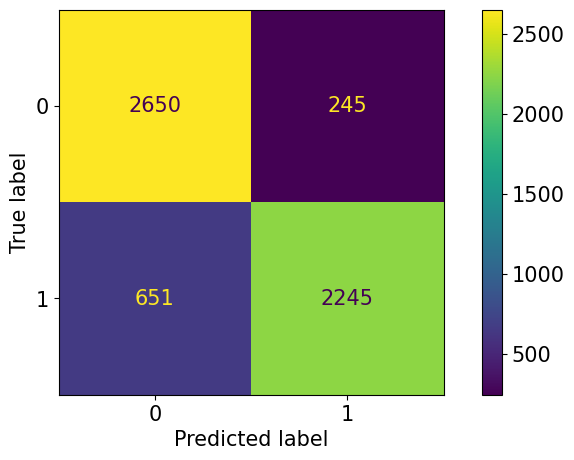

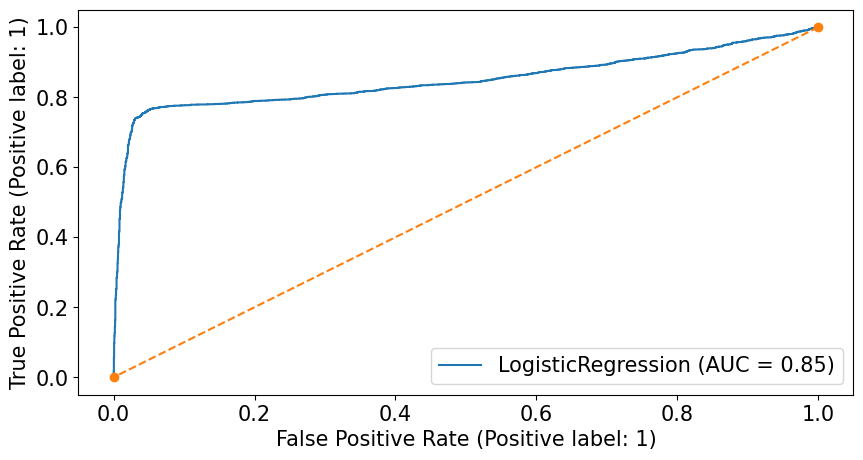

In [158]:
#check with Logestic regression
lr_df=check_metrics(lr,"lr",x_train1, X_test1, y_train1, Y_test1)

In [159]:
lr_df

model_test  Accuracy  Precision   Recall      AUC  f1_score
0         lr  0.845277   0.901606 0.775207 0.845289  0.833643

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6599  157]
 [ 186 6569]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          dt  0.974613   0.976658 0.972465 0.974613  0.974557


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         dt  0.970989   0.972954 0.968923 0.970990  0.970934
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2895
           1       0.97      0.97      0.97      2896

    accuracy                           0.97      5791
   macro avg       0.97      0.97      0.97      5791
weighted avg       0.97      0.97      0.97      5791



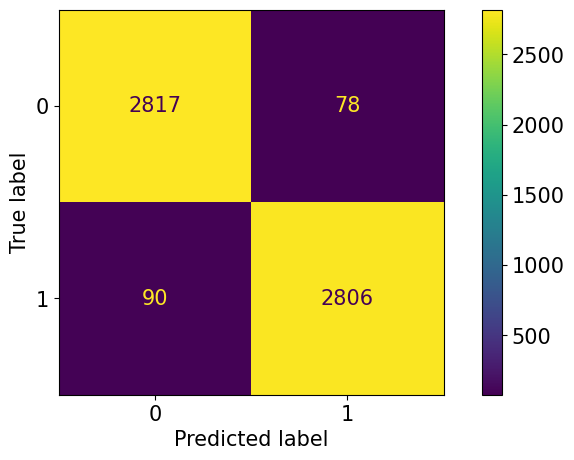

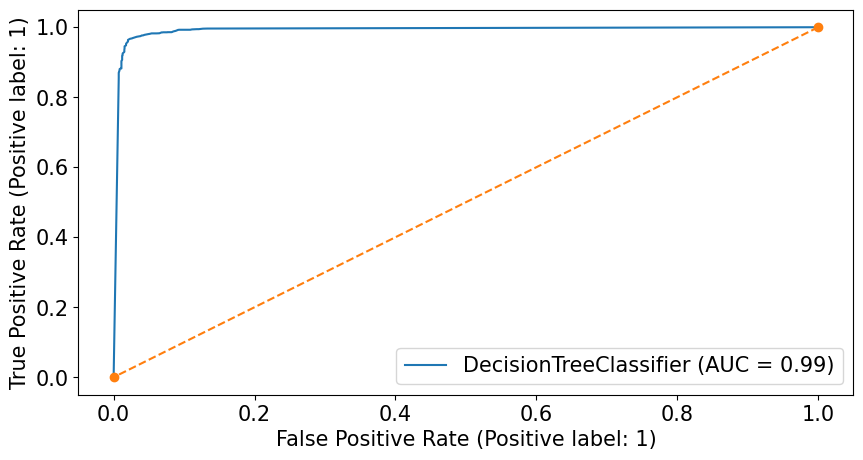

In [160]:
#check with dt
dt_df=check_metrics(dt,"dt",x_train1, X_test1, y_train1, Y_test1)

In [161]:
#print the metrics
dt_df

model_test  Accuracy  Precision   Recall      AUC  f1_score
0         dt  0.970989   0.972954 0.968923 0.970990  0.970934

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6751    5]
 [  24 6731]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          rf  0.997854   0.999258 0.996447 0.997853  0.997850


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         rf  0.976515   0.974880 0.978246 0.976515  0.976560
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2895
           1       0.97      0.98      0.98      2896

    accuracy                           0.98      5791
   macro avg       0.98      0.98      0.98      5791
weighted avg       0.98      0.98      0.98      5791



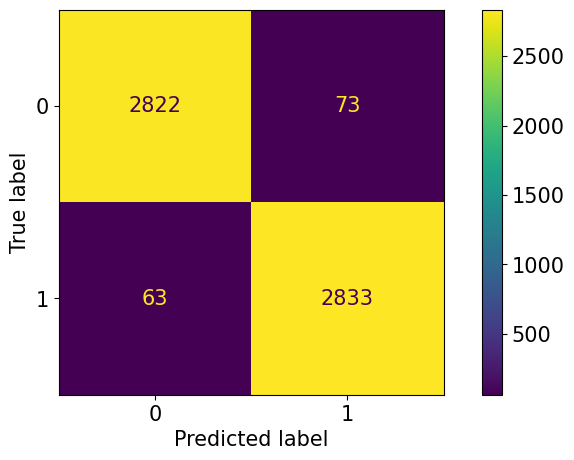

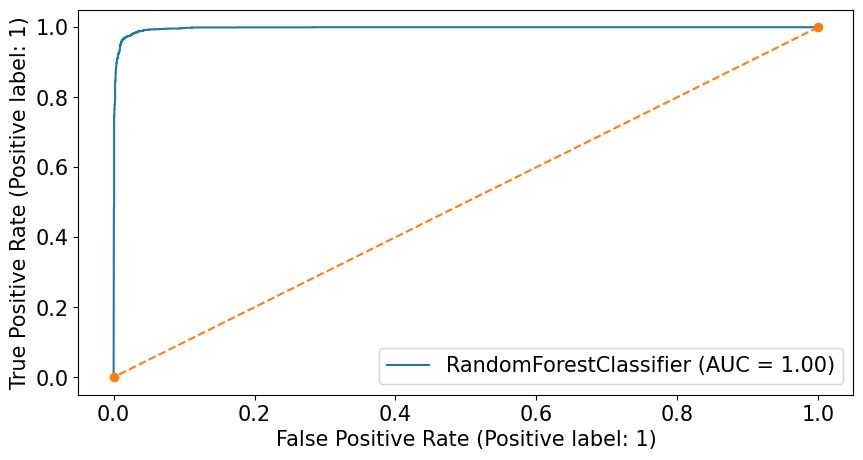

In [162]:
# check with random forrest
rf_df=check_metrics(rf,"rf",x_train1, X_test1, y_train1, Y_test1)

In [163]:
#check the metrics
rf_df

model_test  Accuracy  Precision   Recall      AUC  f1_score
0         rf  0.976515   0.974880 0.978246 0.976515  0.976560

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6665   91]
 [  49 6706]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0         xgb  0.989638   0.986612 0.992746 0.989638  0.989669


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0        xgb  0.979624   0.979296 0.979972 0.979623  0.979634
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2895
           1       0.98      0.98      0.98      2896

    accuracy                           0.98      5791
   macro avg       0.98      0.98      0.98      5791
weighted avg       0.98      0.98      0.98      5791



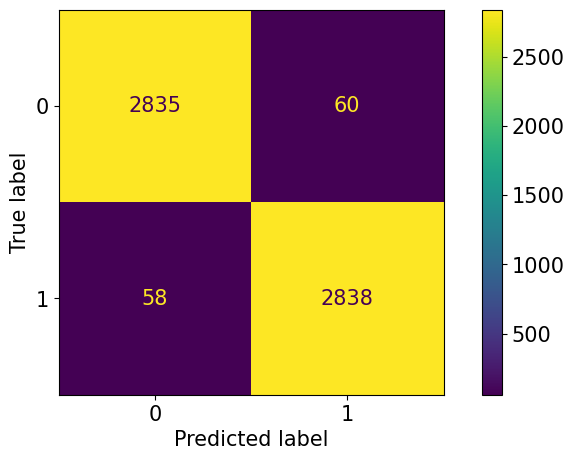

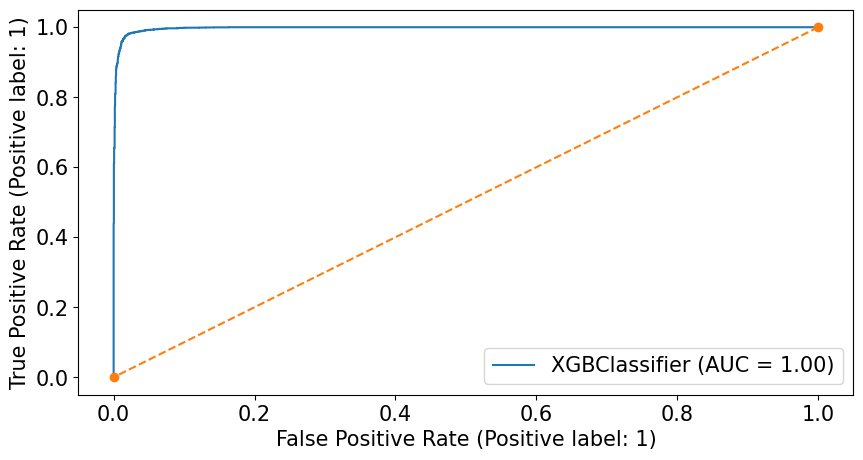

In [164]:
#check with xgb
xgb_df=check_metrics(xg,"xgb",x_train1, X_test1, y_train1, Y_test1)

In [165]:
#concat all metrics in a sma df 
manuanl_under_df=lr_df.append(dt_df).append(rf_df).append(xg_df).sort_values(["Recall", "Precision"],ascending=False)

manuanl_under_df.reset_index(drop=True)

model_test  Accuracy  Precision   Recall      AUC  f1_score
0        xgb  0.974779   0.168880 0.979620 0.977187  0.288094
1         rf  0.976515   0.974880 0.978246 0.976515  0.976560
2         dt  0.970989   0.972954 0.968923 0.970990  0.970934
3         lr  0.845277   0.901606 0.775207 0.845289  0.833643

# Here Random Forest Gave good result

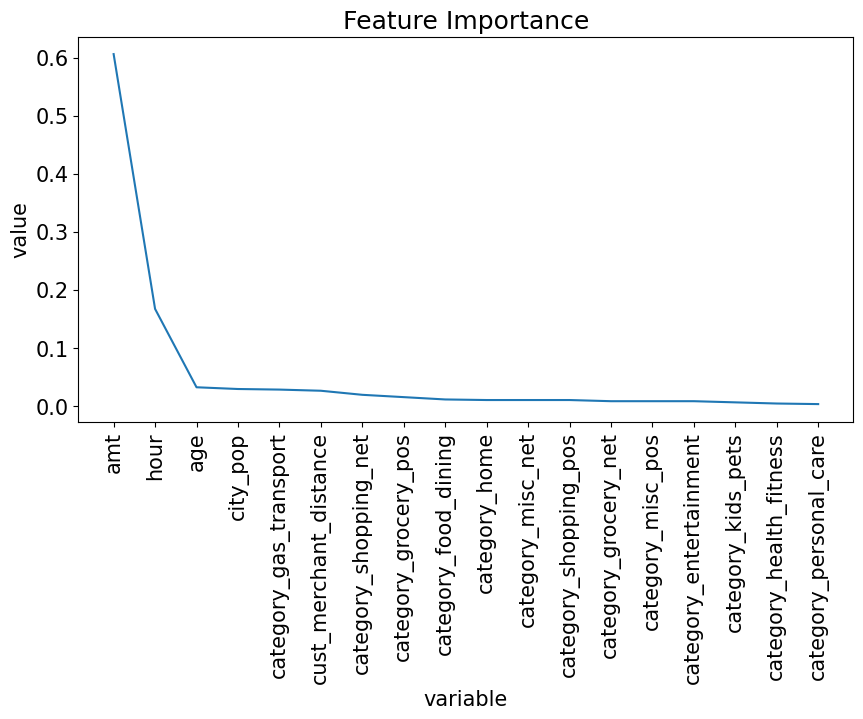

In [166]:
# Get Feature importance 

feat_imp={}
for i, x in zip(x_train1.columns, rf.feature_importances_):
    feat_imp[i]=[np.round(x,3)]
feat_inp=pd.DataFrame(feat_imp).melt() # melt the df to see row wise data
feat_inp=feat_inp.sort_values('value', ascending=False)
sns.lineplot(feat_inp["variable" ], feat_inp["value"])
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()

In [167]:
#check how many features are having 90 and 95% weight|
feat_inp.reset_index(drop=True, inplace=True)
a=feat_inp.value.cumsum()
b=feat_inp.variable
feat_inp=pd.concat([b,a],axis=1)
feat_inp

variable    value
0                       amt 0.606000
1                      hour 0.773000
2                       age 0.805000
3                  city_pop 0.834000
4    category_gas_transport 0.862000
5    cust_merchant_distance 0.888000
6     category_shopping_net 0.907000
7      category_grocery_pos 0.922000
8      category_food_dining 0.933000
9             category_home 0.943000
10        category_misc_net 0.953000
11    category_shopping_pos 0.963000
12     category_grocery_net 0.971000
13        category_misc_pos 0.979000
14   category_entertainment 0.987000
15       category_kids_pets 0.993000
16  category_health_fitness 0.997000
17   category_personal_care 1.000000

# 6 features are giving 90% of importance
#  **10 features are giving 95 % of importance**


In [168]:
#check taking 10 colls

col_1=feat_inp.variable.head(10).values

In [169]:
#define new train and test dataset with col 10
x_train10=x_train1[col_1]
X_test10=X_test1[col_1]

In [170]:
x_train10.shape

(13511, 10)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6085  671]
 [1647 5108]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          lr  0.828436   0.883890 0.756181 0.828431  0.815063


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         lr  0.845277   0.901606 0.775207 0.845289  0.833643
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2895
           1       0.90      0.78      0.83      2896

    accuracy                           0.85      5791
   macro avg       0.85      0.85      0.84      5791
weighted avg       0.85      0.85      0.84      5791



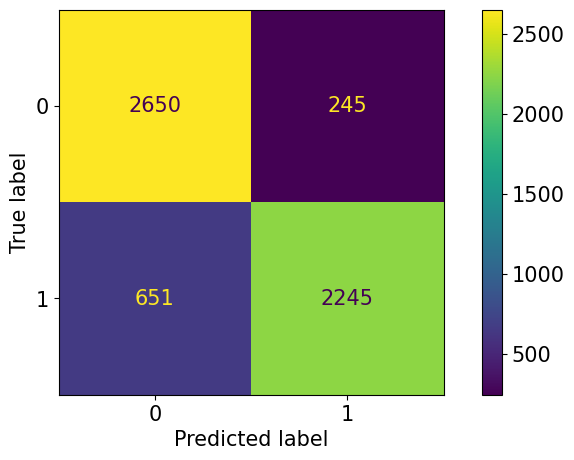

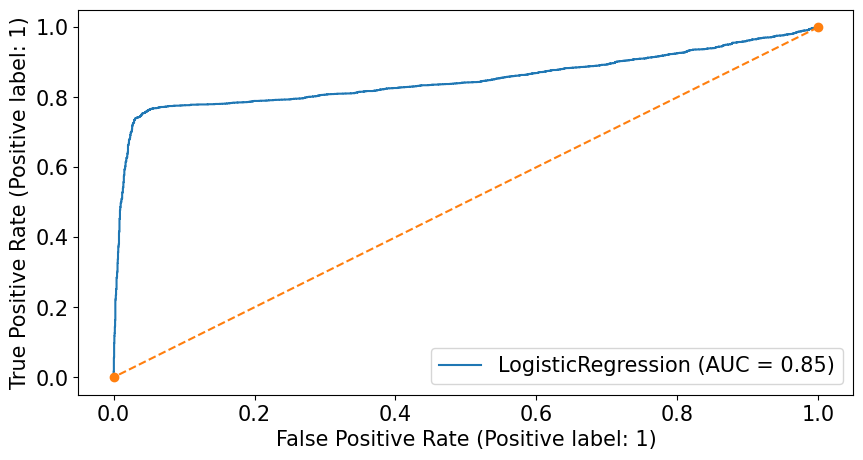

In [171]:
#check with lr
lr_df=check_metrics(lr,"lr",x_train10, X_test10, y_train1, Y_test1)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6570  186]
 [ 237 6518]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          dt  0.968692   0.972255 0.964915 0.968692  0.968571


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         dt  0.961492   0.962617 0.960290 0.961492  0.961452
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2895
           1       0.96      0.96      0.96      2896

    accuracy                           0.96      5791
   macro avg       0.96      0.96      0.96      5791
weighted avg       0.96      0.96      0.96      5791



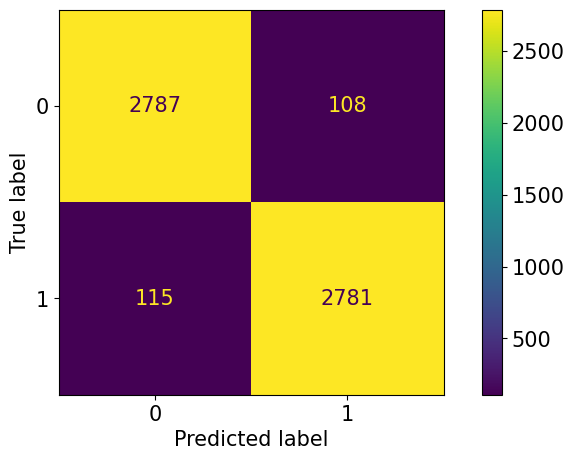

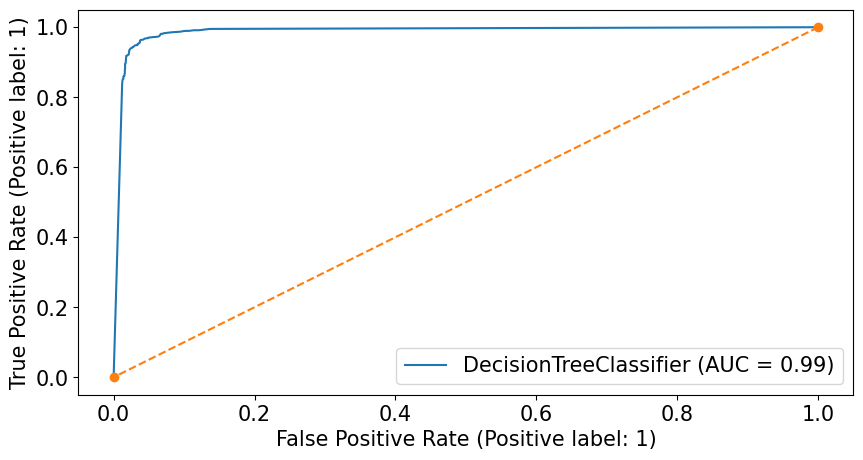

In [172]:
#check with dt
dt_df=check_metrics(dt,"dt",x_train10, X_test10, y_train1, Y_test1)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6755    1]
 [  14 6741]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          rf  0.998890   0.999852 0.997927 0.998890  0.998889


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         rf  0.969090   0.969907 0.968232 0.969090  0.969069
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2895
           1       0.97      0.97      0.97      2896

    accuracy                           0.97      5791
   macro avg       0.97      0.97      0.97      5791
weighted avg       0.97      0.97      0.97      5791



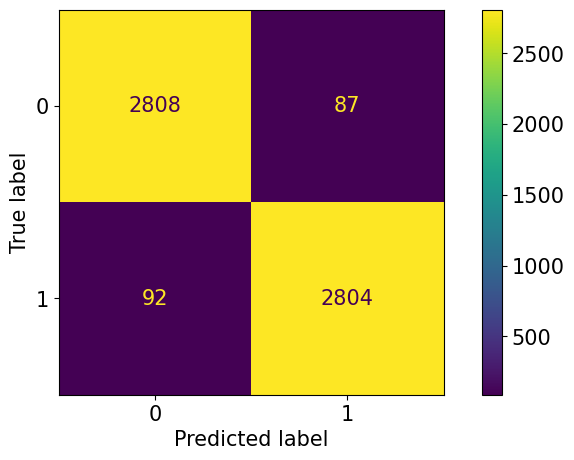

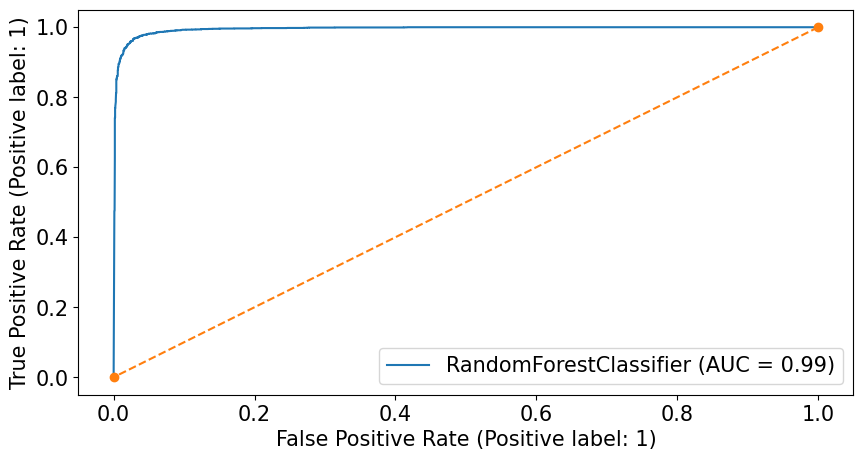

In [173]:
#check with rf
rf_df=check_metrics(rf,"rf",x_train10, X_test10, y_train1, Y_test1)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6651  105]
 [  89 6666]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0         xgb  0.985641   0.984493 0.986825 0.985641  0.985657


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0        xgb  0.968572   0.967287 0.969959 0.968572  0.968621
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2895
           1       0.97      0.97      0.97      2896

    accuracy                           0.97      5791
   macro avg       0.97      0.97      0.97      5791
weighted avg       0.97      0.97      0.97      5791



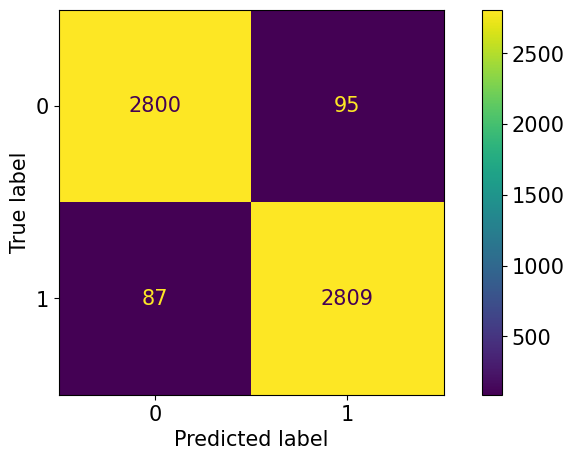

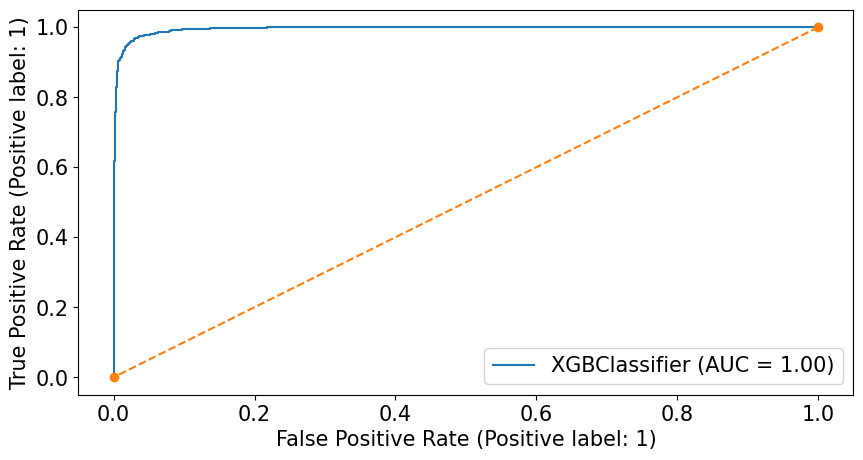

In [174]:
#check with rf
xgb_df=check_metrics(xg,"xgb",x_train10, X_test10, y_train1, Y_test1)

In [175]:
#get the metrics in one df
metric_df_col_10=lr_df.append(dt_df.append(rf_df)).append(xg_df)
metric_df_col_10.sort_values('Recall', ascending=False).reset_index(drop=True)

model_test  Accuracy  Precision   Recall      AUC  f1_score
0        xgb  0.974779   0.168880 0.979620 0.977187  0.288094
1         rf  0.969090   0.969907 0.968232 0.969090  0.969069
2         dt  0.961492   0.962617 0.960290 0.961492  0.961452
3         lr  0.845277   0.901606 0.775207 0.845289  0.833643

# check with 6 cols


In [176]:
#get importance 6 cols
col_2=feat_inp.variable.head(6).values

In [177]:
#define new train and test dataset with 6 imp cols
x_train6=x_train1[col_2]
X_test6=X_test1[col_2]

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6085  671]
 [1647 5108]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          lr  0.828436   0.883890 0.756181 0.828431  0.815063


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         lr  0.845277   0.901606 0.775207 0.845289  0.833643
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2895
           1       0.90      0.78      0.83      2896

    accuracy                           0.85      5791
   macro avg       0.85      0.85      0.84      5791
weighted avg       0.85      0.85      0.84      5791



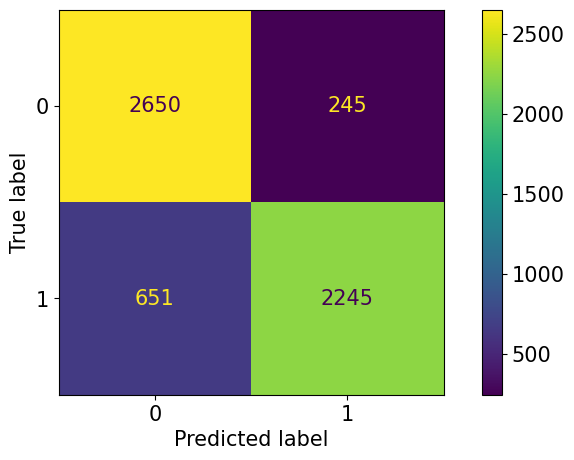

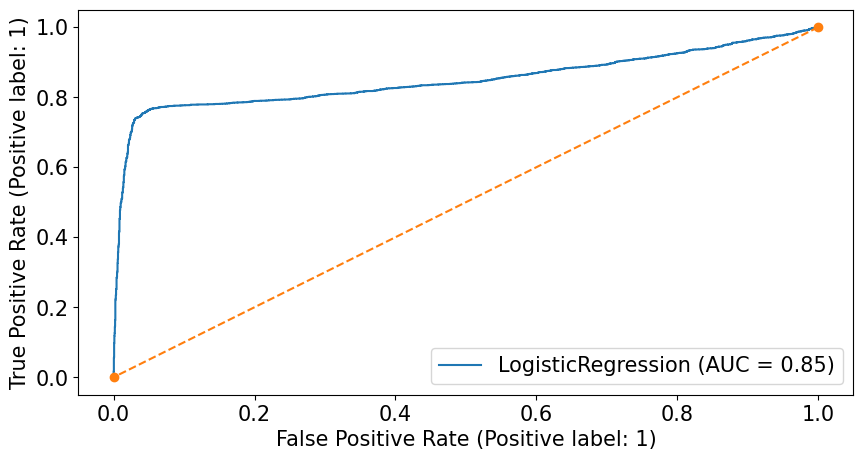

In [178]:
#check with lr
lr_df=check_metrics(lr,"lr",x_train6, X_test6, y_train1, Y_test1)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6516  240]
 [ 317 6438]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          dt  0.958774   0.964061 0.953072 0.958774  0.958535


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         dt  0.947850   0.949100 0.946478 0.947850  0.947787
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2895
           1       0.95      0.95      0.95      2896

    accuracy                           0.95      5791
   macro avg       0.95      0.95      0.95      5791
weighted avg       0.95      0.95      0.95      5791



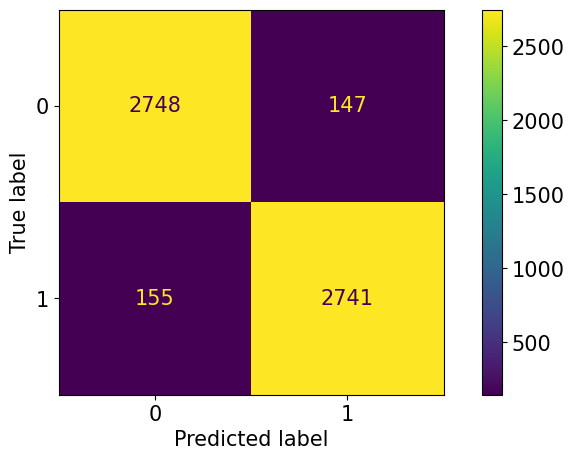

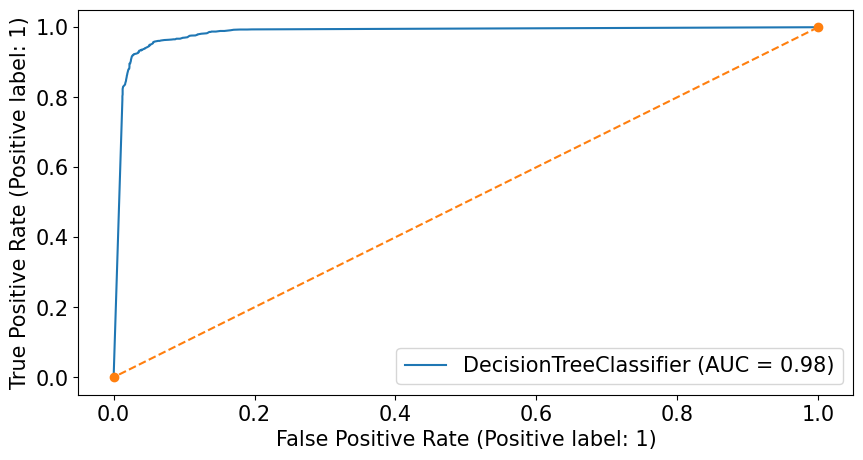

In [179]:
#check with dt
dt_df=check_metrics(dt,"dt",x_train6, X_test6, y_train1, Y_test1)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6756    0]
 [   0 6755]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          rf  1.000000   1.000000 1.000000 1.000000  1.000000


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         rf  0.954757   0.953825 0.955801 0.954757  0.954812
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2895
           1       0.95      0.96      0.95      2896

    accuracy                           0.95      5791
   macro avg       0.95      0.95      0.95      5791
weighted avg       0.95      0.95      0.95      5791



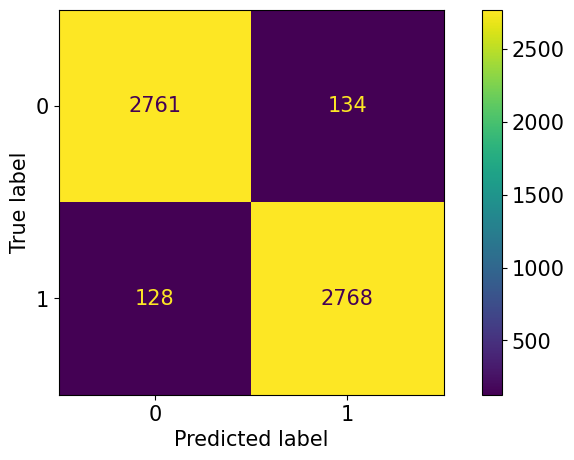

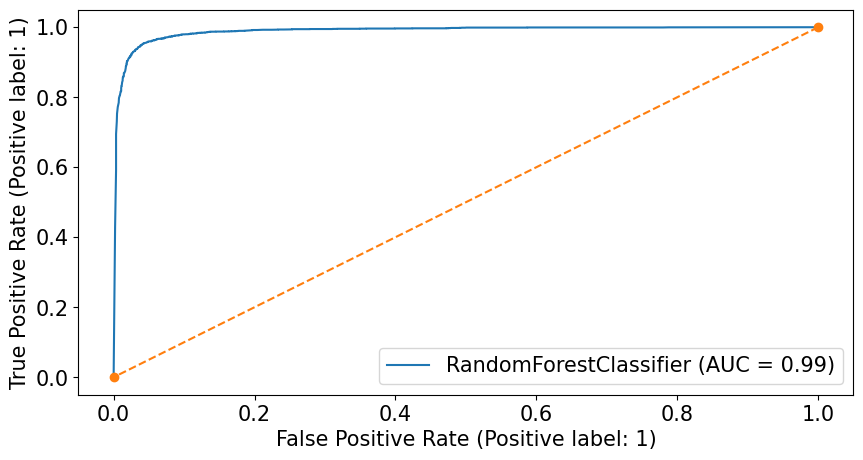

In [180]:
#check with rf
rf_df=check_metrics(rf,"rf",x_train6, X_test6, y_train1, Y_test1)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6613  143]
 [ 173 6582]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0         xgb  0.976612   0.978736 0.974389 0.976611  0.976558


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0        xgb  0.953031   0.952726 0.953384 0.953031  0.953055
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2895
           1       0.95      0.95      0.95      2896

    accuracy                           0.95      5791
   macro avg       0.95      0.95      0.95      5791
weighted avg       0.95      0.95      0.95      5791



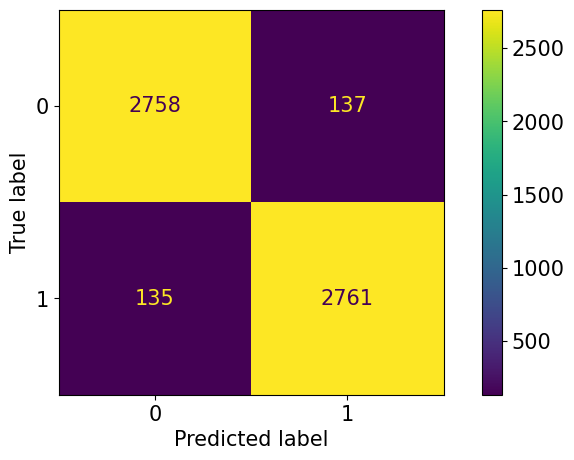

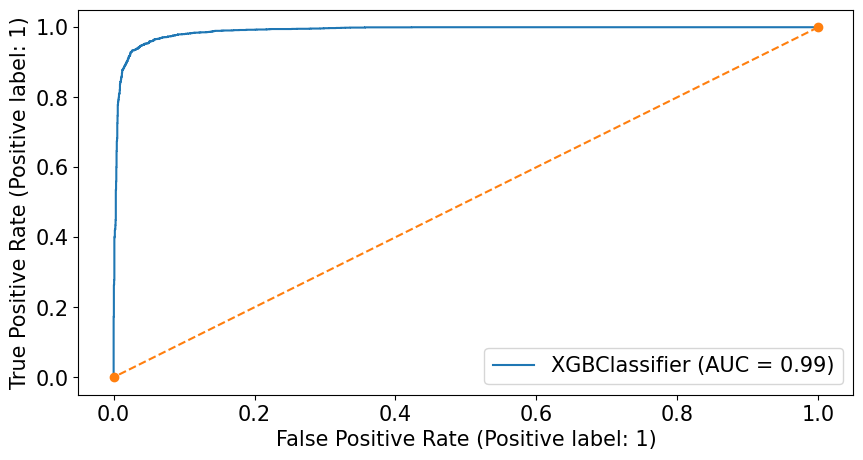

In [181]:
#check with rf
xg_df=check_metrics(xg,"xgb",x_train6, X_test6, y_train1, Y_test1)

In [182]:
#get the metrics in same df
metric_df_col_6=lr_df.append(dt_df.append(rf_df)).append(xgb_df)
metric_df_col_6.sort_values('Recall', ascending=False)

model_test  Accuracy  Precision   Recall      AUC  f1_score
0        xgb  0.968572   0.967287 0.969959 0.968572  0.968621
0         rf  0.954757   0.953825 0.955801 0.954757  0.954812
0         dt  0.947850   0.949100 0.946478 0.947850  0.947787
0         lr  0.845277   0.901606 0.775207 0.845289  0.833643

# It seems The XGB & RF are the best Model to Proceed with

# And Manual under sampler worked best with XGB and RF models




# Lets Hyper tune with RF and XGB parameters  

# Model HyperTuning For RandomForest

In [183]:
# get params for param_distributions
parma_rf={"n_estimators":[100,150,200],
         "max_depth":[2,3,5,10,20,25], "min_samples_split":[2,6,10,20,30],"min_samples_leaf":[10,15,20,30,40,50],
          
          
         }

# Taken Recall as Scoring 

##### recall=tp/(tp+fp)

# Here in fruad case, false positive should be very very minmal and true positive shoud be maximum

### Same time we need to balance of Precision 



In [184]:
#RandomizedSearchCV

rs=RandomizedSearchCV(estimator=rf, param_distributions=parma_rf, return_train_score=True,
                      verbose=True, n_jobs=-1,n_iter=10, random_state=45,
                     cv=5,scoring="recall" )

In [185]:
%%time
#to perform with less time use 6 coumns of train set by fiting the same in random search
rs.fit(x_train6, y_train1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 21.9 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=20,
                                                    random_state=45),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 20, 25],
                                        'min_samples_leaf': [10, 15, 20, 30, 40,
                                                             50],
                                        'min_samples_split': [2, 6, 10, 20, 30],
                                        'n_estimators': [100, 150, 200]},
                   random_state=45, return_train_score=True, scoring='recall',
                   verbose=True)

In [186]:
# get the best score
rs.best_score_

0.9413767579570689

In [187]:
# get the best estimator
rs.best_estimator_


RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=30,
                       random_state=45)

In [188]:
# creat the df of result
rs_df=pd.DataFrame(rs.cv_results_)

In [189]:
# check the head
rs_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.630151      0.024666         0.045432        0.008578   
1       0.943147      0.040669         0.039103        0.006663   
2       0.994638      0.046543         0.055378        0.007003   
3       1.067027      0.069798         0.052460        0.005521   
4       1.961455      0.049809         0.093025        0.014333   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                150                       2                     40   
1                100                       6                     20   
2                200                      10                     20   
3                100                      30                     10   
4                200                       6                     20   

  param_max_depth                                             params  \
0               2  {'n_estimators': 150, 'min_samples_split': 2, ...   
1              10  {'n_estimators': 100, 'min_samples_split': 6, ...   
2               3  {'n_estimators': 200, 'min_samples_split': 10,...   
3              10  {'n_estimators': 100, 'min_samples_split': 30,...   
4              20  {'n_estimators': 200, 'min_samples_split': 6, ...   

   split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.766839  ...         0.769504        0.008408                9   
1           0.930422  ...         0.936343        0.007903                4   
2           0.855662  ...         0.868690        0.013246                7   
3           0.935603  ...         0.941377        0.005910                1   
4           0.931902  ...         0.937528        0.004923                3   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.771281            0.778312            0.761658   
1            0.942265            0.947446            0.947446   
2            0.859548            0.878053            0.874537   
3            0.951702            0.950962            0.952073   
4            0.945966            0.948742            0.947261   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.771651            0.765174          0.769615         0.005755  
1            0.945411            0.948187          0.946151         0.002152  
2            0.888971            0.861029          0.872428         0.011005  
3            0.951332            0.950592          0.951332         0.000523  
4            0.948557            0.948001          0.947705         0.001011  

[5 rows x 24 columns]

In [190]:
# see the columns
rs_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_depth', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [191]:
#get required columns
rs_col=["param_n_estimators","param_min_samples_split", "param_min_samples_leaf",'param_max_depth', "mean_test_score",
      "mean_train_score" ]

In [192]:
#make customized df
rs_df=rs_df[rs_col]
rs_df

param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                150                       2                     40   
1                100                       6                     20   
2                200                      10                     20   
3                100                      30                     10   
4                200                       6                     20   
5                100                      20                     15   
6                200                       2                     15   
7                200                      30                     50   
8                200                      20                     20   
9                150                       6                     40   

  param_max_depth  mean_test_score  mean_train_score  
0               2         0.769504          0.769615  
1              10         0.936343          0.946151  
2               3         0.868690          0.872428  
3              10         0.941377          0.951332  
4              20         0.937528          0.947705  
5              25         0.940192          0.950407  
6               5         0.912065          0.915174  
7              25         0.917395          0.926869  
8               3         0.868690          0.872428  
9               2         0.769504          0.769615

#### Check the parameter vs the test result

<AxesSubplot:xlabel='param_min_samples_split'>

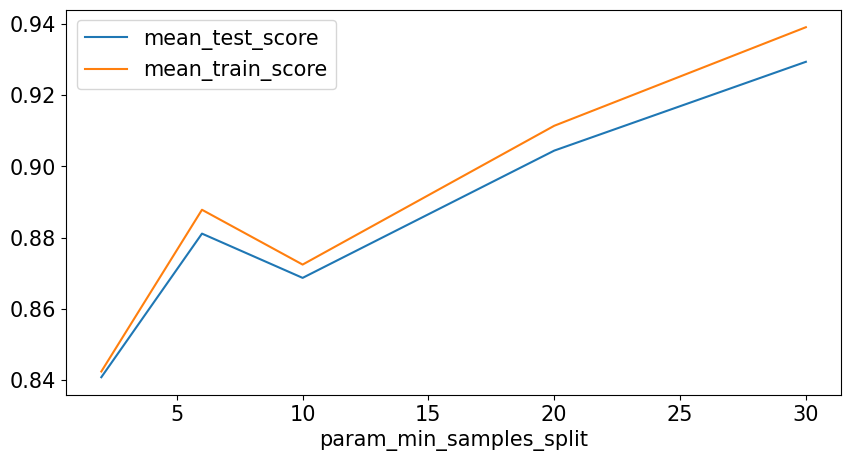

In [193]:
#min_samples vs score
rs_df.groupby("param_min_samples_split")["mean_test_score","mean_train_score"].mean().plot()

# we need to increase the min_sample_split

<AxesSubplot:xlabel='param_n_estimators'>

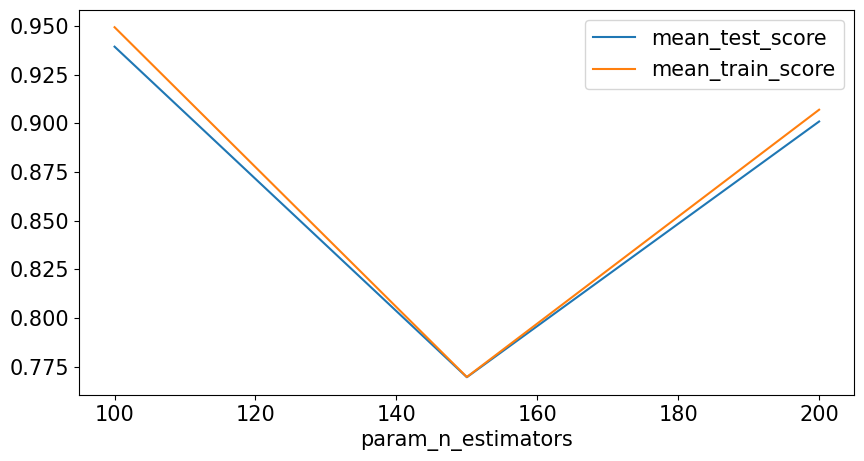

In [194]:
#check numbers of trees
rs_df.groupby("param_n_estimators")["mean_test_score","mean_train_score"].mean().plot()

# Need of hypertuning again the trees

<AxesSubplot:xlabel='param_min_samples_leaf'>

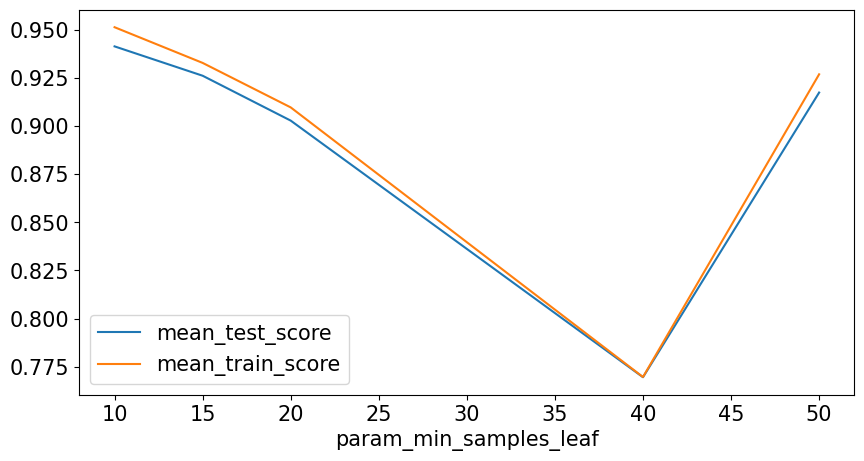

In [195]:
#min_sample_leaf vs score
rs_df.groupby("param_min_samples_leaf")["mean_test_score","mean_train_score"].mean().plot()

# need to hypertune min_samples_leaf

<AxesSubplot:xlabel='param_max_depth'>

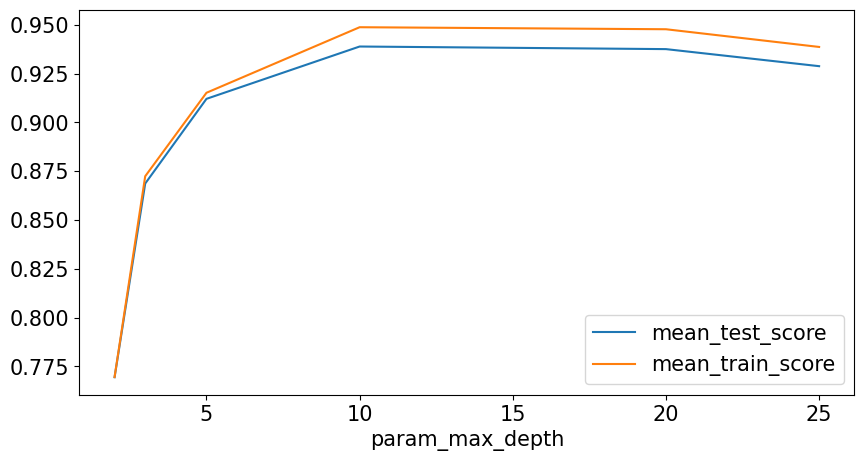

In [196]:
rs_df.groupby("param_max_depth")["mean_test_score","mean_train_score"].mean().plot()

# Need to hyper tune the max_depth

In [197]:
#customize the parameters again
parma_rf1={"n_estimators":[250,300,400,500],
         "max_depth":[50,80,90,100], "min_samples_split":[30,50,70,90,110,140,150,170,200,250,300],"min_samples_leaf":[1,2,3,4,50,80,100,150,200],
          
          
         }

In [198]:
#RandomizedSearchCV_2
rs1=RandomizedSearchCV(estimator=rf, param_distributions=parma_rf1, return_train_score=True,
                      verbose=True, n_jobs=-1,n_iter=10, random_state=45,
                     cv=5,scoring="recall" )

In [199]:
# fit the train and test

rs1.fit(x_train6, y_train1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=20,
                                                    random_state=45),
                   n_jobs=-1,
                   param_distributions={'max_depth': [50, 80, 90, 100],
                                        'min_samples_leaf': [1, 2, 3, 4, 50, 80,
                                                             100, 150, 200],
                                        'min_samples_split': [30, 50, 70, 90,
                                                              110, 140, 150,
                                                              170, 200, 250,
                                                              300],
                                        'n_estimators': [250, 300, 400, 500]},
                   random_state=45, return_train_score=True, scoring='recall',
                   verbose=True)

In [200]:
#best score
rs1.best_score_

0.9416728349370835

In [201]:
#best params
rs1.best_estimator_

RandomForestClassifier(max_depth=80, min_samples_split=30, n_estimators=400,
                       random_state=45)

In [202]:
#creation of result's df
hyper_tune2=pd.DataFrame(rs1.cv_results_)

In [203]:
hyper_tune2=hyper_tune2[rs_col].sort_values("mean_test_score", ascending=False)
hyper_tune2

param_n_estimators param_min_samples_split param_min_samples_leaf  \
9                400                      30                      1   
7                500                      90                      1   
1                400                     110                      1   
4                500                     170                      4   
0                500                      30                     50   
8                300                      50                     50   
5                250                      70                     50   
3                500                     200                     50   
6                300                     150                    200   
2                250                     170                    200   

  param_max_depth  mean_test_score  mean_train_score  
9              80         0.941673          0.958031  
7              50         0.930126          0.941636  
1              80         0.925685          0.935825  
4              50         0.918135          0.925315  
0              90         0.917839          0.926832  
8              80         0.917839          0.926980  
5              80         0.916358          0.926018  
3              80         0.910733          0.916025  
6              50         0.902443          0.903627  
2             100         0.902147          0.903775

<AxesSubplot:xlabel='param_n_estimators'>

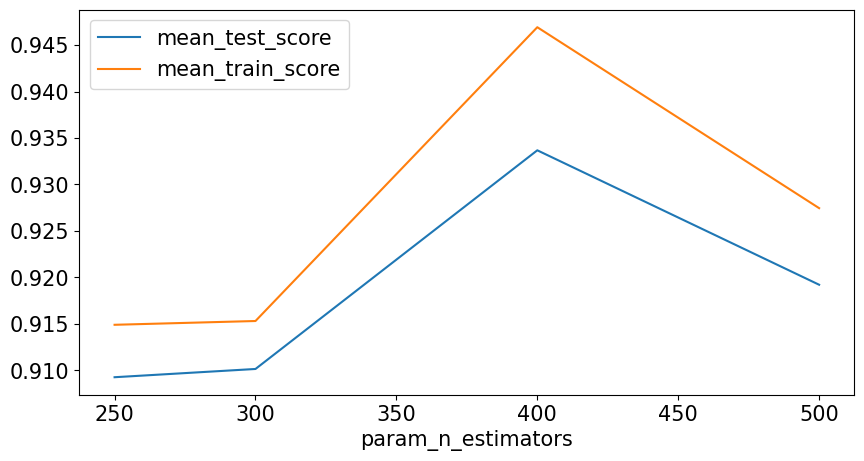

In [204]:
#check again the parameters vs score one by one
# max tree 400 is best
hyper_tune2.groupby("param_n_estimators")["mean_test_score","mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_min_samples_split'>

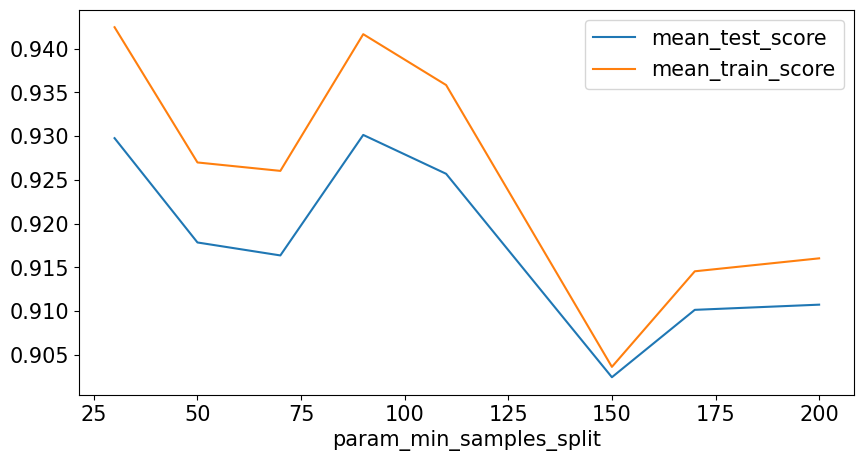

In [205]:
#need to again tune min_smaple_split
hyper_tune2.groupby("param_min_samples_split")["mean_test_score","mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_min_samples_leaf'>

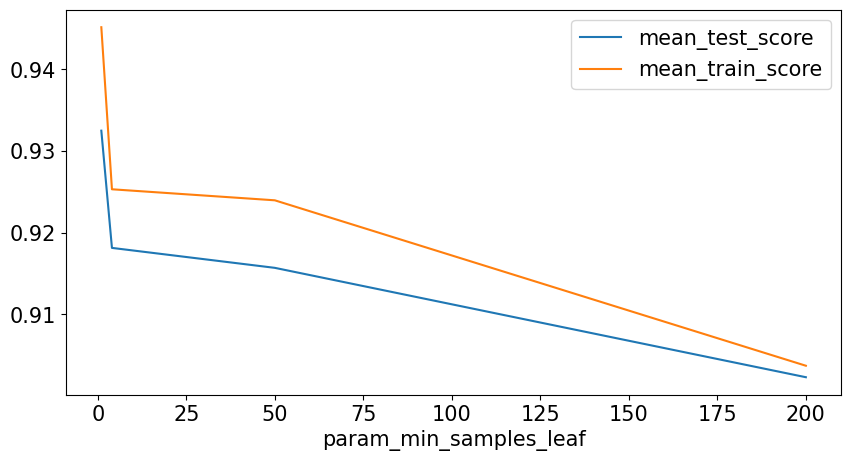

In [206]:
#min sample leaf would be best with 1
hyper_tune2.groupby("param_min_samples_leaf")["mean_test_score","mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_max_depth'>

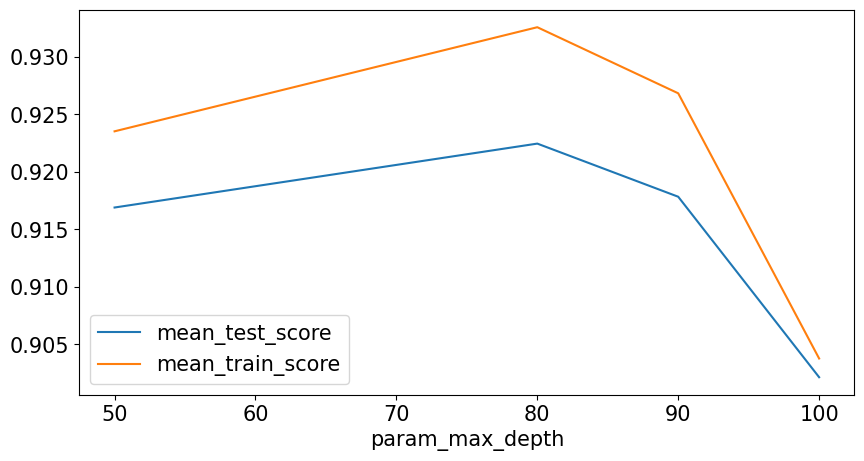

In [207]:
#max depth should be 80
hyper_tune2.groupby("param_max_depth")["mean_test_score","mean_train_score"].mean().plot()

In [208]:
# make the final tune
parma_rf2={"n_estimators":[100,200, 300,400],
         "max_depth":[10,80], "min_samples_split":[10,20,30,75,85],"min_samples_leaf":[1,2,3,4],
          "random_state":[9,18,45,54,99,999]
          
         }

In [209]:
# get the final RandomizedSearchCV 

rs2=RandomizedSearchCV(estimator=rf, param_distributions=parma_rf2, return_train_score=True,
                      verbose=True, n_jobs=-1,n_iter=10, random_state=45,
                     cv=5,scoring="recall" )

rs2.fit(x_train6, y_train1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=20,
                                                    random_state=45),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 80],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [10, 20, 30, 75,
                                                              85],
                                        'n_estimators': [100, 200, 300, 400],
                                        'random_state': [9, 18, 45, 54, 99,
                                                         999]},
                   random_state=45, return_train_score=True, scoring='recall',
                   verbose=True)

In [210]:
# best score
rs2.best_score_

0.9407846039970392

In [211]:
#best estimators
rs2.best_estimator_

RandomForestClassifier(max_depth=80, min_samples_leaf=3, min_samples_split=30,
                       n_estimators=300, random_state=999)

In [212]:
#creation of result's df
hyper_tune3=pd.DataFrame(rs2.cv_results_)

In [213]:
rs_col=["param_n_estimators","param_min_samples_split", "param_min_samples_leaf",'param_max_depth', "mean_test_score",
      "mean_train_score" ,"param_random_state"]
hyper_tune3=hyper_tune3[rs_col].sort_values("mean_test_score", ascending=False)
hyper_tune3=hyper_tune3.iloc[:,0:]
hyper_tune3

param_n_estimators param_min_samples_split param_min_samples_leaf  \
1                300                      30                      3   
8                400                      10                      3   
6                400                      20                      4   
9                100                      30                      4   
7                300                      75                      4   
3                300                      75                      4   
4                400                      75                      2   
2                100                      85                      1   
5                400                      85                      2   
0                400                      85                      4   

  param_max_depth  mean_test_score  mean_train_score param_random_state  
1              80         0.940785          0.957069                999  
8              10         0.940785          0.955885                 45  
6              10         0.940637          0.953331                 45  
9              10         0.938712          0.952184                 99  
7              80         0.934863          0.944523                 54  
3              80         0.932939          0.943338                999  
4              10         0.932939          0.943301                 45  
2              10         0.932791          0.941895                  9  
5              80         0.930718          0.941784                999  
0              10         0.928942          0.938601                 45

<AxesSubplot:xlabel='param_n_estimators'>

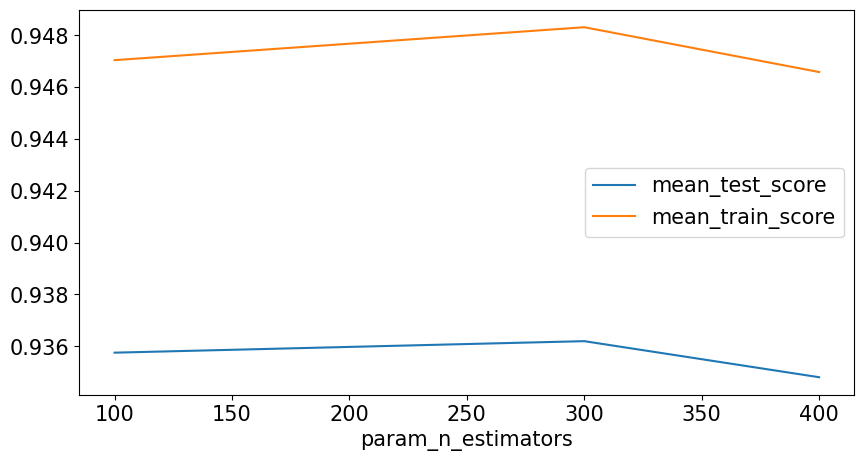

In [214]:
#n_estimator should be 400
hyper_tune3.groupby("param_n_estimators")["mean_test_score","mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_min_samples_split'>

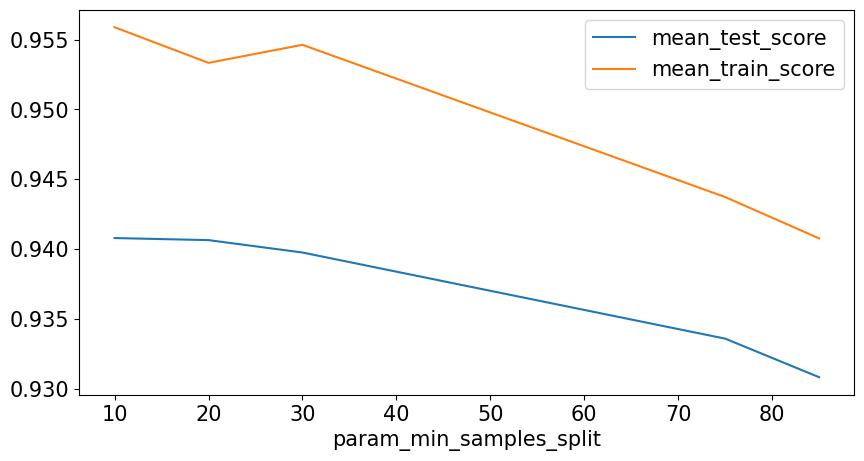

In [215]:
#min sample split should be 30 as per best estimator
hyper_tune3.groupby("param_min_samples_split")["mean_test_score","mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_min_samples_leaf'>

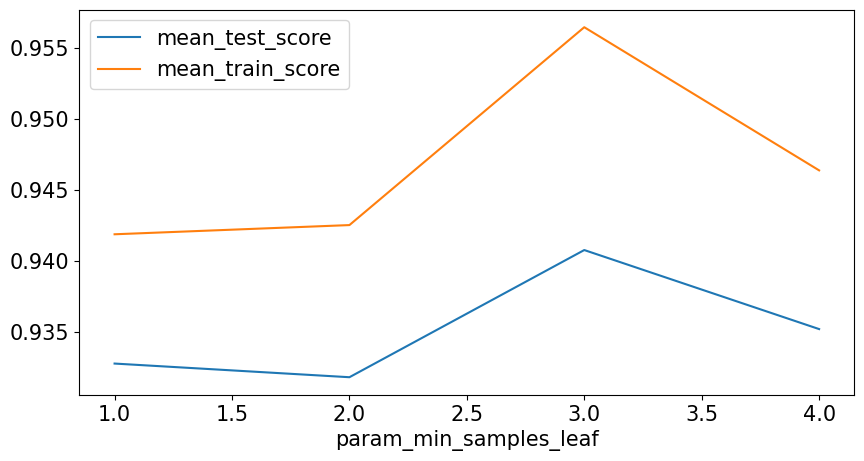

In [216]:
#min sample leaf should be 1
hyper_tune3.groupby("param_min_samples_leaf")["mean_test_score","mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_max_depth'>

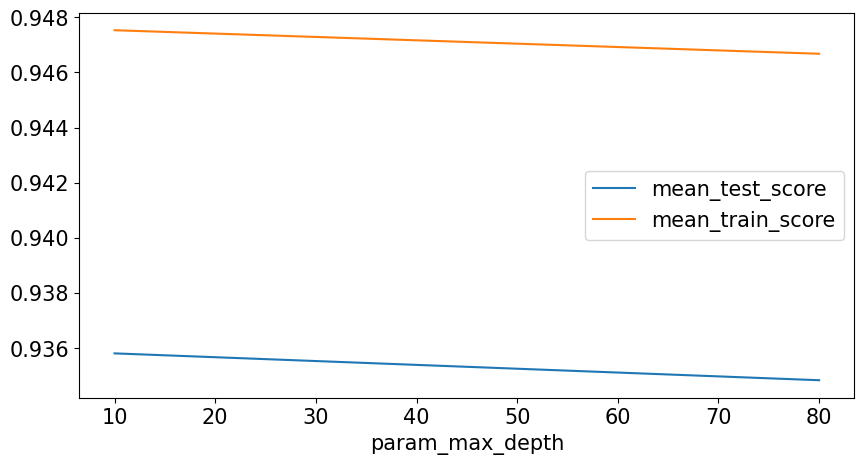

In [217]:
#max depth should be 80 as per previous hyper tune 
hyper_tune3.groupby("param_max_depth")["mean_test_score","mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_random_state'>

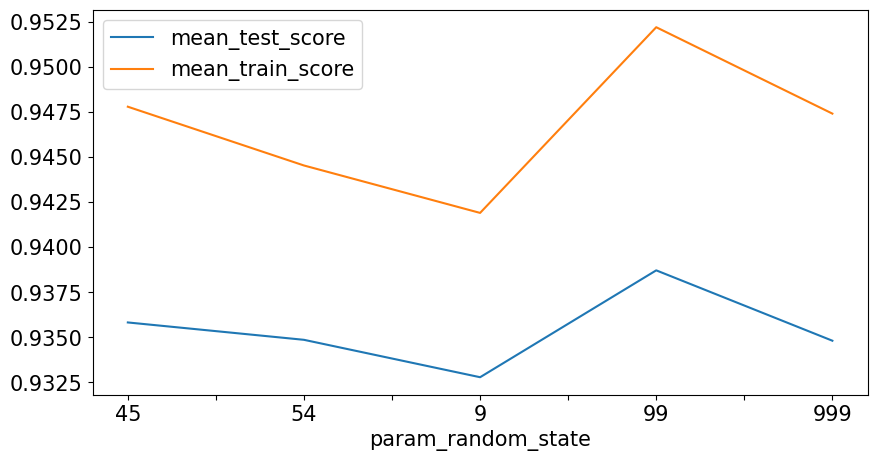

In [218]:
#max depth should be 80 as per previous hyper tune 
hyper_tune3.param_random_state=hyper_tune3.param_random_state.astype('str')
hyper_tune3.groupby(by=["param_random_state"])["mean_test_score","mean_train_score"].mean().plot()

In [219]:
rs2.best_estimator_

RandomForestClassifier(max_depth=80, min_samples_leaf=3, min_samples_split=30,
                       n_estimators=300, random_state=999)

In [220]:
#make the final rf model from the upper hypertuning understading
rf_final=RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=400, min_samples_leaf=30, random_state=99)

In [221]:
#fit train and test
rf_final.fit(x_train6, y_train1)

RandomForestClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=4,
                       n_estimators=400, random_state=99)

In [222]:
# get the pred for train has 6 cols
y_pred_final_test6=rf_final.predict(X_test6)

In [223]:
#classification model for x_train6
print(Fore.BLUE+f"{classification_report(Y_test1, y_pred_final_test6)}")

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2895
           1       0.95      0.95      0.95      2896

    accuracy                           0.95      5791
   macro avg       0.95      0.95      0.95      5791
weighted avg       0.95      0.95      0.95      5791



In [224]:

roc_auc_score(Y_test1, y_pred_final_test6)

0.9469866721056498

# ROC_AUC curve for 6 features== 95%

In [225]:
rf_final.fit(x_train10, y_train1)

RandomForestClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=4,
                       n_estimators=400, random_state=99)

In [226]:
y_pred_final_test10=rf_final.predict(X_test10)

In [227]:
print(Fore.BLUE+f"{classification_report(Y_test1, y_pred_final_test10)}")

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2895
           1       0.96      0.96      0.96      2896

    accuracy                           0.96      5791
   macro avg       0.96      0.96      0.96      5791
weighted avg       0.96      0.96      0.96      5791



In [228]:
confusion_matrix(Y_test1, y_pred_final_test10)

array([[2783,  112],
       [ 119, 2777]], dtype=int64)

# check the roc curve for 10 features

### auc== 96%

In [229]:
roc_auc_score(Y_test1, y_pred_final_test10)

0.9601107238618689

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6500  256]
 [ 329 6426]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          rf  0.956702   0.961688 0.951295 0.956702  0.956463


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         rf  0.960111   0.961232 0.958909 0.960111  0.960069
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2895
           1       0.96      0.96      0.96      2896

    accuracy                           0.96      5791
   macro avg       0.96      0.96      0.96      5791
weighted avg       0.96      0.96      0.96      5791



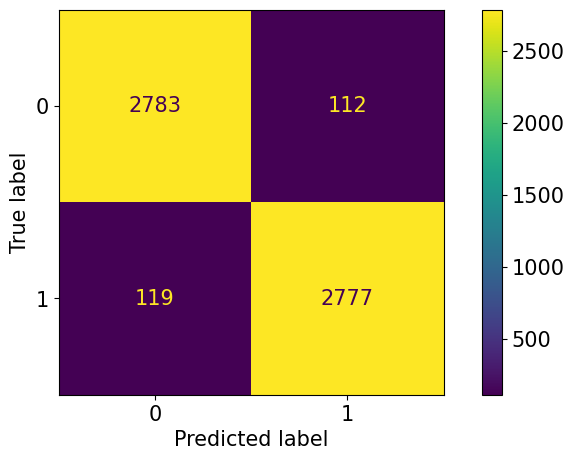

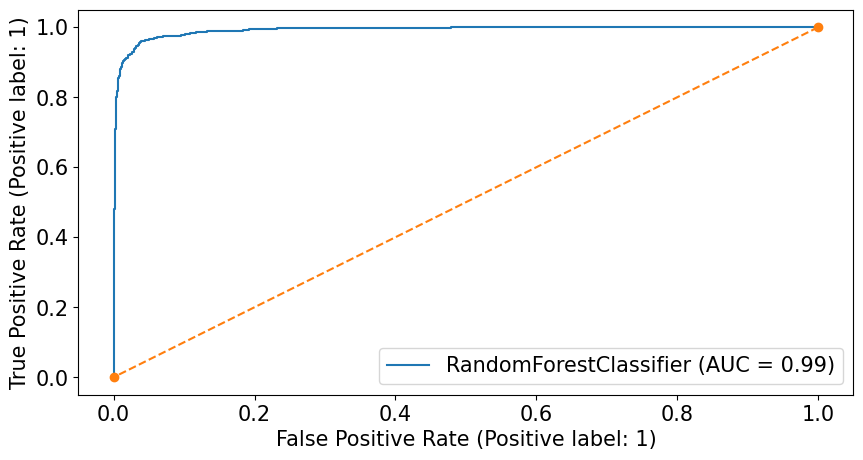

In [230]:

rf_first_df=check_metrics(rf_final,"rf",x_train10, X_test10, y_train1, Y_test1 )

In [231]:
rf_first_df

model_test  Accuracy  Precision   Recall      AUC  f1_score
0         rf  0.960111   0.961232 0.958909 0.960111  0.960069

# The model is good with Recall 96%, Precision with 97%, Accuracy with 96% & Auc with 96%

### But even with 96% recall we can't depend as 4% people may get victimized with fraud which should be taken care off

# Lets do hyper tune for xgb with multi metrics 

In [232]:
par_xg1={"n_estimators":[20,30,90,100,150]}

#define scoring metrics 
sc={"recall":'recall', "precision":make_scorer(precision_score)}

xg_ran=RandomizedSearchCV(XGBClassifier(), param_distributions=par_xg1, return_train_score=True,
                      verbose=True, n_jobs=-1,n_iter=10, random_state=45,
                     cv=5,scoring=sc , refit=False)

In [233]:
xg_ran.fit(x_train6, y_train1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'n_estimators': [20, 30, 90, 100, 150]},
                   random_state=45, refit=False, return_train_score=True,
                   scoring={'precision': make_scorer(precision_score),
                            'recall': 'recall'},
                   verbose=True)

In [234]:
xg_re=pd.DataFrame(xg_ran.cv_results_)
xg_re

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.211642      0.011091         0.006715        0.006029   
1       0.287112      0.007935         0.003124        0.006248   
2       0.893686      0.077374         0.014427        0.009243   
3       1.064612      0.023836         0.014826        0.000745   
4       1.455551      0.048075         0.017592        0.002510   

  param_n_estimators                 params  split0_test_recall  \
0                 20   {'n_estimators': 20}            0.943005   
1                 30   {'n_estimators': 30}            0.943745   
2                 90   {'n_estimators': 90}            0.938564   
3                100  {'n_estimators': 100}            0.936343   
4                150  {'n_estimators': 150}            0.939304   

   split1_test_recall  split2_test_recall  split3_test_recall  ...  \
0            0.942265            0.956329            0.936343  ...   
1            0.945226            0.956329            0.937084  ...   
2            0.943745            0.959289            0.935603  ...   
3            0.943005            0.953368            0.937084  ...   
4            0.944486            0.953368            0.937084  ...   

   mean_test_precision  std_test_precision  rank_test_precision  \
0             0.946188            0.002808                    3   
1             0.946675            0.003538                    2   
2             0.947101            0.005036                    1   
3             0.945189            0.005901                    5   
4             0.945665            0.006215                    4   

   split0_train_precision  split1_train_precision  split2_train_precision  \
0                0.968686                0.966004                0.965472   
1                0.974426                0.973978                0.973635   
2                0.993878                0.993887                0.993326   
3                0.995365                0.995185                0.993887   
4                0.998705                0.999074                0.999075   

   split3_train_precision  split4_train_precision  mean_train_precision  \
0                0.962261                0.965255              0.965535   
1                0.971125                0.969416              0.972516   
2                0.992779                0.991493              0.993072   
3                0.994997                0.992976              0.994482   
4                0.998890                0.998151              0.998779   

   std_train_precision  
0             0.002047  
1             0.001928  
2             0.000890  
3             0.000912  
4             0.000343  

[5 rows x 36 columns]

In [235]:
xg_re=xg_re[["param_n_estimators","mean_test_precision", "mean_train_precision", "mean_test_recall","mean_train_recall", "rank_test_recall" ]]

In [236]:
xg_re.sort_values("rank_test_recall")

param_n_estimators  mean_test_precision  mean_train_precision  \
1                 30             0.946675              0.972516   
2                 90             0.947101              0.993072   
0                 20             0.946188              0.965535   
4                150             0.945665              0.998779   
3                100             0.945189              0.994482   

   mean_test_recall  mean_train_recall  rank_test_recall  
1          0.945522           0.966321                 1  
2          0.945078           0.991969                 2  
0          0.944486           0.958919                 3  
4          0.944338           0.999075                 4  
3          0.943449           0.993708                 5

<AxesSubplot:xlabel='param_n_estimators'>

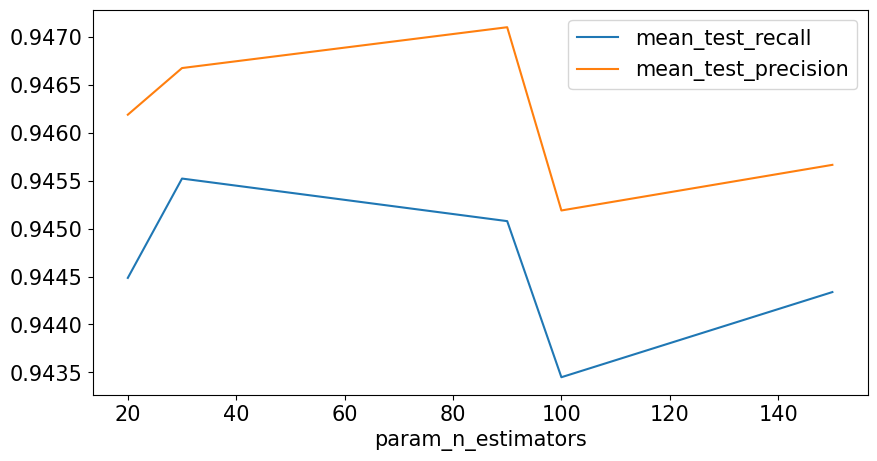

In [237]:
xg_re.groupby("param_n_estimators")["mean_test_recall", "mean_test_precision"].mean().plot()

# It seems XGB could not able to do better than the previous RF model 

# Lets dervie some more features

In [238]:
#get a copy of the inp1 as inp2
inp2=inp1.copy()
inp2["value_1"]=1 # add a count col

In [239]:
#check the head 
inp2.head()

trans_date_trans_time            cc_num                    merchant  \
0   2019-01-01 00:00:18  2703186189652095  fraud_Rippin, Kub and Mann   

       amt  city_pop                        job  \
0 4.970000      3495  Psychologist, counselling   

                          trans_num  is_fraud  age  cust_merchant_distance  \
0  0b242abb623afc578575680df30655b9         0   31               78.597496   

   ...  category_grocery_pos  category_health_fitness  category_home  \
0  ...                     0                        0              0   

   category_kids_pets category_misc_net category_misc_pos  \
0                   0                 1                 0   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   

   value_1  
0        1  

[1 rows x 37 columns]

In [240]:
# makle the time col as index 
inp2.index=pd.to_datetime(inp2["trans_date_trans_time"])  
inp2=inp2.rename_axis(index={'trans_date_trans_time': 'time_index'})# rename the index
inp2.sort_index(inplace=True)#sort the index

In [241]:
inp2.head(5)

trans_date_trans_time            cc_num  \
time_index                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant        amt  city_pop  \
time_index                                                                     
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann   4.970000      3495   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme 107.230003       149   
2019-01-01 00:00:51                fraud_Lind-Buckridge 220.110001      4154   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  45.000000      1939   
2019-01-01 00:03:06                 fraud_Keeling-Crist  41.959999        99   

                                                   job  \
time_index                                               
2019-01-01 00:00:18          Psychologist, counselling   
2019-01-01 00:00:44  Special educational needs teacher   
2019-01-01 00:00:51        Nature conservation officer   
2019-01-01 00:01:16                    Patent attorney   
2019-01-01 00:03:06     Dance movement psychotherapist   

                                            trans_num  is_fraud  age  \
time_index                                                             
2019-01-01 00:00:18  0b242abb623afc578575680df30655b9         0   31   
2019-01-01 00:00:44  1f76529f8574734946361c461b024d99         0   41   
2019-01-01 00:00:51  a1a22d70485983eac12b5b88dad1cf95         0   57   
2019-01-01 00:01:16  6b849c168bdad6f867558c3793159a81         0   52   
2019-01-01 00:03:06  a41d7549acf90789359a9aa5346dcb46         0   33   

                     cust_merchant_distance  ...  category_grocery_pos  \
time_index                                   ...                         
2019-01-01 00:00:18               78.597496  ...                     0   
2019-01-01 00:00:44               30.212231  ...                     1   
2019-01-01 00:00:51              108.206093  ...                     0   
2019-01-01 00:01:16               95.673828  ...                     0   
2019-01-01 00:03:06               77.556351  ...                     0   

                     category_health_fitness  category_home  \
time_index                                                    
2019-01-01 00:00:18                        0              0   
2019-01-01 00:00:44                        0              0   
2019-01-01 00:00:51                        0              0   
2019-01-01 00:01:16                        0              0   
2019-01-01 00:03:06                        0              0   

                     category_kids_pets category_misc_net category_misc_pos  \
time_index                                                                    
2019-01-01 00:00:18                   0                 1                 0   
2019-01-01 00:00:44                   0                 0                 0   
2019-01-01 00:00:51                   0                 0                 0   
2019-01-01 00:01:16                   0                 0                 0   
2019-01-01 00:03:06                   0                 0                 1   

                     category_personal_care  category_shopping_net  \
time_index                                                           
2019-01-01 00:00:18                       0                      0   
2019-01-01 00:00:44                       0                      0   
2019-01-01 00:00:51                       0                      0   
2019-01-01 00:01:16                       0                      0   
2019-01-01 00:03:06                       0                      0   

                     category_shopping_pos  value_1  
time_index                                   

In [242]:
# get last 60 days count of transaction overall to get the latest customer behaviour
last_60D_trans=\
inp2.groupby(["cc_num"])\
["value_1"]\
.rolling("60D")\
.count()\
.shift(1)\
.fillna(0)\
.reset_index()
last_60D_trans.columns=["cc_num", "trans_date", "last_60_trans_count"]
last_60D_trans.head()

cc_num          trans_date  last_60_trans_count
0  60416207185 2019-01-01 12:47:15             0.000000
1  60416207185 2019-01-02 08:44:57             1.000000
2  60416207185 2019-01-02 08:47:36             2.000000
3  60416207185 2019-01-02 12:38:14             3.000000
4  60416207185 2019-01-02 13:10:46             4.000000

In [243]:
#remove the time from the trans date to get day wise result
last_60D_trans.trans_date=pd.to_datetime(last_60D_trans.trans_date).dt.date
last_60D_trans.head()

cc_num  trans_date  last_60_trans_count
0  60416207185  2019-01-01             0.000000
1  60416207185  2019-01-02             1.000000
2  60416207185  2019-01-02             2.000000
3  60416207185  2019-01-02             3.000000
4  60416207185  2019-01-02             4.000000

In [244]:
# get the minimum transaction only day wise 
last_60D_trans=last_60D_trans.groupby(["cc_num", "trans_date"])[["last_60_trans_count"]].min().reset_index()
last_60D_trans.head()

cc_num  trans_date  last_60_trans_count
0  60416207185  2019-01-01             0.000000
1  60416207185  2019-01-02             1.000000
2  60416207185  2019-01-03             5.000000
3  60416207185  2019-01-04             7.000000
4  60416207185  2019-01-05             9.000000

In [245]:
#get last 24hrs transaction overall
last_24_hrs_orders=inp2.groupby(["cc_num"])["value_1"].rolling("24H").count().shift(1).fillna(0).reset_index()
last_24_hrs_orders.columns=["cc_num", "trans_date_trans_time", "last_24_trans_count"]

In [246]:
last_24_hrs_orders.head()

cc_num trans_date_trans_time  last_24_trans_count
0  60416207185   2019-01-01 12:47:15             0.000000
1  60416207185   2019-01-02 08:44:57             1.000000
2  60416207185   2019-01-02 08:47:36             2.000000
3  60416207185   2019-01-02 12:38:14             3.000000
4  60416207185   2019-01-02 13:10:46             4.000000

In [247]:
#get the fraud trasaction for 24hrs
last_24_hrs_orders_byFraud=inp2[inp2.is_fraud==1].groupby(["cc_num"])["value_1"].rolling("24H").count().shift(1).fillna(0).reset_index()
last_24_hrs_orders_byFraud.columns=["cc_num", "trans_date_trans_time", "last_24_trans_count_fraud"]
last_24_hrs_orders_byFraud.head()

cc_num trans_date_trans_time  last_24_trans_count_fraud
0  60416207185   2019-03-01 01:32:53                   0.000000
1  60416207185   2019-03-01 02:42:25                   1.000000
2  60416207185   2019-03-01 23:06:58                   2.000000
3  60416207185   2019-03-02 22:10:38                   3.000000
4  60416207185   2019-03-02 22:10:59                   2.000000

In [248]:
#get las 2 hrs fraud trasaction which might not be reported at that time of fraud get the real situation
last_2_hrs_orders_by_fraud=inp2[inp2.is_fraud==1].groupby(["cc_num"])["value_1"].rolling("2H").count().shift(1).fillna(0).reset_index()
last_2_hrs_orders_by_fraud.columns=["cc_num", "trans_date_trans_time", "last_2_trans_count_fraud"]



last_2_hrs_orders_by_fraud.head()

cc_num trans_date_trans_time  last_2_trans_count_fraud
0  60416207185   2019-03-01 01:32:53                  0.000000
1  60416207185   2019-03-01 02:42:25                  1.000000
2  60416207185   2019-03-01 23:06:58                  2.000000
3  60416207185   2019-03-02 22:10:38                  1.000000
4  60416207185   2019-03-02 22:10:59                  1.000000

In [249]:
# get last 60 days overall purcahsed average values
last_60_days_trans_amount=\
inp2.groupby(["cc_num"])["amt"].rolling("60D").mean().shift(1).reset_index().fillna(0)

last_60_days_trans_amount.columns=["cc_num", "trans_date", "average_amnount_last_60days"]
last_60_days_trans_amount.head()

cc_num          trans_date  average_amnount_last_60days
0  60416207185 2019-01-01 12:47:15                     0.000000
1  60416207185 2019-01-02 08:44:57                     7.270000
2  60416207185 2019-01-02 08:47:36                    30.104999
3  60416207185 2019-01-02 12:38:14                    47.430000
4  60416207185 2019-01-02 13:10:46                    44.270000

In [250]:
#change the date tras date to only date type
last_60_days_trans_amount.trans_date=pd.to_datetime(last_60_days_trans_amount["trans_date"]).dt.date
last_60_days_trans_amount.head()

cc_num  trans_date  average_amnount_last_60days
0  60416207185  2019-01-01                     0.000000
1  60416207185  2019-01-02                     7.270000
2  60416207185  2019-01-02                    30.104999
3  60416207185  2019-01-02                    47.430000
4  60416207185  2019-01-02                    44.270000

In [251]:
#get only the minimum values 
last_60_days_trans_amount=last_60_days_trans_amount.groupby(['cc_num','trans_date'])\
['average_amnount_last_60days'].min().reset_index()

In [252]:
last_60_days_trans_amount.head()

cc_num  trans_date  average_amnount_last_60days
0  60416207185  2019-01-01                     0.000000
1  60416207185  2019-01-02                     7.270000
2  60416207185  2019-01-03                    35.188334
3  60416207185  2019-01-04                    31.365715
4  60416207185  2019-01-05                    40.378889

In [253]:
# get a new col from trans_date_trans_time to help in merging
inp2["trans_date"]=inp2['trans_date_trans_time'].dt.date

In [254]:
inp2.head()

trans_date_trans_time            cc_num  \
time_index                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant        amt  city_pop  \
time_index                                                                     
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann   4.970000      3495   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme 107.230003       149   
2019-01-01 00:00:51                fraud_Lind-Buckridge 220.110001      4154   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  45.000000      1939   
2019-01-01 00:03:06                 fraud_Keeling-Crist  41.959999        99   

                                                   job  \
time_index                                               
2019-01-01 00:00:18          Psychologist, counselling   
2019-01-01 00:00:44  Special educational needs teacher   
2019-01-01 00:00:51        Nature conservation officer   
2019-01-01 00:01:16                    Patent attorney   
2019-01-01 00:03:06     Dance movement psychotherapist   

                                            trans_num  is_fraud  age  \
time_index                                                             
2019-01-01 00:00:18  0b242abb623afc578575680df30655b9         0   31   
2019-01-01 00:00:44  1f76529f8574734946361c461b024d99         0   41   
2019-01-01 00:00:51  a1a22d70485983eac12b5b88dad1cf95         0   57   
2019-01-01 00:01:16  6b849c168bdad6f867558c3793159a81         0   52   
2019-01-01 00:03:06  a41d7549acf90789359a9aa5346dcb46         0   33   

                     cust_merchant_distance  ...  category_health_fitness  \
time_index                                   ...                            
2019-01-01 00:00:18               78.597496  ...                        0   
2019-01-01 00:00:44               30.212231  ...                        0   
2019-01-01 00:00:51              108.206093  ...                        0   
2019-01-01 00:01:16               95.673828  ...                        0   
2019-01-01 00:03:06               77.556351  ...                        0   

                     category_home  category_kids_pets  category_misc_net  \
time_index                                                                  
2019-01-01 00:00:18              0                   0                  1   
2019-01-01 00:00:44              0                   0                  0   
2019-01-01 00:00:51              0                   0                  0   
2019-01-01 00:01:16              0                   0                  0   
2019-01-01 00:03:06              0                   0                  0   

                    category_misc_pos category_personal_care  \
time_index                                                     
2019-01-01 00:00:18                 0                      0   
2019-01-01 00:00:44                 0                      0   
2019-01-01 00:00:51                 0                      0   
2019-01-01 00:01:16                 0                      0   
2019-01-01 00:03:06                 1                      0   

                     category_shopping_net  category_shopping_pos  value_1  \
time_index                                                                   
2019-01-01 00:00:18                      0                      0        1   
2019-01-01 00:00:44                      0                      0        1   
2019-01-01 00:00:51                      0                      0        1   
2019-01-01 00:01:16                      0                      0        1   
2019-01-01 00:03:06                      0                      0        1   

                     trans_da

# Merge all derived dfs with inp2 in a new df inp_x

In [255]:
inp_x=inp2.merge(last_60D_trans, left_on= ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [256]:
inp_x=inp_x.merge(last_2_hrs_orders_by_fraud, left_on= ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

In [257]:
inp_x=inp_x.merge(last_24_hrs_orders_byFraud, left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

In [258]:
inp_x=inp_x.merge(last_24_hrs_orders, left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

In [259]:
inp_x=inp_x.merge(last_60_days_trans_amount, left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [260]:
#check the sape
inp_x.shape

(1852482, 43)

In [261]:
#check the head
inp_x.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

         amt  city_pop                                job  \
0   4.970000      3495          Psychologist, counselling   
1 107.230003       149  Special educational needs teacher   
2 220.110001      4154        Nature conservation officer   
3  45.000000      1939                    Patent attorney   
4  41.959999        99     Dance movement psychotherapist   

                          trans_num  is_fraud  age  cust_merchant_distance  \
0  0b242abb623afc578575680df30655b9         0   31               78.597496   
1  1f76529f8574734946361c461b024d99         0   41               30.212231   
2  a1a22d70485983eac12b5b88dad1cf95         0   57              108.206093   
3  6b849c168bdad6f867558c3793159a81         0   52               95.673828   
4  a41d7549acf90789359a9aa5346dcb46         0   33               77.556351   

   ...  category_personal_care  category_shopping_net  category_shopping_pos  \
0  ...                       0                      0                      0   
1  ...                       0                      0                      0   
2  ...                       0                      0                      0   
3  ...                       0                      0                      0   
4  ...                       0                      0                      0   

   value_1  trans_date last_60_trans_count  last_2_trans_count_fraud  \
0        1  2019-01-01            1.000000                       NaN   
1        1  2019-01-01            1.000000                       NaN   
2        1  2019-01-01            8.000000                       NaN   
3        1  2019-01-01            1.000000                       NaN   
4        1  2019-01-01            1.000000                       NaN   

   last_24_trans_count_fraud  last_24_trans_count  average_amnount_last_60days  
0                        NaN             6.000000                     4.970000  
1                        NaN             1.000000                    47.488421  
2                        NaN             5.000000                   377.924997  
3                        NaN             5.000000                    45.000000  
4                        NaN             6.000000                    41.959999  

[5 rows x 43 columns]

In [262]:
#check the null values
inp_x.isna().sum()

trans_date_trans_time                0
cc_num                               0
merchant                             0
amt                                  0
city_pop                             0
job                                  0
trans_num                            0
is_fraud                             0
age                                  0
cust_merchant_distance               0
hour                                 0
Year                                 0
Month                                0
minutes                              0
age_group                            0
distance_flag                        0
gender_M                             0
day_name_Monday                      0
day_name_Saturday                    0
day_name_Sunday                      0
day_name_Thursday                    0
day_name_Tuesday                     0
day_name_Wednesday                   0
category_entertainment               0
category_food_dining                 0
category_gas_transport   

In [263]:
#fill the nana values with 0 for new derived cols
inp_x.last_2_trans_count_fraud=inp_x.last_2_trans_count_fraud.fillna(0)

In [264]:
inp_x.last_24_trans_count_fraud=inp_x.last_24_trans_count_fraud.fillna(0)

In [265]:
#recheck null values
inp_x.isna().sum().sum()

0

In [266]:
#minus the last 2 hrs transaction count from 24hrs transaction cout as that time 
#customer will not be able to report and data will not be captured in real life


inp_x.last_24_trans_count_fraud=inp_x.last_24_trans_count_fraud -inp_x.last_2_trans_count_fraud

In [267]:
#make a copy of inp_x to inp_final
inp_final=inp_x.copy()

In [268]:
#check columns
inp_final.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'city_pop', 'job',
       'trans_num', 'is_fraud', 'age', 'cust_merchant_distance', 'hour',
       'Year', 'Month', 'minutes', 'age_group', 'distance_flag', 'gender_M',
       'day_name_Monday', 'day_name_Saturday', 'day_name_Sunday',
       'day_name_Thursday', 'day_name_Tuesday', 'day_name_Wednesday',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'value_1', 'trans_date', 'last_60_trans_count',
       'last_2_trans_count_fraud', 'last_24_trans_count_fraud',
       'last_24_trans_count', 'average_amnount_last_60days'],
      dtype='object')

In [269]:
#get extra cols
ex_col=['trans_date_trans_time', 'cc_num', 'merchant','job',
       'trans_num','age_group', 'distance_flag', 'value_1', 'trans_date']

In [270]:
#drop extra cols
inp_final.drop(ex_col, 1, inplace=True)

In [271]:
#check shape
inp_final.shape

(1852482, 34)

<AxesSubplot:>

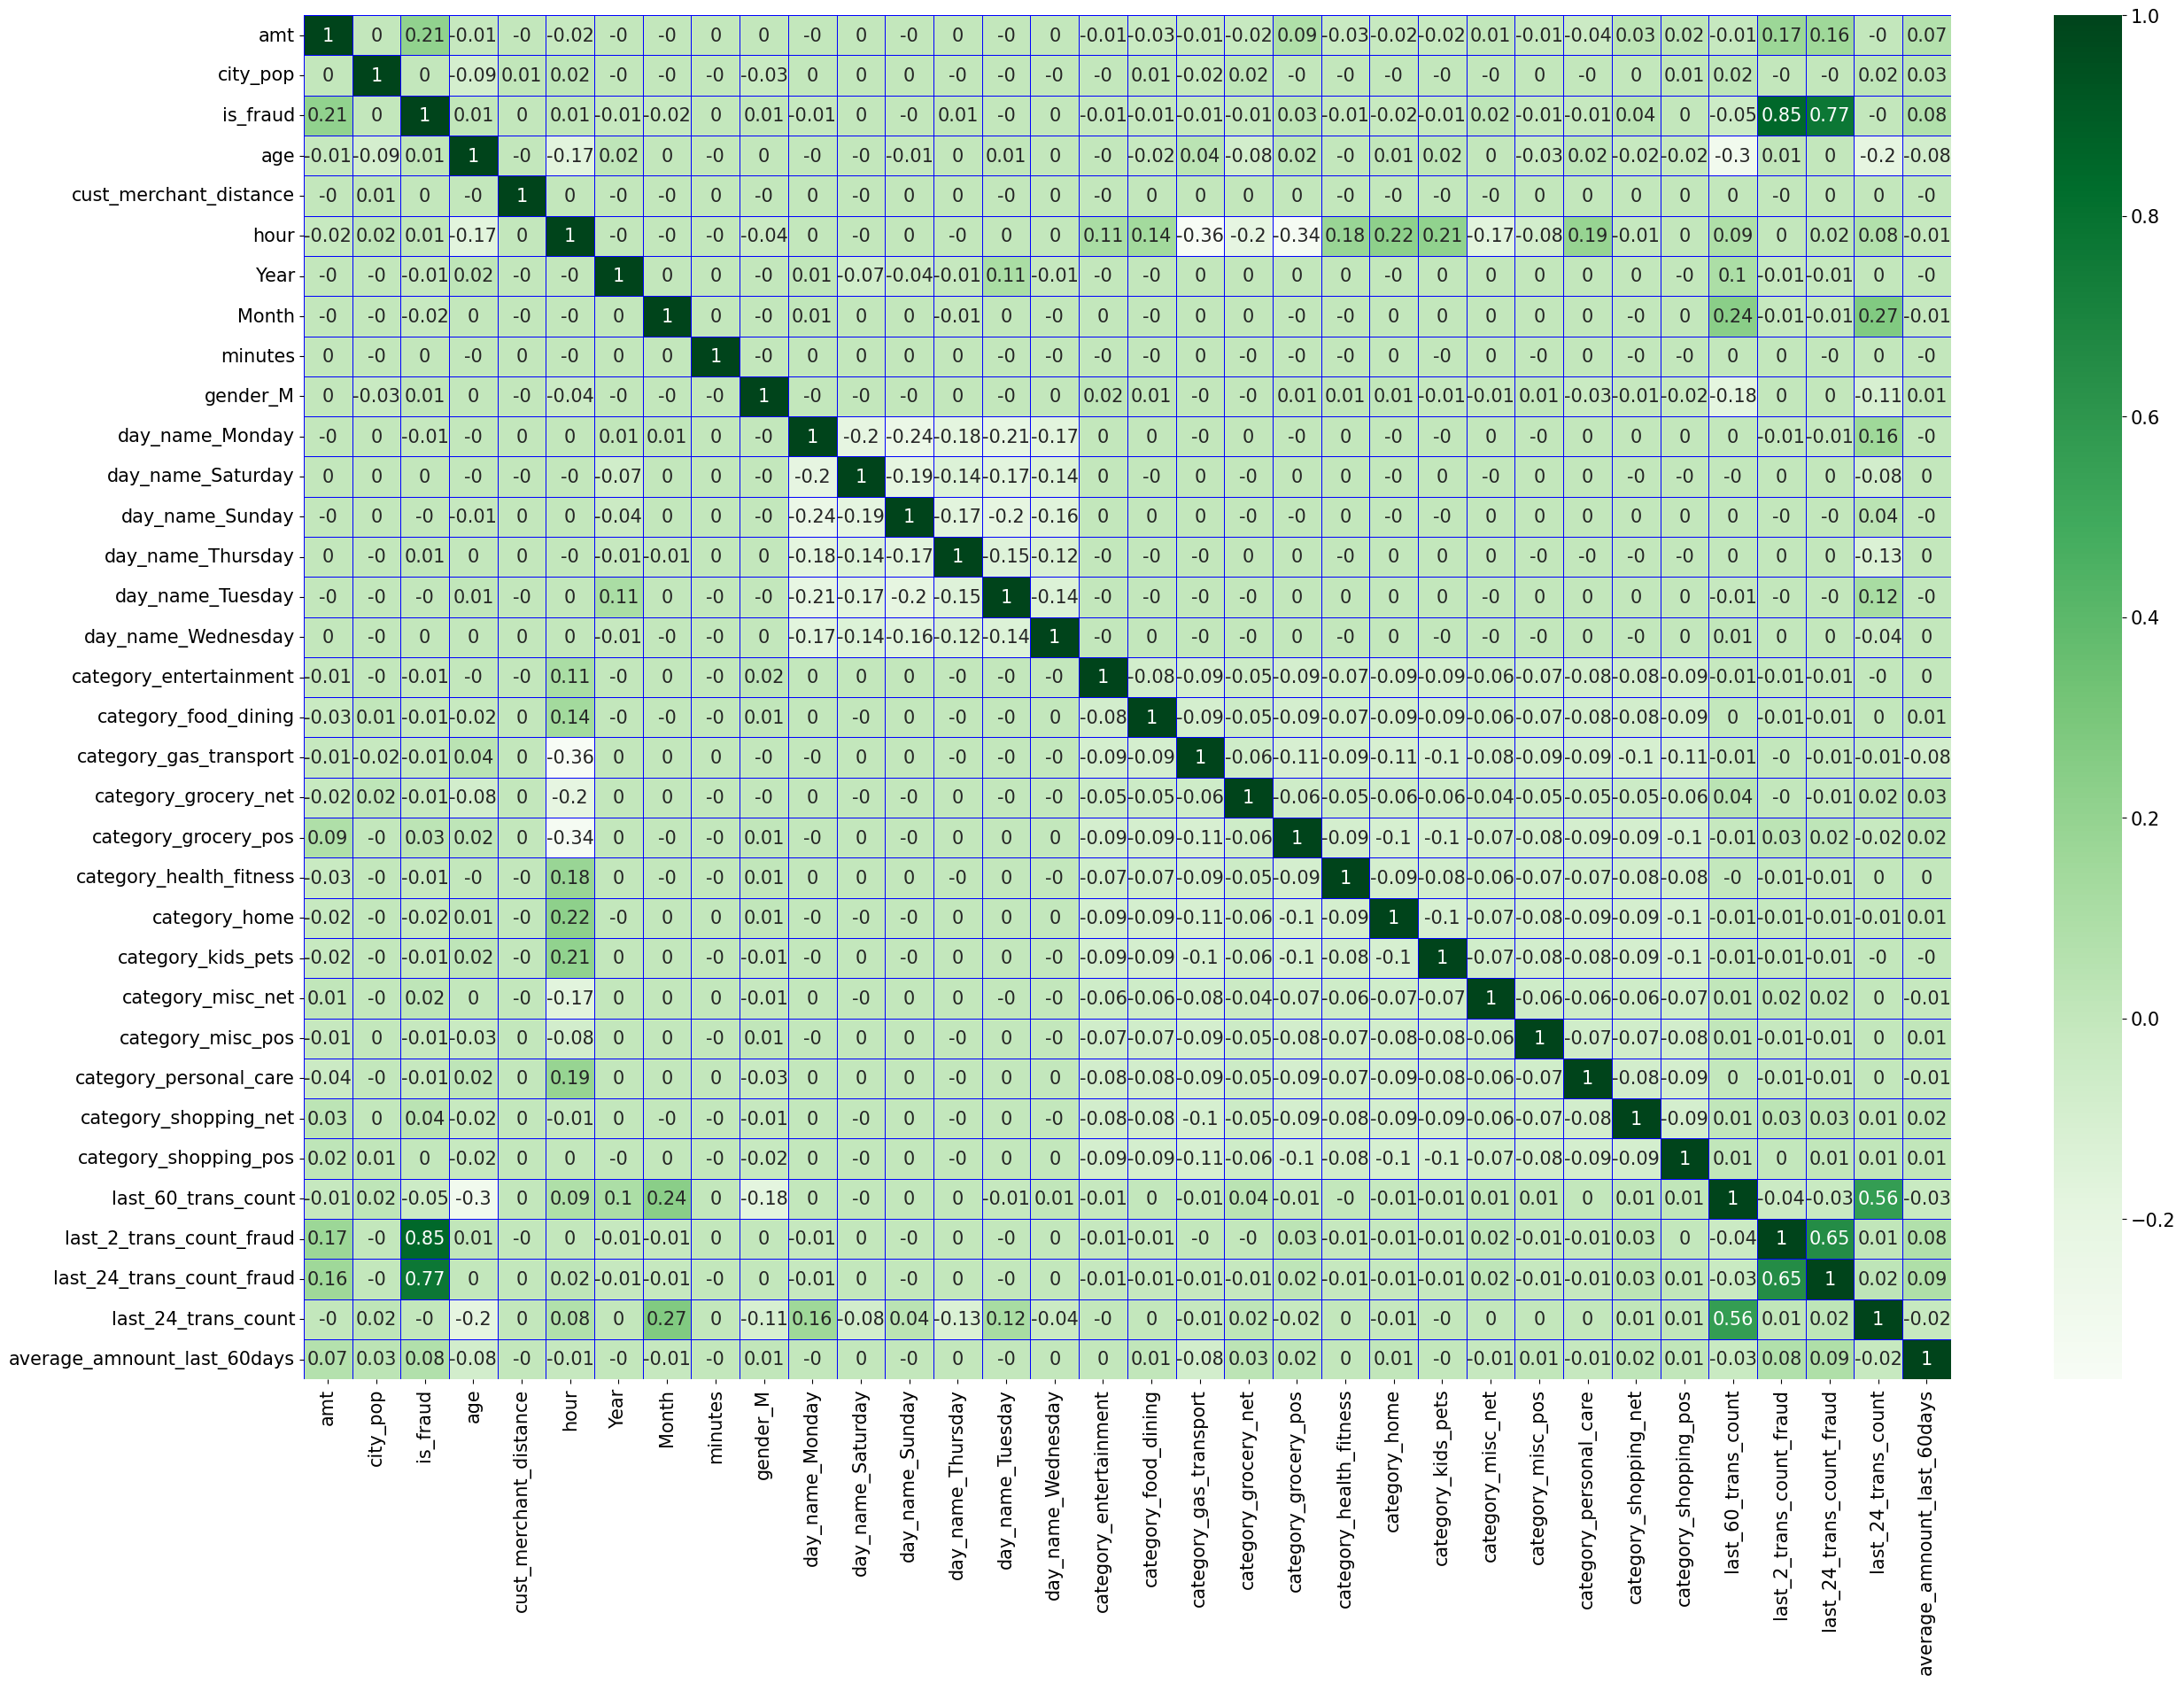

In [272]:
#make a corelation heatmap 
plt.figure(figsize=[30,20])
sns.heatmap(np.round(inp_final.corr(),2), annot=True, fmt=".2g", cmap="Greens",linecolor="blue", linewidths=.5)
#plt.savefig("cor.png")

### last_24_trans_count_fraud has a high correlation with is_fraud

### last_2_trans_count_fraud has a correlation with last_24hrs_count_fraud

In [273]:
#drop 2_hrs
inp_final.drop(["last_2_trans_count_fraud"],1, inplace=True)

<AxesSubplot:>

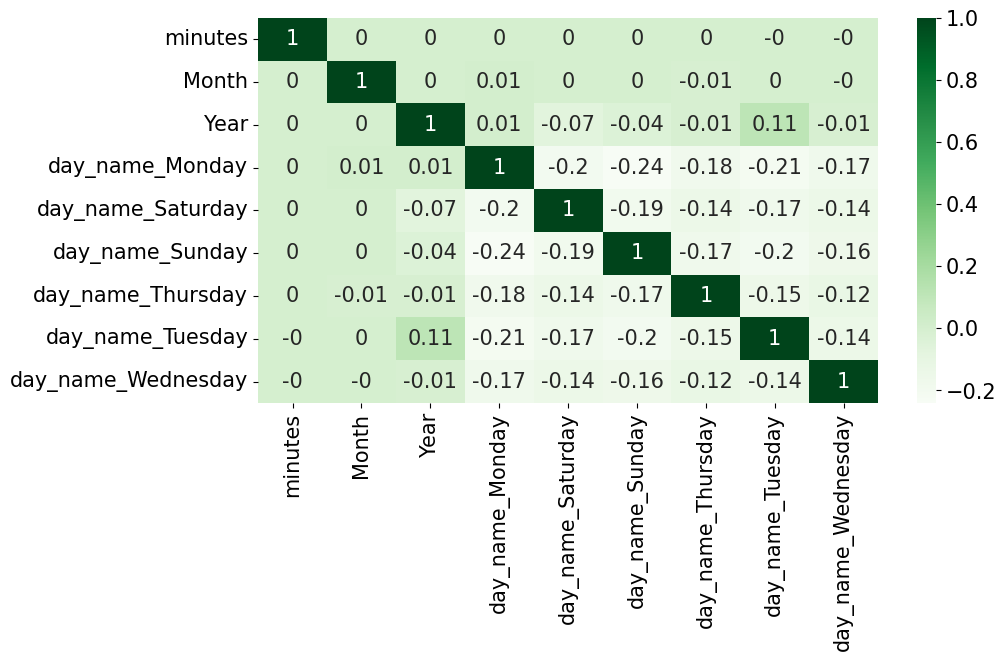

In [274]:
# make a heatmap for time related cols
sns.heatmap(inp_final[["minutes", "Month", "Year",'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday']].corr().round(2), annot=True, cmap="Greens")

In [275]:
inp_final.columns

Index(['amt', 'city_pop', 'is_fraud', 'age', 'cust_merchant_distance', 'hour',
       'Year', 'Month', 'minutes', 'gender_M', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'last_60_trans_count',
       'last_24_trans_count_fraud', 'last_24_trans_count',
       'average_amnount_last_60days'],
      dtype='object')

In [276]:
#drop ["Year", "Month", "minutes", ]
inp_final.drop(["Year", "Month", "minutes", ],1, inplace=True)

In [277]:
#see the cols
inp_final.columns.to_list()

['amt',
 'city_pop',
 'is_fraud',
 'age',
 'cust_merchant_distance',
 'hour',
 'gender_M',
 'day_name_Monday',
 'day_name_Saturday',
 'day_name_Sunday',
 'day_name_Thursday',
 'day_name_Tuesday',
 'day_name_Wednesday',
 'category_entertainment',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'last_60_trans_count',
 'last_24_trans_count_fraud',
 'last_24_trans_count',
 'average_amnount_last_60days']

In [278]:
#manually undersampling 

df_fraud=inp_final[inp_final.is_fraud==1] # get only fraud data
count_fraud=df_fraud.shape[0]#get the rows count

In [279]:
count_fraud

9651

In [280]:
df_true=inp_final[inp_final.is_fraud==0] #get the non fraud data

In [281]:
df_true.shape

(1842831, 30)

In [282]:
df_true=df_true.sample(count_fraud)#get the equal non fruad data for fruad data


In [283]:
df_true.shape

(9651, 30)

In [284]:
df_under_sample= pd.concat([df_true, df_fraud])#concat both the eual df

In [285]:
df_under_sample.shape#check the sape

(19302, 30)

In [286]:
#define x and y
XXX=df_under_sample.drop("is_fraud",1)
YYY=df_under_sample[["is_fraud"]]

In [287]:
#train test split
xxx_train, XXX_test,  yyy_train, YYY_test=\
train_test_split(XXX, YYY, stratify=YYY, random_state=9, train_size=.75)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[6755  483]
 [1749 5489]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          lr  0.845814   0.919123 0.758359 0.845814  0.831037


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         lr  0.843141   0.909091 0.762536 0.843141  0.829389
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2413
           1       0.91      0.76      0.83      2413

    accuracy                           0.84      4826
   macro avg       0.85      0.84      0.84      4826
weighted avg       0.85      0.84      0.84      4826



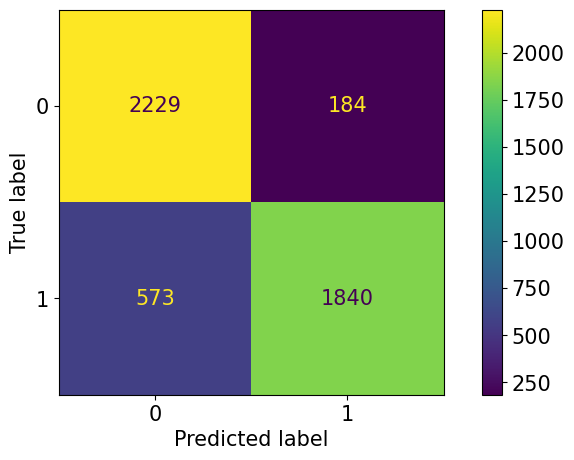

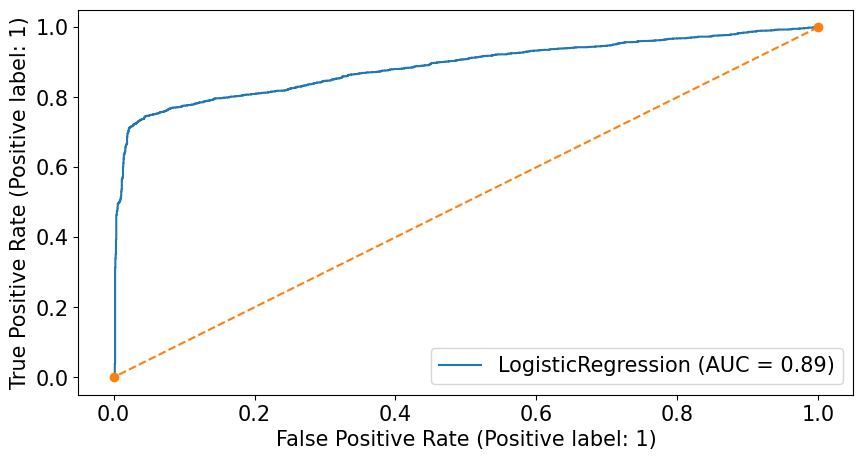

In [288]:
#chek with lr
lr_df=check_metrics(lr, "lr", xxx_train, XXX_test,  yyy_train, YYY_test)

In [289]:
#check with dt
dt_new=DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=45)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[7238    0]
 [   0 7238]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          dt  1.000000   1.000000 1.000000 1.000000  1.000000


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         dt  0.982594   0.983396 0.981765 0.982594  0.982580
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2413
           1       0.98      0.98      0.98      2413

    accuracy                           0.98      4826
   macro avg       0.98      0.98      0.98      4826
weighted avg       0.98      0.98      0.98      4826



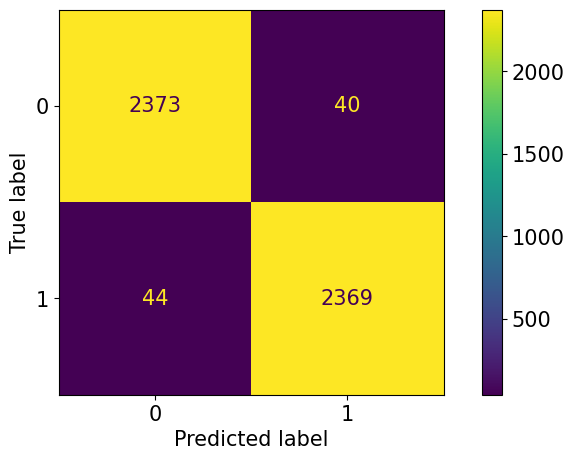

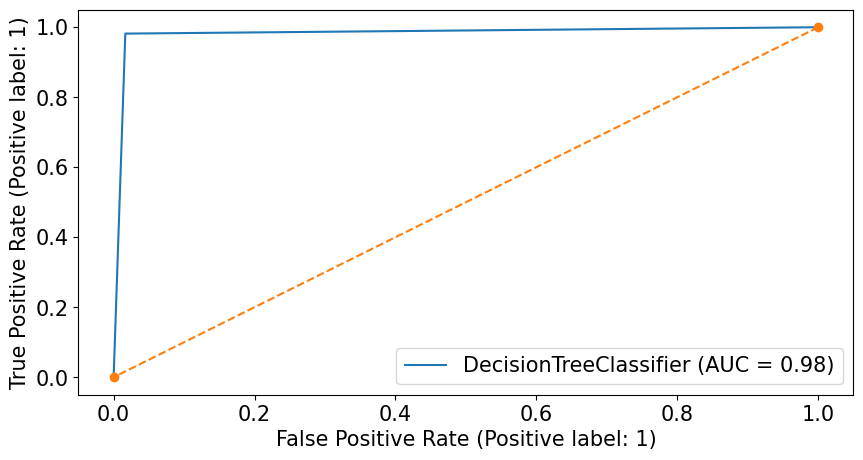

In [290]:
dt_df=check_metrics(dt_new, "dt", xxx_train, XXX_test,  yyy_train, YYY_test )

In [291]:
#get the features importance
dic={}
for i, x in zip(dt_new.feature_importances_, xxx_train.columns):
    dic[x]=[i]
    df_features=pd.DataFrame(dic)
df_features=df_features.melt() # melt the df

In [292]:
df_features=df_features.sort_values("value", ascending=False)

In [293]:
#get the cumsum to find out actual weight of fetaures
df_features["value_cumsum"]=df_features["value"].cumsum()
df_features=df_features.reset_index(drop=True)

In [354]:
df_features

variable    value  value_cumsum
0     last_24_trans_count_fraud 0.665823      0.665823
1                           amt 0.246875      0.912698
2        category_gas_transport 0.024865      0.937562
3                          hour 0.012968      0.950531
4                           age 0.008312      0.958843
5          category_grocery_net 0.004909      0.963751
6             category_misc_pos 0.004807      0.968559
7           last_60_trans_count 0.004579      0.973137
8                      city_pop 0.003831      0.976968
9                 category_home 0.003083      0.980051
10  average_amnount_last_60days 0.003039      0.983090
11       category_entertainment 0.002699      0.985790
12         category_grocery_pos 0.002189      0.987979
13       cust_merchant_distance 0.002183      0.990162
14          last_24_trans_count 0.001455      0.991617
15         category_food_dining 0.001276      0.992892
16       category_personal_care 0.001211      0.994103
17            category_misc_net 0.001037      0.995140
18                     gender_M 0.001034      0.996174
19              day_name_Monday 0.000601      0.996774
20           category_kids_pets 0.000585      0.997360
21      category_health_fitness 0.000540      0.997900
22              day_name_Sunday 0.000528      0.998427
23        category_shopping_net 0.000440      0.998867
24            day_name_Thursday 0.000264      0.999131
25            day_name_Saturday 0.000260      0.999391
26           day_name_Wednesday 0.000251      0.999642
27        category_shopping_pos 0.000207      0.999849
28             day_name_Tuesday 0.000151      1.000000

In [355]:
# 4 cols has 95% of importance and 11cols has 99% feature importance lets take out 10cols
#get the 11 cols
col_XX11=df_features["variable"].head(11).values.tolist()

In [356]:
#reframe the train and test sets with 10 features
xxx_train_11=xxx_train[col_XX11]
XXX_test_11=XXX_test[col_XX11]

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[7140   98]
 [ 209 7029]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          rf  0.978792   0.986249 0.971125 0.978792  0.978629


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         rf  0.974513   0.984349 0.964360 0.974513  0.974252
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2413
           1       0.98      0.96      0.97      2413

    accuracy                           0.97      4826
   macro avg       0.97      0.97      0.97      4826
weighted avg       0.97      0.97      0.97      4826



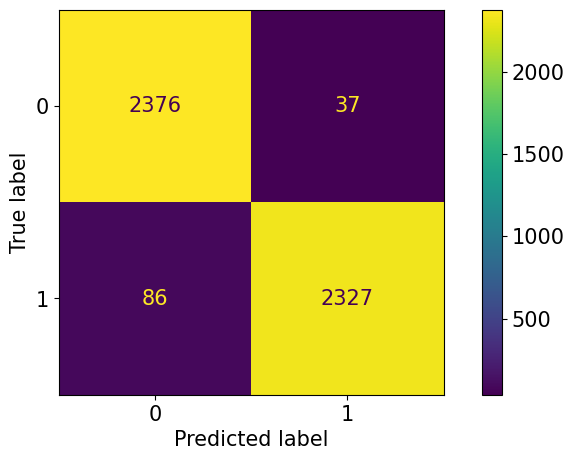

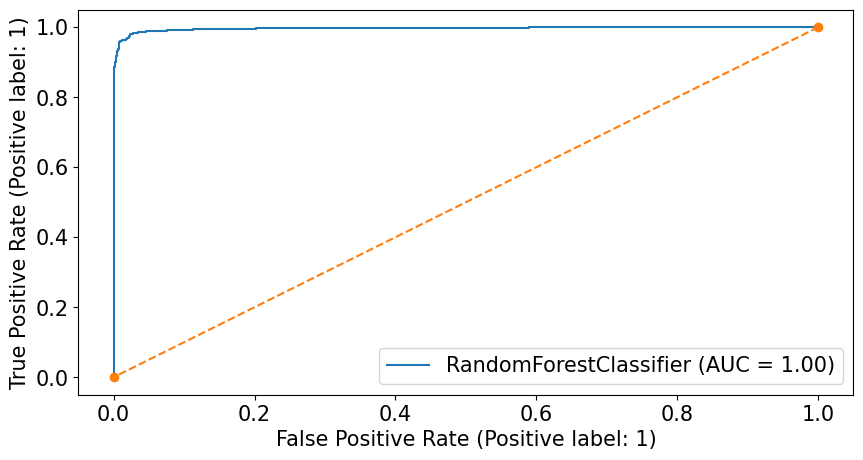

In [357]:
rf_df=check_metrics(rf_final, "rf", xxx_train_11, XXX_test_11,  yyy_train, YYY_test )

In [358]:
metrics_df=pd.concat([rf_df, lr_df, dt_df])

In [359]:
metrics_df.sort_values("Recall", ascending=False)


model_test  Accuracy  Precision   Recall      AUC  f1_score
0         dt  0.982594   0.983396 0.981765 0.982594  0.982580
0         rf  0.974513   0.984349 0.964360 0.974513  0.974252
0         lr  0.843141   0.909091 0.762536 0.843141  0.829389

In [360]:
#Random Search CV

In [361]:
parma_rf={"n_estimators":[100,150,200],
         "max_depth":[2,3,5,10,20,25], "min_samples_split":[2,6,10,20,30],"min_samples_leaf":[10,15,20,30,40,50],
          "random_state":[999,45,9,54,72,18,81,1,0, 540, 108, 10008,1000]
          
         }

In [362]:
rf_clf=RandomForestClassifier()
reSearch=RandomizedSearchCV(estimator=rf_clf,param_distributions=parma_rf,\
                           cv=5, verbose=1, n_jobs=-1, return_train_score=True)

In [363]:
%%time

reSearch.fit(xxx_train_11, yyy_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 19.2 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 20, 25],
                                        'min_samples_leaf': [10, 15, 20, 30, 40,
                                                             50],
                                        'min_samples_split': [2, 6, 10, 20, 30],
                                        'n_estimators': [100, 150, 200],
                                        'random_state': [999, 45, 9, 54, 72, 18,
                                                         81, 1, 0, 540, 108,
                                                         10008, 1000]},
                   return_train_score=True, verbose=1)

In [364]:
re_df=pd.DataFrame(reSearch.cv_results_)

In [365]:
re_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_random_state', 'param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_depth', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [366]:

colx=["param_random_state","param_n_estimators",
      "param_min_samples_split", 
      "param_min_samples_leaf",
      "param_max_depth", 
      "mean_train_score",
      "mean_test_score", 'rank_test_score',]

In [367]:
re_df=re_df[colx]

In [368]:
re_df.sort_values("rank_test_score").reset_index(drop=True)

param_random_state param_n_estimators param_min_samples_split  \
0                 54                150                       2   
1                 18                200                      30   
2                 54                150                       6   
3                 81                150                       6   
4                  1                100                      10   
5                  0                200                      30   
6                  1                150                      10   
7                 45                200                      20   
8                  0                150                      10   
9                108                150                      30   

  param_min_samples_leaf param_max_depth  mean_train_score  mean_test_score  \
0                     10              25          0.983248         0.980174   
1                     15              25          0.979846         0.978033   
2                     30              20          0.977739         0.976375   
3                     40              25          0.976254         0.974924   
4                     15               5          0.966686         0.965875   
5                     10               5          0.966583         0.965805   
6                     20               5          0.966324         0.965736   
7                     15               5          0.966168         0.965529   
8                     10               2          0.963958         0.963664   
9                     50               2          0.961902         0.961246   

   rank_test_score  
0                1  
1                2  
2                3  
3                4  
4                5  
5                6  
6                7  
7                8  
8                9  
9               10

In [369]:
reSearch.best_estimator_

RandomForestClassifier(max_depth=25, min_samples_leaf=10, n_estimators=150,
                       random_state=54)

In [370]:
#lets check the diffrent parameters

<AxesSubplot:xlabel='param_random_state'>

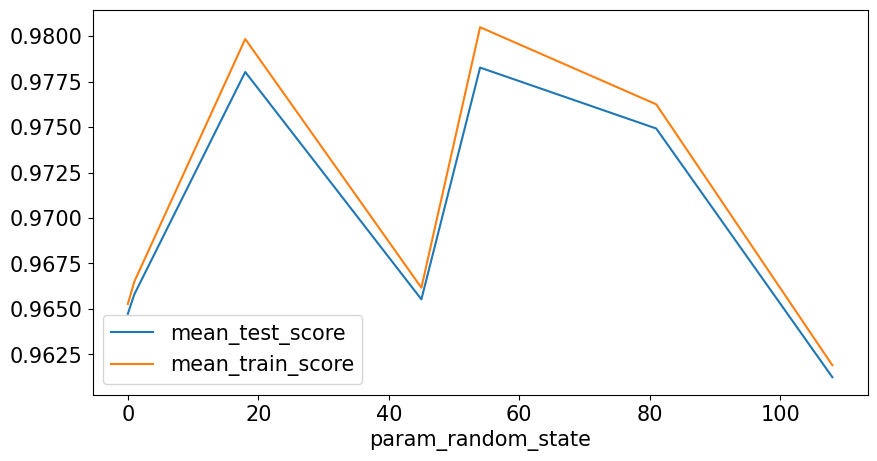

In [371]:
re_df.groupby("param_random_state")["mean_test_score", "mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_n_estimators'>

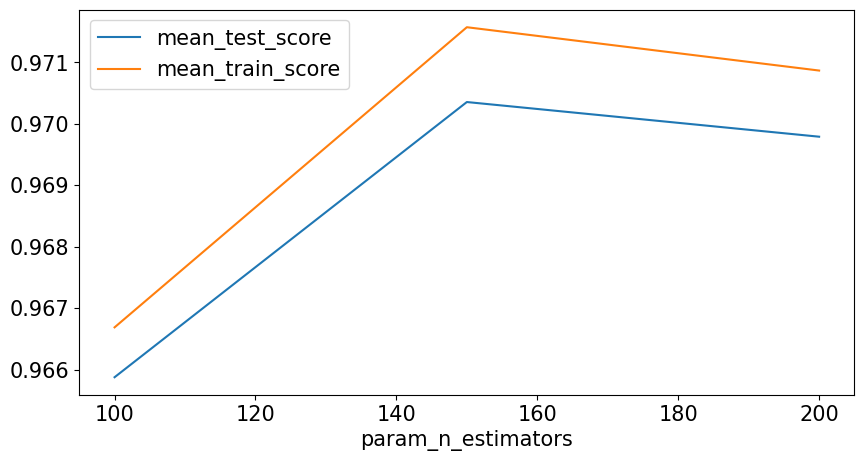

In [372]:
re_df.groupby("param_n_estimators")["mean_test_score", "mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_min_samples_split'>

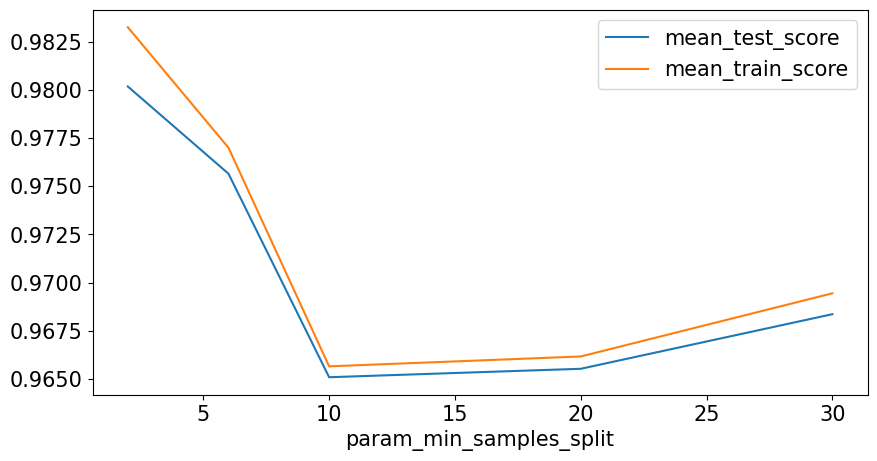

In [373]:
re_df.groupby("param_min_samples_split")["mean_test_score", "mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_min_samples_leaf'>

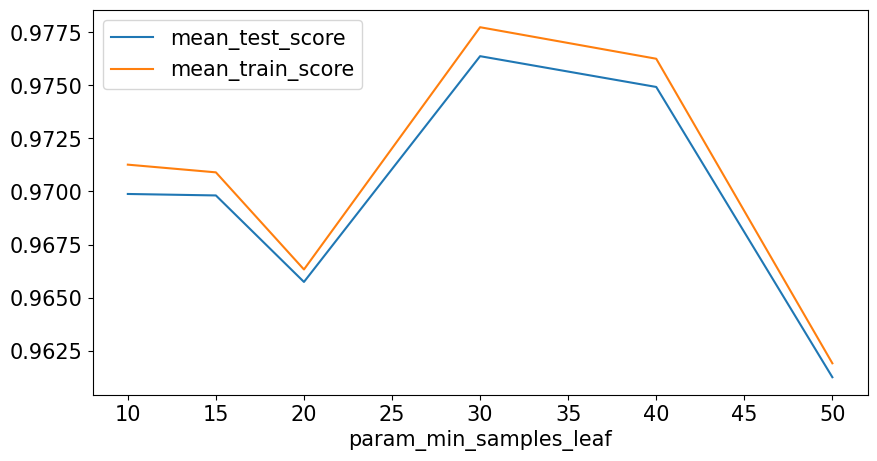

In [374]:
re_df.groupby("param_min_samples_leaf")["mean_test_score", "mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_max_depth'>

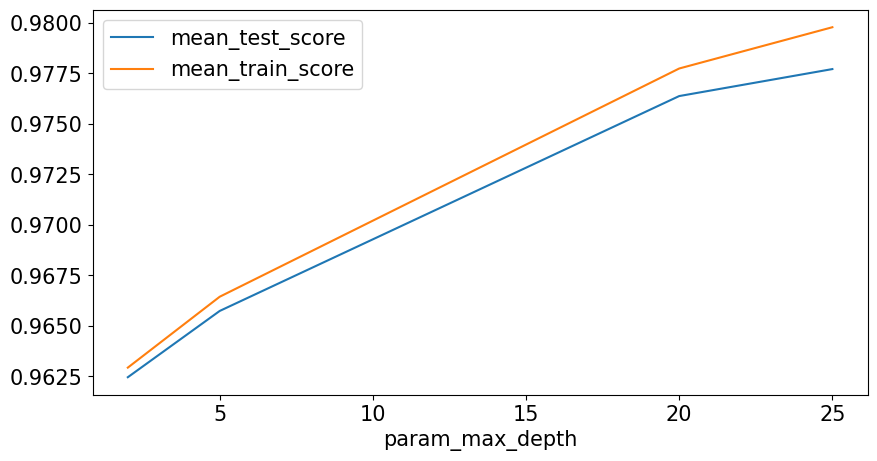

In [375]:
re_df.groupby("param_max_depth")["mean_test_score", "mean_train_score"].mean().plot()

In [376]:
parma_rf={"n_estimators":[150,300,400],
         "max_depth":[10,80], "min_samples_split":[30,50,100,150,200,250],"min_samples_leaf":[25,30,50,100,150],
           "random_state":[999,45,9,54,72,18,81,1,0, 540, 108, 10008,1000]
          
          
         }







In [377]:
reSearch=RandomizedSearchCV(estimator=rf_clf,param_distributions=parma_rf,\
                           cv=5, verbose=1, n_jobs=-1, return_train_score=True)
reSearch.fit(xxx_train_11, yyy_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 80],
                                        'min_samples_leaf': [25, 30, 50, 100,
                                                             150],
                                        'min_samples_split': [30, 50, 100, 150,
                                                              200, 250],
                                        'n_estimators': [150, 300, 400],
                                        'random_state': [999, 45, 9, 54, 72, 18,
                                                         81, 1, 0, 540, 108,
                                                         10008, 1000]},
                   return_train_score=True, verbose=1)

In [378]:
reSearch.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=30,
                       n_estimators=150, random_state=72)

In [379]:
re_df=pd.DataFrame(reSearch.cv_results_)

In [380]:
re_df=re_df[colx]

<AxesSubplot:xlabel='param_random_state'>

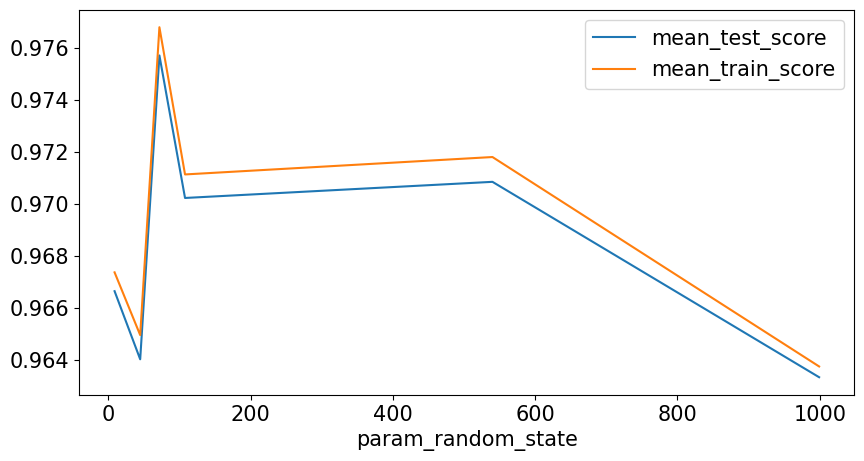

In [381]:
re_df.groupby("param_random_state")["mean_test_score", "mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_n_estimators'>

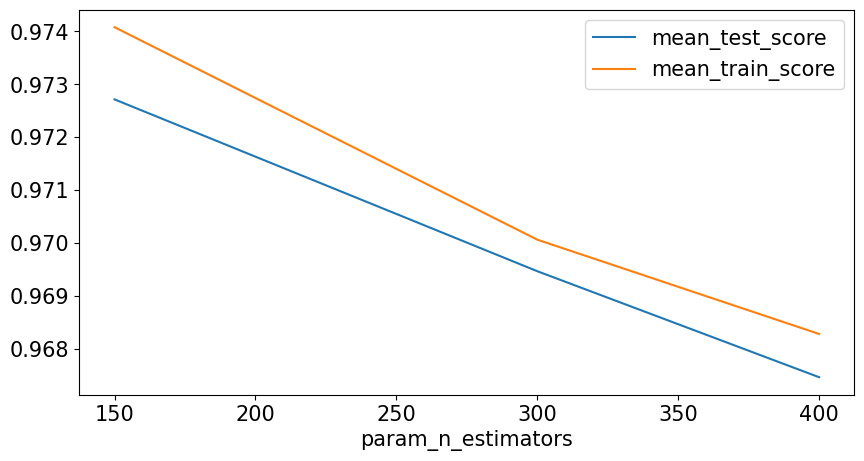

In [382]:
re_df.groupby("param_n_estimators")["mean_test_score", "mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_min_samples_split'>

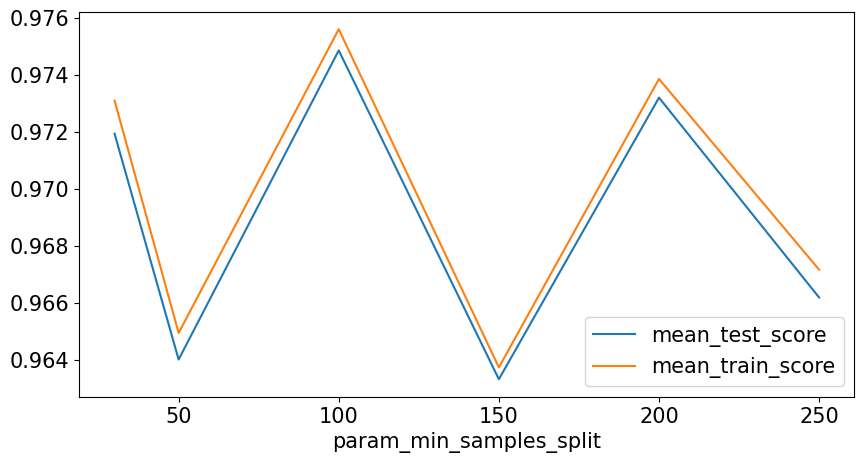

In [383]:
re_df.groupby("param_min_samples_split")["mean_test_score", "mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_min_samples_leaf'>

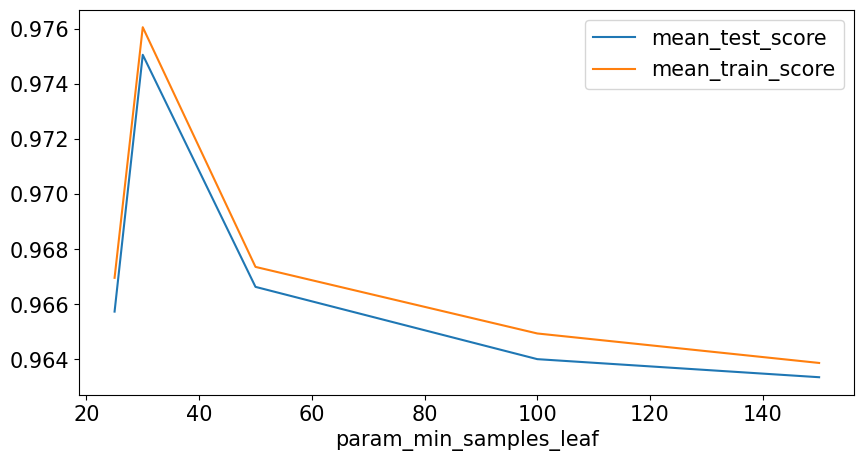

In [384]:
re_df.groupby("param_min_samples_leaf")["mean_test_score", "mean_train_score"].mean().plot()

<AxesSubplot:xlabel='param_max_depth'>

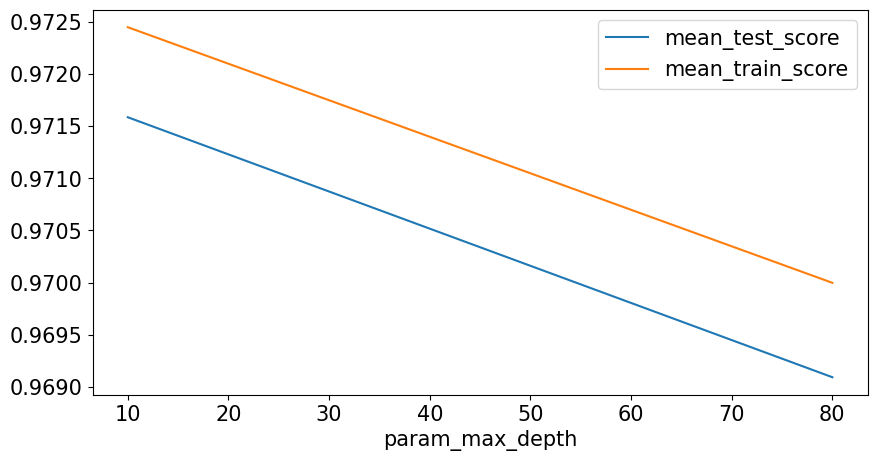

In [385]:
re_df.groupby("param_max_depth")["mean_test_score", "mean_train_score"].mean().plot()

In [386]:
re_df=re_df.sort_values("rank_test_score").reset_index(drop=True)
re_df

param_random_state param_n_estimators param_min_samples_split  \
0                 72                150                      30   
1                540                150                      30   
2                 72                400                     100   
3                108                300                     100   
4                540                300                     200   
5                  9                300                     250   
6                108                150                     250   
7                 45                400                      50   
8                540                400                      30   
9                999                300                     150   

  param_min_samples_leaf param_max_depth  mean_train_score  mean_test_score  \
0                     30              10          0.977722         0.976444   
1                     30              80          0.977549         0.975960   
2                     30              10          0.975891         0.974993   
3                     30              80          0.975304         0.974717   
4                     30              80          0.973853         0.973197   
5                     50              80          0.967360         0.966634   
6                     25              80          0.966963         0.965736   
7                    100              80          0.964942         0.964009   
8                    150              80          0.964009         0.963388   
9                    150              10          0.963733         0.963319   

   rank_test_score  
0                1  
1                2  
2                3  
3                4  
4                5  
5                6  
6                7  
7                8  
8                9  
9               10

In [387]:
rf_clf10=RandomForestClassifier(max_depth=10,n_estimators=150, min_samples_leaf=30, min_samples_split=50, random_state=1000 )
rf_clf8=RandomForestClassifier(max_depth=10,n_estimators=150, min_samples_leaf=30, min_samples_split=50, random_state=1000 )

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[7132  106]
 [ 210 7028]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0    rf_clf10  0.978171   0.985142 0.970986 0.978171  0.978013


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0   rf_clf10  0.973684   0.982686 0.964360 0.973684  0.973437
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2413
           1       0.98      0.96      0.97      2413

    accuracy                           0.97      4826
   macro avg       0.97      0.97      0.97      4826
weighted avg       0.97      0.97      0.97      4826



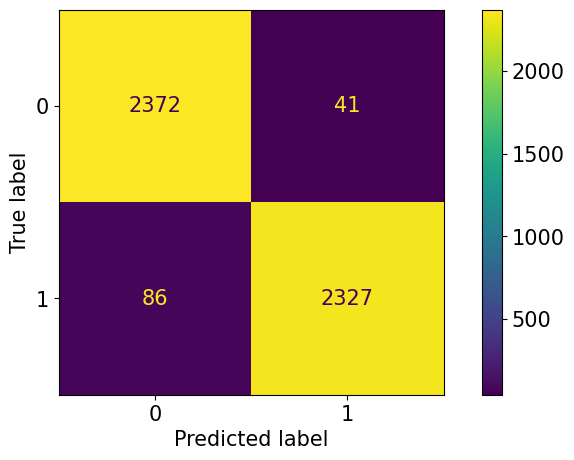

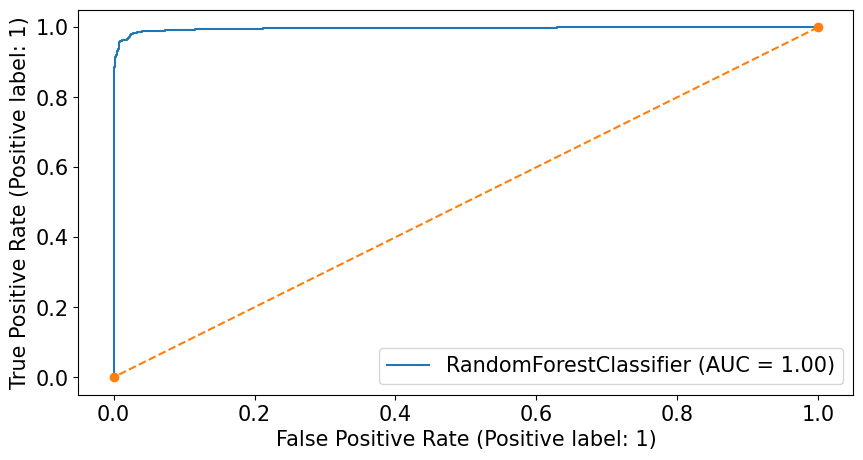

In [388]:
rf_clf_df10=check_metrics(rf_clf10, "rf_clf10", xxx_train_11, XXX_test_11,  yyy_train, YYY_test )

### lets chek with 8 cols

In [389]:
#with 8 fetaures
col_XX8=df_features["variable"].head(8).values.tolist()

In [390]:
#reframe the train and test sets with 10 features
xxx_train_8=xxx_train[col_XX8]
XXX_test_8=XXX_test[col_XX8]

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[7137  101]
 [ 207 7031]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0     rf_clf8  0.978723   0.985838 0.971401 0.978723  0.978566


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0    rf_clf8  0.974513   0.983939 0.964774 0.974513  0.974262
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2413
           1       0.98      0.96      0.97      2413

    accuracy                           0.97      4826
   macro avg       0.97      0.97      0.97      4826
weighted avg       0.97      0.97      0.97      4826



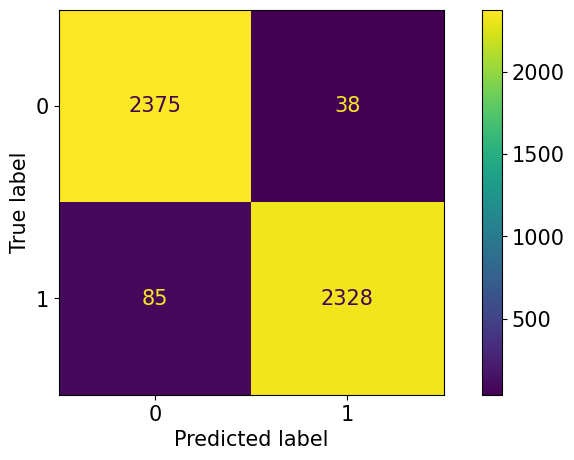

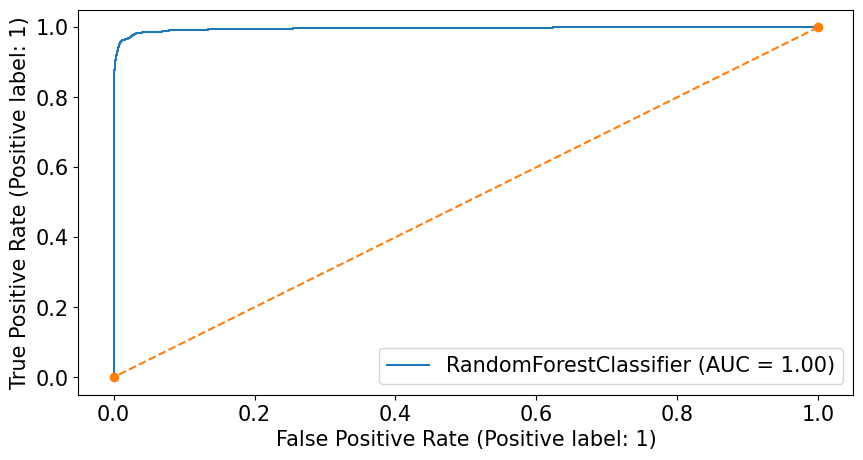

In [391]:
rf_clf_df8=check_metrics(rf_clf8, "rf_clf8", xxx_train_8, XXX_test_8,  yyy_train, YYY_test )

In [392]:
pd.concat([rf_clf_df8, rf_clf_df10, rf_first_df])

model_test  Accuracy  Precision   Recall      AUC  f1_score
0    rf_clf8  0.974513   0.983939 0.964774 0.974513  0.974262
0   rf_clf10  0.973684   0.982686 0.964360 0.973684  0.973437
0         rf  0.960111   0.961232 0.958909 0.960111  0.960069

### It seems 8 col worked beeter than the 10cols

### with the second method there is an improvement of Recall Precision and auc

# lets check with oversampling 

In [393]:
col_XX11 #col_xx11 derived for relavent cols before

['last_24_trans_count_fraud',
 'amt',
 'category_gas_transport',
 'hour',
 'age',
 'category_grocery_net',
 'category_misc_pos',
 'last_60_trans_count',
 'city_pop',
 'category_home',
 'average_amnount_last_60days']

In [394]:

#get only columns from inp_final which came out relavent
inp_oversample=inp_final[col_XX11]

In [395]:
#get fraud dataset
over_fraud=inp_final[inp_final.is_fraud==1]

In [396]:
#get non fraud data set
over_true=inp_final[inp_final.is_fraud==0]

In [397]:
#get half count of the rows from over_true dataset
half_true_count=over_true.shape[0]//2
half_true_count

921415

In [398]:
#get the over_fraud data set after making dublicates of fraud rows
over_fraud=over_fraud.sample(half_true_count, replace=True)

In [399]:
#concat newly derived dfs
over_samplled=pd.concat([over_fraud, over_true.iloc[:half_true_count,:]])

In [400]:
#define x and y
X_over=over_samplled.drop("is_fraud",1)


In [401]:
Y_over=over_samplled[["is_fraud"]]

In [402]:
#train test split
x_train_o, X_test_o,\
y_train_o, Y_test_o=\
train_test_split(X_over, Y_over, stratify=Y_over, train_size=.7, random_state=45)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[603224  41767]
 [155480 489510]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0          lr  0.847093   0.921384 0.758942 0.847093  0.832311


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0         lr  0.846712   0.920827 0.758654 0.846712  0.831911
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.79      0.93      0.86    276424
           1       0.92      0.76      0.83    276425

    accuracy                           0.85    552849
   macro avg       0.86      0.85      0.85    552849
weighted avg       0.86      0.85      0.85    552849



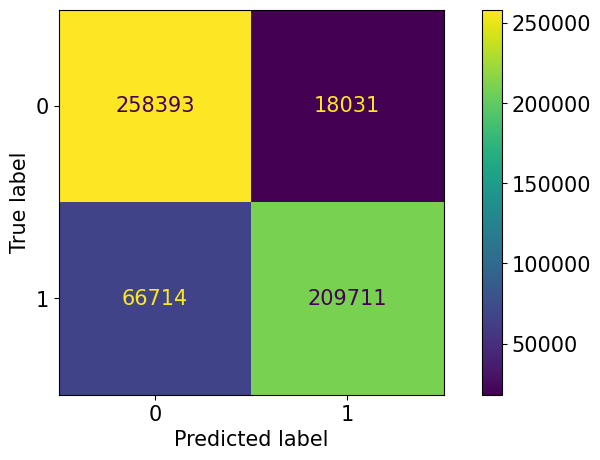

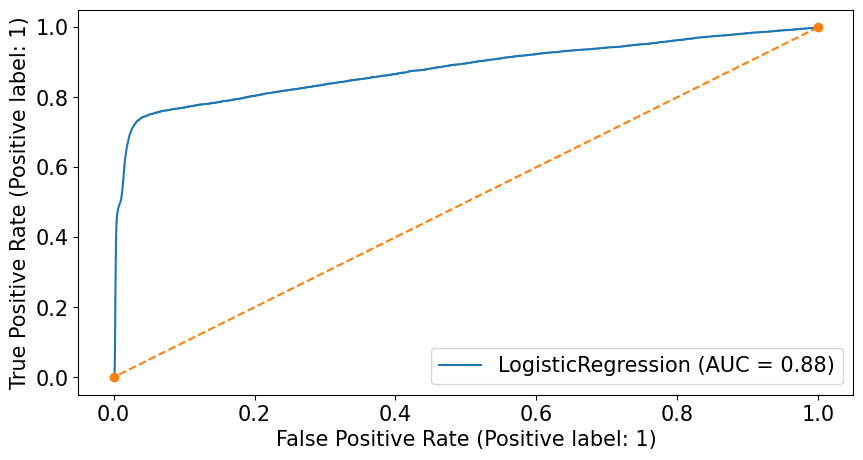

In [403]:
#check metrics with logestic regression
lr_over_df=check_metrics(lr, "lr",x_train_o, X_test_o,y_train_o, Y_test_o )

In [404]:
#get col_xx8 which we got before
col_XX8

['last_24_trans_count_fraud',
 'amt',
 'category_gas_transport',
 'hour',
 'age',
 'category_grocery_net',
 'category_misc_pos',
 'last_60_trans_count']

In [405]:
#check with 8 cols and random forest
x_train_o_8=x_train_o[col_XX8] 
X_test_o_8=X_test_o[col_XX8]
x_train_o_11=x_train_o[col_XX11]
X_test_o_11=X_test_o[col_XX11]

In [406]:
#check metrics with 8 cols

#rf_over8=check_metrics(rf_clf8, "rf_over8",x_train_o_8, X_test_o_8,y_train_o, Y_test_o)

In [407]:
#print the metrics for test 
#rf_over8

#it gave less satisfied result with recall 98% others too so commenting out the same

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[640023   4968]
 [ 13282 631708]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0   rf_over11  0.985853   0.992197 0.979407 0.985852  0.985761


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0  rf_over11  0.986193   0.992445 0.979846 0.986193  0.986105
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    276424
           1       0.99      0.98      0.99    276425

    accuracy                           0.99    552849
   macro avg       0.99      0.99      0.99    552849
weighted avg       0.99      0.99      0.99    552849



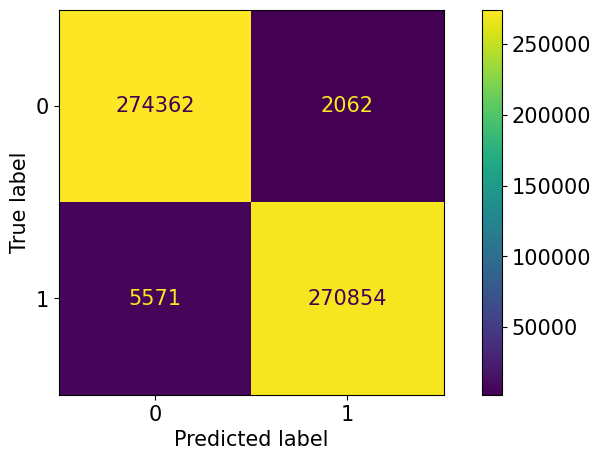

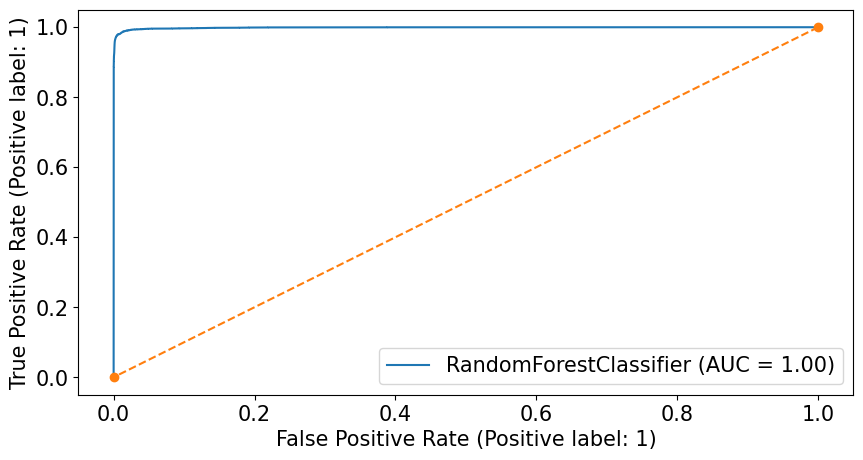

In [408]:
#check with 11cols
rf_over11=check_metrics(rf_clf10, "rf_over11",x_train_o_11, X_test_o_11,y_train_o, Y_test_o )

In [409]:
#check with dt
dt=DecisionTreeClassifier(max_depth=20, min_samples_split=50, random_state=45)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[644174    817]
 [     0 644990]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0    dt_over8  0.999367   0.998735 1.000000 0.999367  0.999367


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0   dt_over8  0.999002   0.998007 1.000000 0.999002  0.999003
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276424
           1       1.00      1.00      1.00    276425

    accuracy                           1.00    552849
   macro avg       1.00      1.00      1.00    552849
weighted avg       1.00      1.00      1.00    552849



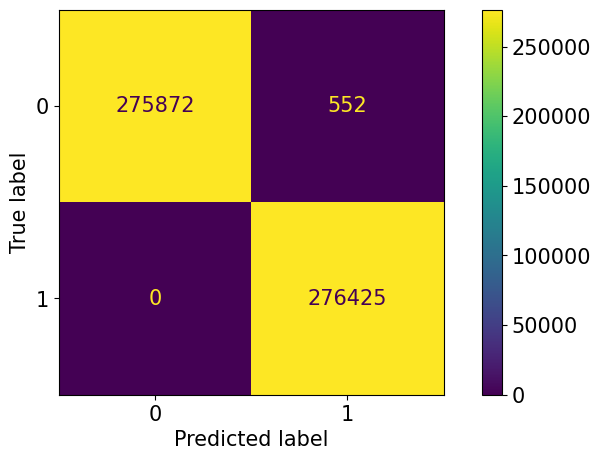

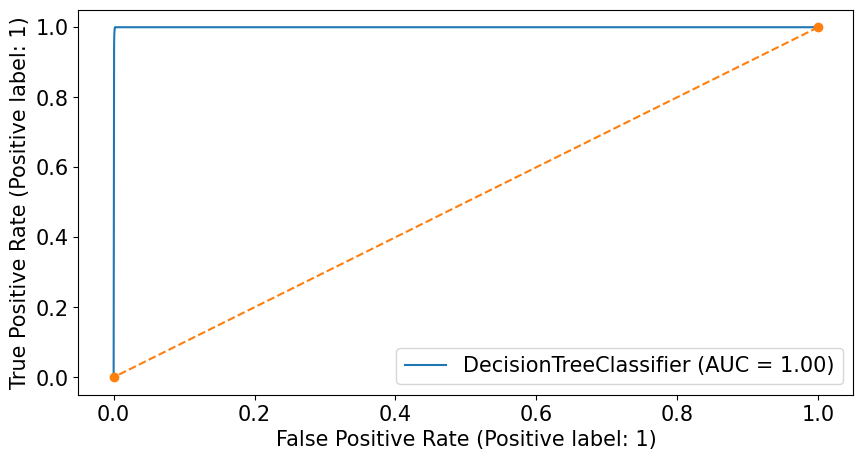

In [410]:

dt_over8=check_metrics(dt, "dt_over8",x_train_o_8, X_test_o_8,y_train_o, Y_test_o )

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[644045    946]
 [     0 644990]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0   dt_over11  0.999267   0.998535 1.000000 0.999267  0.999267


Test Result
<<<<<<<<<>>>>>>>>>>>>
  model_test  Accuracy  Precision   Recall      AUC  f1_score
0  dt_over11  0.998947   0.997899 1.000000 0.998947  0.998948
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276424
           1       1.00      1.00      1.00    276425

    accuracy                           1.00    552849
   macro avg       1.00      1.00      1.00    552849
weighted avg       1.00      1.00      1.00    552849



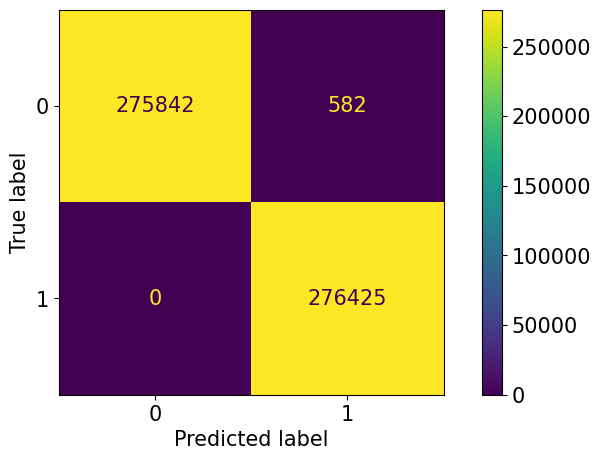

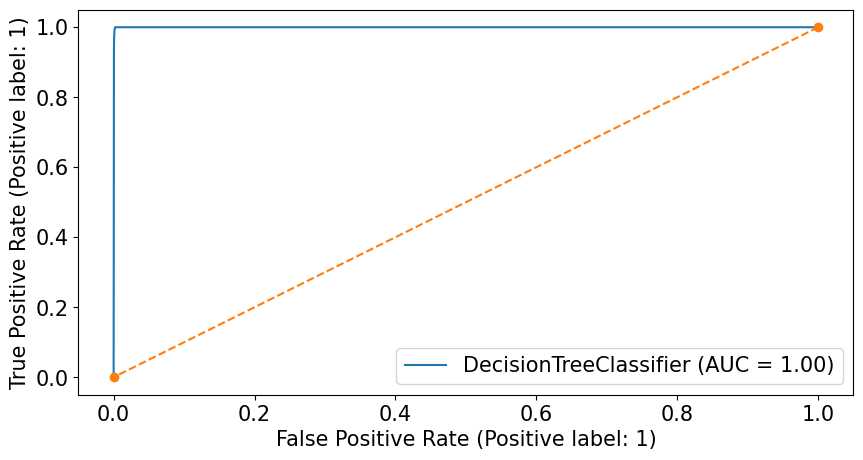

In [411]:
dt_over11=check_metrics(dt, "dt_over11",x_train_o_11, X_test_o_11,y_train_o, Y_test_o )

# DT has given a good result with with 100% recall 100% precision 100% f1 score and 100% AUC

# Test With XGBoost

In [412]:
xgb=XGBClassifier(n_estimators=100, random_state=9, n_jobs=-1)

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[643068   1923]
 [     0 644990]]
   model_train  Accuracy  Precision   Recall      AUC  f1_score
0  xgb_over_11  0.998509   0.997027 1.000000 0.998509  0.998511


Test Result
<<<<<<<<<>>>>>>>>>>>>
    model_test  Accuracy  Precision   Recall      AUC  f1_score
0  xgb_over_11  0.998414   0.996837 1.000000 0.998414  0.998416
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276424
           1       1.00      1.00      1.00    276425

    accuracy                           1.00    552849
   macro avg       1.00      1.00      1.00    552849
weighted avg       1.00      1.00      1.00    552849



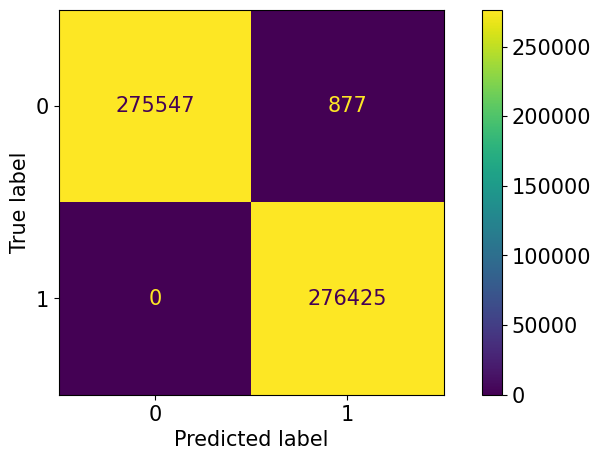

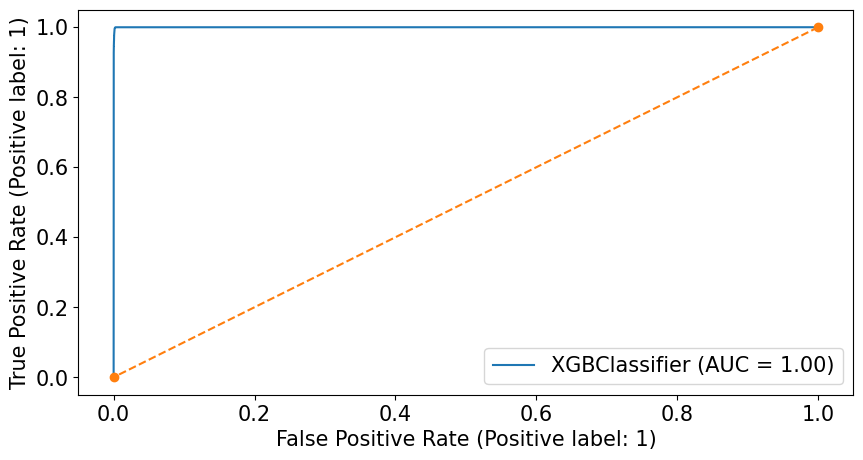

In [413]:
xgb_over11=check_metrics(xgb, "xgb_over_11",x_train_o_11, X_test_o_11,y_train_o, Y_test_o )

                             [[[ DETAIL REPORT ]]]    

Train Result
<<<<<<<<<>>>>>>>>>>>>
[[643068   1923]
 [     0 644990]]
  model_train  Accuracy  Precision   Recall      AUC  f1_score
0  xgb_over_8  0.998509   0.997027 1.000000 0.998509  0.998511


Test Result
<<<<<<<<<>>>>>>>>>>>>
   model_test  Accuracy  Precision   Recall      AUC  f1_score
0  xgb_over_8  0.998414   0.996837 1.000000 0.998414  0.998416
...............................

<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276424
           1       1.00      1.00      1.00    276425

    accuracy                           1.00    552849
   macro avg       1.00      1.00      1.00    552849
weighted avg       1.00      1.00      1.00    552849



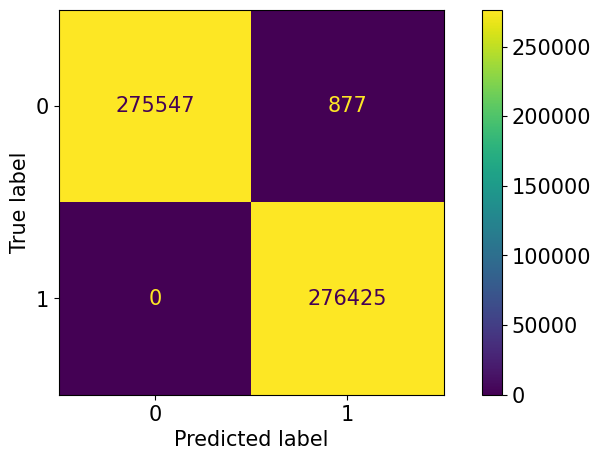

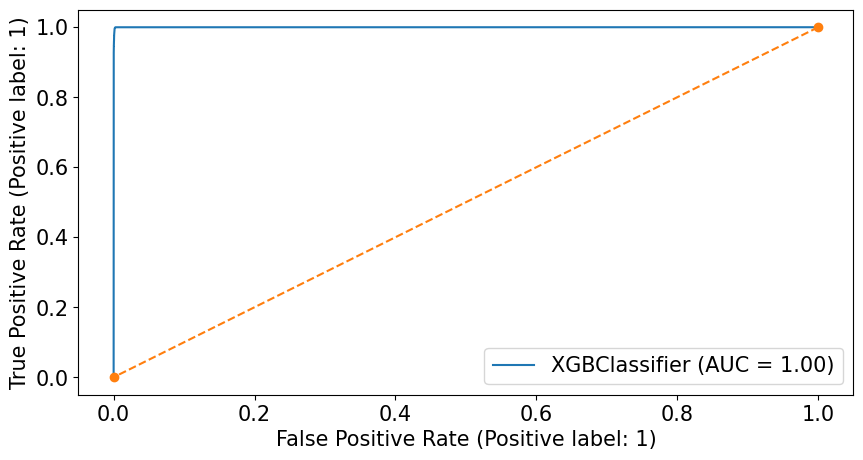

In [414]:
xgb_over8=check_metrics(xgb, "xgb_over_8",x_train_o_11, X_test_o_11,y_train_o, Y_test_o )

In [424]:
final_metrics= pd.concat([xgb_over8, xgb_over11, dt_over8, dt_over11, rf_over11],0)

In [425]:
final_metrics=final_metrics.sort_values("Recall", ascending=False)
final_metrics

model_test  Accuracy  Precision   Recall      AUC  f1_score
0   xgb_over_8  0.998414   0.996837 1.000000 0.998414  0.998416
0  xgb_over_11  0.998414   0.996837 1.000000 0.998414  0.998416
0     dt_over8  0.999002   0.998007 1.000000 0.999002  0.999003
0    dt_over11  0.998947   0.997899 1.000000 0.998947  0.998948
0    rf_over11  0.986193   0.992445 0.979846 0.986193  0.986105

# XGBoost has given a good result with with 100% recall 100% precision 100% f1 score and 100% AUC

# ***Recomandation***

### ***Bank Should Block All The Transaction Those Will Be Detected by the Model as Fraud.***

### ***Bank Should Inform Immediately Through all Medium (Over Call, Mail, Msg) The Customer, Regarding The Transaction which will be been pointed by the model as Fraud.***
